## Make a program to choose randomly p fraction of the population to infect initially
* Randomly with choosen probability picks 0 and 1 
* We find list of all unique users and then we need to infect a percentage of population
* Again a problem here is that we need to start infecting users only after a particular time
* we need to make this set to be positive or negative

**I propose that there could be atleast two mechanism to start infection**
1. Randomly infect people by choosing them after a particular time
2. Randomly infect people by choosing a particular place at particular time (this is how COVID started)
3. If choosing step 2 then we can randmly infect people who were at that place at a particular time
4. Using alpha as infection rate

In [1]:
import pandas as pd

df = pd.read_csv("processedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

Import the ArcGIS API for Python. This adds a GeoAccessor and spatially enables your DataFrame objects. As you will see in this notebook, you can then easily plot your data both as charts and as maps.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

/opt/anaconda3/envs/cs293b/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


# EXTRA IDEAS
## We can use venue catorgories to define the probabilty of infection
* If it is a closed space we can have more probability 
* If it is public space which is frequented by many we can give more probability
* Also we can give probability of contamination by looking at how many people were there at the place at given time

In [3]:
df

User ID (anonymized)     Venue ID (Foursquare)  \
0                        470  49bbd6c0f964a520f4531fe3   
1                        979  4a43c0aef964a520c6a61fe3   
2                         69  4c5cc7b485a1e21e00d35711   
3                        395  4bc7086715a7ef3bef9878da   
4                         87  4cf2c5321d18a143951b5cec   
...                      ...                       ...   
227423                   688  3fd66200f964a52000e71ee3   
227424                   560  4bca32ff0687ef3be789dbcc   
227425                   945  50a77716e4b0b5a9492f6f56   
227426                   671  4514efe0f964a520e7391fe3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
0            4bf58dd8d48988d127951735             Arts & Crafts Store   
1            4bf58dd8d48988d1df941735                          Bridge   
2            4bf58dd8d48988d103941735                  Home (private)   
3            4bf58dd8d48988d104941735                  Medical Center   
4            4bf58dd8d48988d1cb941735                      Food Truck   
...                               ...                             ...   
227423       4bf58dd8d48988d1e7931735                     Music Venue   
227424       4bf58dd8d48988d16c941735                    Burger Joint   
227425       4bf58dd8d48988d103941735                  Home (private)   
227426       4bf58dd8d48988d11d941735                             Bar   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
0       40.719810 -74.002581                      -240   
1       40.606800 -74.044170                      -240   
2       40.716162 -73.883070                      -240   
3       40.745164 -73.982519                      -240   
4       40.740104 -73.989658                      -240   
...           ...        ...                       ...   
227423  40.733596 -74.003139                      -300   
227424  40.745719 -73.993720                      -300   
227425  40.854364 -73.883070                      -300   
227426  40.735981 -74.029309                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
0       Tue Apr 03 18:00:09 +0000 2012       0          0           0   
1       Tue Apr 03 18:00:25 +0000 2012       0          0           0   
2       Tue Apr 03 18:02:24 +0000 2012       0          0           0   
3       Tue Apr 03 18:02:41 +0000 2012       0          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       0          0           0   
...                                ...     ...        ...         ...   
227423  Sat Feb 16 02:29:11 +0000 2013       0          0           0   
227424  Sat Feb 16 02:31:35 +0000 2013       0          0           0   
227425  Sat Feb 16 02:33:16 +0000 2013       0          0           0   
227426  Sat Feb 16 02:34:31 +0000 2013       0          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       0          0           0   

        InfectionTime        Time  
0                   0  1333476009  
1                   0  1333476025  
2                   0  1333476144  
3                   0  1333476161  
4                   0  1333476180  
...               ...         ...  
227423              0  1360981751  
227424              0  1360981895  
227425              0  1360981996  
227426              0  1360982071  
227427              0  1360982136  

[227428 rows x 13 columns]

# We set the randomly chosen population to be infected

In [4]:
import numpy as np

alpha = 0.1

#choosing unique users from list of all user IDs
unique_users =  pd.unique(df["User ID (anonymized)"])#.

print(f"Number of unique users are: {len(unique_users)}")

# this is when we are infecting people after a particular time
gen_positive = np.random.choice((1,0),size = len(unique_users), p=[alpha, 1-alpha])

#Choosing the time at which infection begins
infect_time = df.iloc[2000]["Time"]

infections = np.sum(gen_positive)
print(f"Number of infected users: {infections}")

Number of unique users are: 1083
Number of infected users: 102


In [5]:
#Query logic to select only those users whose user id and time matches or  those who are positive already
for i in range(len(unique_users)):
    #print(i)
    if gen_positive[i] == 1:
        #Below query gives sets status to 1 if infected userId and time condition matches
        df["Status"]= np.where( ( (df["User ID (anonymized)"] == unique_users[i]) & (df["Time"] >= infect_time) ) | (df["Status"] == 1),1,0)

# Setting infection time for all
df["InfectionTime"] = np.where(df["Status"]==1,infect_time,0)

count_infected = len(df[df["Status"]==1])
print(f"number of infect rows: {count_infected}")

number of infect rows: 22204


In [6]:
df

User ID (anonymized)     Venue ID (Foursquare)  \
0                        470  49bbd6c0f964a520f4531fe3   
1                        979  4a43c0aef964a520c6a61fe3   
2                         69  4c5cc7b485a1e21e00d35711   
3                        395  4bc7086715a7ef3bef9878da   
4                         87  4cf2c5321d18a143951b5cec   
...                      ...                       ...   
227423                   688  3fd66200f964a52000e71ee3   
227424                   560  4bca32ff0687ef3be789dbcc   
227425                   945  50a77716e4b0b5a9492f6f56   
227426                   671  4514efe0f964a520e7391fe3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
0            4bf58dd8d48988d127951735             Arts & Crafts Store   
1            4bf58dd8d48988d1df941735                          Bridge   
2            4bf58dd8d48988d103941735                  Home (private)   
3            4bf58dd8d48988d104941735                  Medical Center   
4            4bf58dd8d48988d1cb941735                      Food Truck   
...                               ...                             ...   
227423       4bf58dd8d48988d1e7931735                     Music Venue   
227424       4bf58dd8d48988d16c941735                    Burger Joint   
227425       4bf58dd8d48988d103941735                  Home (private)   
227426       4bf58dd8d48988d11d941735                             Bar   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
0       40.719810 -74.002581                      -240   
1       40.606800 -74.044170                      -240   
2       40.716162 -73.883070                      -240   
3       40.745164 -73.982519                      -240   
4       40.740104 -73.989658                      -240   
...           ...        ...                       ...   
227423  40.733596 -74.003139                      -300   
227424  40.745719 -73.993720                      -300   
227425  40.854364 -73.883070                      -300   
227426  40.735981 -74.029309                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
0       Tue Apr 03 18:00:09 +0000 2012       0          0           0   
1       Tue Apr 03 18:00:25 +0000 2012       0          0           0   
2       Tue Apr 03 18:02:24 +0000 2012       0          0           0   
3       Tue Apr 03 18:02:41 +0000 2012       0          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       0          0           0   
...                                ...     ...        ...         ...   
227423  Sat Feb 16 02:29:11 +0000 2013       0          0           0   
227424  Sat Feb 16 02:31:35 +0000 2013       0          0           0   
227425  Sat Feb 16 02:33:16 +0000 2013       0          0           0   
227426  Sat Feb 16 02:34:31 +0000 2013       0          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       1          0           0   

        InfectionTime        Time  
0                   0  1333476009  
1                   0  1333476025  
2                   0  1333476144  
3                   0  1333476161  
4                   0  1333476180  
...               ...         ...  
227423              0  1360981751  
227424              0  1360981895  
227425              0  1360981996  
227426              0  1360982071  
227427     1333559854  1360982136  

[227428 rows x 13 columns]

# We need to do following
* We need to find every person that has been infected
* for every person that has been infected we need to find the other person who was at same place and time range
* infect these people with certain probability


    print(f"Meeting population for \n{infector}")
    print(meeting_population, i)
    for j in range(0,len(meeting_population)):
        person = df.iloc[meeting_population[j]]
        if(person["Status"]==0):
            print("Non infected person met.................")
            if( person["Time"] >= infector["Time"] and person["Time"]<= infector["Time"]+3600):
                print("In range.............................")
                #Find all the entries of this person after this time and set details
                person_rows = list(np.where((df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0])
                print("Places where this person has rows")
                print(person_rows)
                for k in range(len(person_rows)):
                    df.iloc[meeting_population[j]]["Status"] = 1
                    df.iloc[meeting_population[j]]["InfectorId"] = infector["User ID (anonymized)"]
                    df.iloc[meeting_population[j]]["InfectionTime"] = person["Time"]
            else:
                print("Saved! Was not in time range of 1 hours for infection")
        else:
            # It might so happen that 1st infector was not processed to infect first
            if( person["Time"] >= infector["Time"] and person["Time"]<= infector["Time"]+3600):
                print("In range.............................")
          
                if(person["InfectionTime"] >= person["Time"]):
                    print("Infected already........")
                else:
                    #Find all the entries of this person after this time and set details
                    print("Updating new infector.....................")
                    person_rows = list(np.where((df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0])
                    print("Places where this person has rows")
                    print(person_rows)
                    for k in range(len(person_rows)):
                        df.iloc[meeting_population[j]]["Status"] = 1
                        df.iloc[meeting_population[j]]["InfectorId"] = infector["User ID (anonymized)"]
                        df.iloc[meeting_population[j]]["InfectionTime"] = person["Time"]
            else:
                print("Saved! Was not in time range of 1 hours for infection")
    

In [7]:
# Find all the infected rows
infected_users_dataframe = df[df["Status"]==1]
print("List of infected users")
infected_users_dataframe

List of infected users


User ID (anonymized)     Venue ID (Foursquare)  \
2014                      32  45940e37f964a52055401fe3   
2017                      34  4528a216f964a520173b1fe3   
2020                     307  49e4ec34f964a5206e631fe3   
2028                     653  4ee3c8686c25be962fcc3005   
2034                     456  4b015037f964a5200e4222e3   
...                      ...                       ...   
227379                   775  4a07535af964a5204c731fe3   
227382                    27  43a48db8f964a5204d2c1fe3   
227392                   286  501adf11e4b0d225f8788a03   
227401                   293  4b4fd6d6f964a5203b1727e3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
2014         4bf58dd8d48988d1f5941735               Food & Drink Shop   
2017         4bf58dd8d48988d1fd941735                            Mall   
2020         4bf58dd8d48988d1fd941735                            Mall   
2028         4bf58dd8d48988d149941735                 Thai Restaurant   
2034         4bf58dd8d48988d146941735                   Deli / Bodega   
...                               ...                             ...   
227379       4bf58dd8d48988d11b941735                             Bar   
227382       4bf58dd8d48988d10b951735                Video Game Store   
227392       4bf58dd8d48988d1d2941735                Sushi Restaurant   
227401       4bf58dd8d48988d123951735                      Smoke Shop   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
2014    40.742870 -73.982438                      -240   
2017    40.734056 -73.870847                      -240   
2020    40.726966 -74.038324                      -240   
2028    40.700141 -73.899489                      -240   
2034    40.755585 -73.979396                      -240   
...           ...        ...                       ...   
227379  40.755183 -73.978569                      -300   
227382  40.758505 -73.979487                      -300   
227392  40.767579 -73.953252                      -300   
227401  40.757141 -73.966970                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
2014    Wed Apr 04 17:25:36 +0000 2012       1          0           0   
2017    Wed Apr 04 17:27:49 +0000 2012       1          0           0   
2020    Wed Apr 04 17:28:10 +0000 2012       1          0           0   
2028    Wed Apr 04 17:30:14 +0000 2012       1          0           0   
2034    Wed Apr 04 17:33:39 +0000 2012       1          0           0   
...                                ...     ...        ...         ...   
227379  Sat Feb 16 01:39:43 +0000 2013       1          0           0   
227382  Sat Feb 16 01:44:37 +0000 2013       1          0           0   
227392  Sat Feb 16 01:54:26 +0000 2013       1          0           0   
227401  Sat Feb 16 02:07:42 +0000 2013       1          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       1          0           0   

        InfectionTime        Time  
2014       1333559854  1333560336  
2017       1333559854  1333560469  
2020       1333559854  1333560490  
2028       1333559854  1333560614  
2034       1333559854  1333560819  
...               ...         ...  
227379     1333559854  1360978783  
227382     1333559854  1360979077  
227392     1333559854  1360979666  
227401     1333559854  1360980462  
227427     1333559854  1360982136  

[22204 rows x 13 columns]

In [8]:
# Find all the infected users
infected_users_dataframe = df[df["Status"]==1]
infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
print("Infected Users are: ")
print(infected_users)
#count number of infections
infections = len(infected_users)
print(f"Total infections are: {infections}")
# Infection list stores list of infected people per round of simulation
infection_list = []
infection_list.append(infected_users)
# We need to find all the users who where at the same place as the infected user and in time range of 1 hrs
# 1hr = 3600 seconds
# ITERATING OVER ALL ROWS AND CHECKING TIME
iteration_count = 0
while(infections!=0):
    # we will maintain this variable to fetch inly new infections
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")
    infected_rows = len(infected_users_dataframe)
    for i in range(infected_rows):
        print(f"Calculating for infected person: {i} of {infected_rows}")
        infector = infected_users_dataframe.iloc[i]
        
        ##print("Infector is:")
        ##print("###################################################################")
        ##print(infector)
        ##print("###################################################################")
        
        # Finding all those prople infector meets after start of infection time
        # meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"])  & (df["Time"] >= infect_time))[0])
        
        # Finding all people that infector meets at infectors time range
        # Meeting Population is the list of indices of the people, not the User Id (anonymized)
        # We are keeping 3 hours time window -1 +2
        
        meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"]) & ( (df["Time"] >= (infector["Time"]-3600)) & (df["Time"] <= (infector["Time"]+7200)) ))[0])
        
        print("List of people this infector meets: "+str({len(meeting_population)})) 
        ##print(meeting_population)
        ##print(meeting_population)
        
        for index in meeting_population:
            person = df.iloc[index]
            if(person["Status"]==0):
                
                print(f"Non infected person met.................{index}")
                ##print("In range.............................")
                #Find all the entries of this person after this time and set details
                
                person_rows = np.where( (df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0]
                
                ##print("Places where this person has rows")
                ##print(f"Rows of person is : {len(person_rows)}")
                
                # TO MAKE MORE EFFIECIENT
                # https://stackoverflow.com/questions/49447233/python-maintain-multiple-columns-with-np-where
                for k in range(len(person_rows)):
                    df.at[index, "Status"] = 1
                    #print("Status Set")
                    df.at[index, "InfectorId"] = infector["User ID (anonymized)"]
                    #print("Infector Id Set")
                    df.at[index, "InfectionTime"] = person["Time"]
                    #print("Infection Time Set")
                    df.at[index, "Iteration"] = iteration_count+1
                    df.at[index, "InfectionLongitude"] = infector["Longitude"]
                    df.at[index, "InfectionLatitude"] = infector["Latitude"]
            else:
                # AS data is sorted with time we assume that we don't need tp bother who infects first
                print(f"Met with an already infected person.................{index}")
                
    # Find all the infected users
    # HERE WE MUST ALSO SET CONDITIONS BASED ON ITERATION, FETCH ONLY THAT WERE INFECTED IN THIS ITERATION
    iteration_count += 1
    print("Finding new Infections............................")
    infected_users_dataframe = df[(df["Status"]==1) & (df["Iteration"]==iteration_count)]
    infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
    infection_list.append(infected_users)
    ##print("Infected Users are: ")
    ##print(infected_users)
    #count number of infections
    print("Infected Users are: ")
    print(infected_users)
    infections = len(infected_users)
    print(f"Total new infections are: {infections}") 
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")

Infected Users are: 
[  32   34  307  653  456  293  217  280   84  749  563 1032   90  770
 1060  639  564 1042  526  164  971  357  300  616  515  946  405   21
  868  599   33  465  917  804  333  191  561  391  739  267  208  444
  890   24  632 1075   16 1030  160  609  179  942  603  707  285  251
  322  825  216  330  279  108  227  134  577  973  636  644  384  953
  878  756 1034  343  466 1039  421  113   27  172   31 1056 1017  286
  416  219  921  966  915  685  550 1067  821  896  479  154  451  156
  963  775 1043  600]
Total infections are: 102
#############################################################################
#############################################################################
#############################################################################
Calculating for infected person: 0 of 22204
List of people this infector meets: {1}
Met with an already infected person.................2014
Calculating for infected person: 1 of 22204
List of people 

List of people this infector meets: {1}
Met with an already infected person.................2587
Calculating for infected person: 59 of 22204
List of people this infector meets: {1}
Met with an already infected person.................2589
Calculating for infected person: 60 of 22204
List of people this infector meets: {1}
Met with an already infected person.................2601
Calculating for infected person: 61 of 22204
List of people this infector meets: {1}
Met with an already infected person.................2609
Calculating for infected person: 62 of 22204
List of people this infector meets: {1}
Met with an already infected person.................2625
Calculating for infected person: 63 of 22204
List of people this infector meets: {1}
Met with an already infected person.................2645
Calculating for infected person: 64 of 22204
List of people this infector meets: {1}
Met with an already infected person.................2664
Calculating for infected person: 65 of 22204
List o

List of people this infector meets: {1}
Met with an already infected person.................3311
Calculating for infected person: 129 of 22204
List of people this infector meets: {1}
Met with an already infected person.................3338
Calculating for infected person: 130 of 22204
List of people this infector meets: {1}
Met with an already infected person.................3377
Calculating for infected person: 131 of 22204
List of people this infector meets: {1}
Met with an already infected person.................3379
Calculating for infected person: 132 of 22204
List of people this infector meets: {1}
Met with an already infected person.................3388
Calculating for infected person: 133 of 22204
List of people this infector meets: {1}
Met with an already infected person.................3408
Calculating for infected person: 134 of 22204
List of people this infector meets: {1}
Met with an already infected person.................3412
Calculating for infected person: 135 of 22204

List of people this infector meets: {1}
Met with an already infected person.................3990
Calculating for infected person: 184 of 22204
List of people this infector meets: {1}
Met with an already infected person.................3998
Calculating for infected person: 185 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4029
Calculating for infected person: 186 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4036
Calculating for infected person: 187 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4052
Calculating for infected person: 188 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4060
Calculating for infected person: 189 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4076
Calculating for infected person: 190 of 22204

List of people this infector meets: {1}
Met with an already infected person.................4785
Calculating for infected person: 251 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4794
Calculating for infected person: 252 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4796
Calculating for infected person: 253 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4800
Calculating for infected person: 254 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4807
Calculating for infected person: 255 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4821
Calculating for infected person: 256 of 22204
List of people this infector meets: {1}
Met with an already infected person.................4852
Calculating for infected person: 257 of 22204

List of people this infector meets: {11}
Met with an already infected person.................5130
Met with an already infected person.................5165
Met with an already infected person.................5168
Met with an already infected person.................5169
Met with an already infected person.................5170
Met with an already infected person.................5175
Met with an already infected person.................5190
Met with an already infected person.................5248
Met with an already infected person.................5250
Met with an already infected person.................5267
Met with an already infected person.................5286
Calculating for infected person: 305 of 22204
List of people this infector meets: {11}
Met with an already infected person.................5130
Met with an already infected person.................5165
Met with an already infected person.................5168
Met with an already infected person.................5169
Met with an alrea

Calculating for infected person: 330 of 22204
List of people this infector meets: {1}
Met with an already infected person.................5386
Calculating for infected person: 331 of 22204
List of people this infector meets: {1}
Met with an already infected person.................5407
Calculating for infected person: 332 of 22204
List of people this infector meets: {1}
Met with an already infected person.................5411
Calculating for infected person: 333 of 22204
List of people this infector meets: {4}
Non infected person met.................5413
Non infected person met.................5419
Met with an already infected person.................5423
Non infected person met.................5491
Calculating for infected person: 334 of 22204
List of people this infector meets: {1}
Met with an already infected person.................5425
Calculating for infected person: 335 of 22204
List of people this infector meets: {1}
Met with an already infected person.................5431
Calcula

List of people this infector meets: {1}
Met with an already infected person.................5966
Calculating for infected person: 385 of 22204
List of people this infector meets: {1}
Met with an already infected person.................5977
Calculating for infected person: 386 of 22204
List of people this infector meets: {2}
Met with an already infected person.................5980
Non infected person met.................6004
Calculating for infected person: 387 of 22204
List of people this infector meets: {1}
Met with an already infected person.................5986
Calculating for infected person: 388 of 22204
List of people this infector meets: {1}
Met with an already infected person.................5992
Calculating for infected person: 389 of 22204
List of people this infector meets: {2}
Met with an already infected person.................6006
Non infected person met.................6010
Calculating for infected person: 390 of 22204
List of people this infector meets: {1}
Met with an 

List of people this infector meets: {1}
Met with an already infected person.................6656
Calculating for infected person: 444 of 22204
List of people this infector meets: {1}
Met with an already infected person.................6663
Calculating for infected person: 445 of 22204
List of people this infector meets: {1}
Met with an already infected person.................6672
Calculating for infected person: 446 of 22204
List of people this infector meets: {1}
Met with an already infected person.................6679
Calculating for infected person: 447 of 22204
List of people this infector meets: {1}
Met with an already infected person.................6684
Calculating for infected person: 448 of 22204
List of people this infector meets: {1}
Met with an already infected person.................6686
Calculating for infected person: 449 of 22204
List of people this infector meets: {1}
Met with an already infected person.................6693
Calculating for infected person: 450 of 22204

Calculating for infected person: 502 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7166
Calculating for infected person: 503 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7174
Calculating for infected person: 504 of 22204
List of people this infector meets: {4}
Non infected person met.................7140
Met with an already infected person.................7175
Non infected person met.................7377
Non infected person met.................7389
Calculating for infected person: 505 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7190
Calculating for infected person: 506 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7191
Calculating for infected person: 507 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7215
Calcula

Calculating for infected person: 564 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7710
Calculating for infected person: 565 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7714
Calculating for infected person: 566 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7723
Calculating for infected person: 567 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7744
Calculating for infected person: 568 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7767
Calculating for infected person: 569 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7772
Calculating for infected person: 570 of 22204
List of people this infector meets: {1}
Met with an already infected person.................7774

List of people this infector meets: {1}
Met with an already infected person.................8274
Calculating for infected person: 626 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8282
Calculating for infected person: 627 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8300
Calculating for infected person: 628 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8303
Calculating for infected person: 629 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8304
Calculating for infected person: 630 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8306
Calculating for infected person: 631 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8348
Calculating for infected person: 632 of 22204

List of people this infector meets: {1}
Met with an already infected person.................8982
Calculating for infected person: 691 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8986
Calculating for infected person: 692 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8989
Calculating for infected person: 693 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8991
Calculating for infected person: 694 of 22204
List of people this infector meets: {1}
Met with an already infected person.................8994
Calculating for infected person: 695 of 22204
List of people this infector meets: {1}
Met with an already infected person.................9001
Calculating for infected person: 696 of 22204
List of people this infector meets: {1}
Met with an already infected person.................9010
Calculating for infected person: 697 of 22204

List of people this infector meets: {1}
Met with an already infected person.................9757
Calculating for infected person: 780 of 22204
List of people this infector meets: {2}
Met with an already infected person.................9766
Non infected person met.................9907
Calculating for infected person: 781 of 22204
List of people this infector meets: {1}
Met with an already infected person.................9779
Calculating for infected person: 782 of 22204
List of people this infector meets: {1}
Met with an already infected person.................9829
Calculating for infected person: 783 of 22204
List of people this infector meets: {1}
Met with an already infected person.................9847
Calculating for infected person: 784 of 22204
List of people this infector meets: {1}
Met with an already infected person.................9870
Calculating for infected person: 785 of 22204
List of people this infector meets: {1}
Met with an already infected person.................9879


Calculating for infected person: 849 of 22204
List of people this infector meets: {1}
Met with an already infected person.................10599
Calculating for infected person: 850 of 22204
List of people this infector meets: {1}
Met with an already infected person.................10617
Calculating for infected person: 851 of 22204
List of people this infector meets: {1}
Met with an already infected person.................10634
Calculating for infected person: 852 of 22204
List of people this infector meets: {2}
Met with an already infected person.................10642
Met with an already infected person.................10822
Calculating for infected person: 853 of 22204
List of people this infector meets: {1}
Met with an already infected person.................10670
Calculating for infected person: 854 of 22204
List of people this infector meets: {1}
Met with an already infected person.................10675
Calculating for infected person: 855 of 22204
List of people this infector mee

List of people this infector meets: {1}
Met with an already infected person.................11321
Calculating for infected person: 925 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11322
Calculating for infected person: 926 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11327
Calculating for infected person: 927 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11334
Calculating for infected person: 928 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11359
Calculating for infected person: 929 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11369
Calculating for infected person: 930 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11371
Calculating for infected person: 931 o

List of people this infector meets: {1}
Met with an already infected person.................11667
Calculating for infected person: 983 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11671
Calculating for infected person: 984 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11673
Calculating for infected person: 985 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11687
Calculating for infected person: 986 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11699
Calculating for infected person: 987 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11709
Calculating for infected person: 988 of 22204
List of people this infector meets: {1}
Met with an already infected person.................11711
Calculating for infected person: 989 o

Calculating for infected person: 1042 of 22204
List of people this infector meets: {1}
Met with an already infected person.................12440
Calculating for infected person: 1043 of 22204
List of people this infector meets: {1}
Met with an already infected person.................12480
Calculating for infected person: 1044 of 22204
List of people this infector meets: {1}
Met with an already infected person.................12484
Calculating for infected person: 1045 of 22204
List of people this infector meets: {1}
Met with an already infected person.................12486
Calculating for infected person: 1046 of 22204
List of people this infector meets: {1}
Met with an already infected person.................12510
Calculating for infected person: 1047 of 22204
List of people this infector meets: {1}
Met with an already infected person.................12517
Calculating for infected person: 1048 of 22204
List of people this infector meets: {2}
Met with an already infected person........

Met with an already infected person.................12968
Calculating for infected person: 1105 of 22204
List of people this infector meets: {1}
Met with an already infected person.................12975
Calculating for infected person: 1106 of 22204
List of people this infector meets: {1}
Met with an already infected person.................13009
Calculating for infected person: 1107 of 22204
List of people this infector meets: {1}
Met with an already infected person.................13010
Calculating for infected person: 1108 of 22204
List of people this infector meets: {3}
Non infected person met.................12991
Non infected person met.................12994
Met with an already infected person.................13011
Calculating for infected person: 1109 of 22204
List of people this infector meets: {1}
Met with an already infected person.................13043
Calculating for infected person: 1110 of 22204
List of people this infector meets: {1}
Met with an already infected person...

List of people this infector meets: {1}
Met with an already infected person.................13556
Calculating for infected person: 1179 of 22204
List of people this infector meets: {1}
Met with an already infected person.................13557
Calculating for infected person: 1180 of 22204
List of people this infector meets: {1}
Met with an already infected person.................13574
Calculating for infected person: 1181 of 22204
List of people this infector meets: {1}
Met with an already infected person.................13580
Calculating for infected person: 1182 of 22204
List of people this infector meets: {1}
Met with an already infected person.................13583
Calculating for infected person: 1183 of 22204
List of people this infector meets: {2}
Met with an already infected person.................13586
Non infected person met.................13720
Calculating for infected person: 1184 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................14385
Calculating for infected person: 1241 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14403
Calculating for infected person: 1242 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14408
Calculating for infected person: 1243 of 22204
List of people this infector meets: {3}
Non infected person met.................14387
Met with an already infected person.................14433
Non infected person met.................14445
Calculating for infected person: 1244 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14449
Calculating for infected person: 1245 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14466
Calculating for infected person: 1246 of 22204
List of people this infector meets: {1

Calculating for infected person: 1295 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14903
Calculating for infected person: 1296 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14904
Calculating for infected person: 1297 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14906
Calculating for infected person: 1298 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14911
Calculating for infected person: 1299 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14919
Calculating for infected person: 1300 of 22204
List of people this infector meets: {1}
Met with an already infected person.................14922
Calculating for infected person: 1301 of 22204
List of people this infector meets: {1}
Met with an already infected person........

Calculating for infected person: 1372 of 22204
List of people this infector meets: {1}
Met with an already infected person.................15960
Calculating for infected person: 1373 of 22204
List of people this infector meets: {1}
Met with an already infected person.................15971
Calculating for infected person: 1374 of 22204
List of people this infector meets: {1}
Met with an already infected person.................15985
Calculating for infected person: 1375 of 22204
List of people this infector meets: {1}
Met with an already infected person.................15994
Calculating for infected person: 1376 of 22204
List of people this infector meets: {1}
Met with an already infected person.................15995
Calculating for infected person: 1377 of 22204
List of people this infector meets: {1}
Met with an already infected person.................16005
Calculating for infected person: 1378 of 22204
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................16410
Calculating for infected person: 1428 of 22204
List of people this infector meets: {1}
Met with an already infected person.................16413
Calculating for infected person: 1429 of 22204
List of people this infector meets: {1}
Met with an already infected person.................16415
Calculating for infected person: 1430 of 22204
List of people this infector meets: {1}
Met with an already infected person.................16465
Calculating for infected person: 1431 of 22204
List of people this infector meets: {2}
Met with an already infected person.................16474
Non infected person met.................16737
Calculating for infected person: 1432 of 22204
List of people this infector meets: {1}
Met with an already infected person.................16503
Calculating for infected person: 1433 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................17243
Calculating for infected person: 1493 of 22204
List of people this infector meets: {1}
Met with an already infected person.................17248
Calculating for infected person: 1494 of 22204
List of people this infector meets: {1}
Met with an already infected person.................17250
Calculating for infected person: 1495 of 22204
List of people this infector meets: {1}
Met with an already infected person.................17258
Calculating for infected person: 1496 of 22204
List of people this infector meets: {1}
Met with an already infected person.................17259
Calculating for infected person: 1497 of 22204
List of people this infector meets: {1}
Met with an already infected person.................17260
Calculating for infected person: 1498 of 22204
List of people this infector meets: {1}
Met with an already infected person.................17265
Calculating for infected person:

Calculating for infected person: 1558 of 22204
List of people this infector meets: {1}
Met with an already infected person.................18050
Calculating for infected person: 1559 of 22204
List of people this infector meets: {2}
Met with an already infected person.................18082
Met with an already infected person.................18112
Calculating for infected person: 1560 of 22204
List of people this infector meets: {1}
Met with an already infected person.................18093
Calculating for infected person: 1561 of 22204
List of people this infector meets: {4}
Non infected person met.................18081
Non infected person met.................18088
Met with an already infected person.................18096
Non infected person met.................18097
Calculating for infected person: 1562 of 22204
List of people this infector meets: {2}
Non infected person met.................18094
Met with an already infected person.................18098
Calculating for infected person: 

Non infected person met.................18792
Non infected person met.................18935
Non infected person met.................18953
Calculating for infected person: 1620 of 22204
List of people this infector meets: {1}
Met with an already infected person.................18740
Calculating for infected person: 1621 of 22204
List of people this infector meets: {1}
Met with an already infected person.................18757
Calculating for infected person: 1622 of 22204
List of people this infector meets: {1}
Met with an already infected person.................18759
Calculating for infected person: 1623 of 22204
List of people this infector meets: {1}
Met with an already infected person.................18764
Calculating for infected person: 1624 of 22204
List of people this infector meets: {2}
Met with an already infected person.................18767
Non infected person met.................18929
Calculating for infected person: 1625 of 22204
List of people this infector meets: {1}
Met 

List of people this infector meets: {1}
Met with an already infected person.................19588
Calculating for infected person: 1712 of 22204
List of people this infector meets: {1}
Met with an already infected person.................19591
Calculating for infected person: 1713 of 22204
List of people this infector meets: {1}
Met with an already infected person.................19617
Calculating for infected person: 1714 of 22204
List of people this infector meets: {1}
Met with an already infected person.................19622
Calculating for infected person: 1715 of 22204
List of people this infector meets: {1}
Met with an already infected person.................19641
Calculating for infected person: 1716 of 22204
List of people this infector meets: {1}
Met with an already infected person.................19687
Calculating for infected person: 1717 of 22204
List of people this infector meets: {1}
Met with an already infected person.................19689
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................20391
Calculating for infected person: 1790 of 22204
List of people this infector meets: {1}
Met with an already infected person.................20404
Calculating for infected person: 1791 of 22204
List of people this infector meets: {1}
Met with an already infected person.................20423
Calculating for infected person: 1792 of 22204
List of people this infector meets: {1}
Met with an already infected person.................20437
Calculating for infected person: 1793 of 22204
List of people this infector meets: {2}
Met with an already infected person.................20471
Non infected person met.................20778
Calculating for infected person: 1794 of 22204
List of people this infector meets: {1}
Met with an already infected person.................20480
Calculating for infected person: 1795 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................20936
Calculating for infected person: 1853 of 22204
List of people this infector meets: {1}
Met with an already infected person.................20945
Calculating for infected person: 1854 of 22204
List of people this infector meets: {1}
Met with an already infected person.................20948
Calculating for infected person: 1855 of 22204
List of people this infector meets: {1}
Met with an already infected person.................20949
Calculating for infected person: 1856 of 22204
List of people this infector meets: {1}
Met with an already infected person.................20964
Calculating for infected person: 1857 of 22204
List of people this infector meets: {2}
Met with an already infected person.................20997
Met with an already infected person.................21057
Calculating for infected person: 1858 of 22204
List of people this infector meets: {1}
Met with an already infected per

Non infected person met.................21908
Non infected person met.................21937
Calculating for infected person: 1928 of 22204
List of people this infector meets: {1}
Met with an already infected person.................21620
Calculating for infected person: 1929 of 22204
List of people this infector meets: {1}
Met with an already infected person.................21623
Calculating for infected person: 1930 of 22204
List of people this infector meets: {1}
Met with an already infected person.................21648
Calculating for infected person: 1931 of 22204
List of people this infector meets: {1}
Met with an already infected person.................21655
Calculating for infected person: 1932 of 22204
List of people this infector meets: {1}
Met with an already infected person.................21674
Calculating for infected person: 1933 of 22204
List of people this infector meets: {1}
Met with an already infected person.................21676
Calculating for infected person: 1934 

List of people this infector meets: {1}
Met with an already infected person.................22441
Calculating for infected person: 1999 of 22204
List of people this infector meets: {1}
Met with an already infected person.................22443
Calculating for infected person: 2000 of 22204
List of people this infector meets: {1}
Met with an already infected person.................22488
Calculating for infected person: 2001 of 22204
List of people this infector meets: {1}
Met with an already infected person.................22499
Calculating for infected person: 2002 of 22204
List of people this infector meets: {1}
Met with an already infected person.................22507
Calculating for infected person: 2003 of 22204
List of people this infector meets: {1}
Met with an already infected person.................22518
Calculating for infected person: 2004 of 22204
List of people this infector meets: {1}
Met with an already infected person.................22521
Calculating for infected person:

List of people this infector meets: {2}
Met with an already infected person.................23164
Met with an already infected person.................23165
Calculating for infected person: 2074 of 22204
List of people this infector meets: {2}
Met with an already infected person.................23166
Met with an already infected person.................23190
Calculating for infected person: 2075 of 22204
List of people this infector meets: {1}
Met with an already infected person.................23167
Calculating for infected person: 2076 of 22204
List of people this infector meets: {2}
Met with an already infected person.................23169
Met with an already infected person.................23181
Calculating for infected person: 2077 of 22204
List of people this infector meets: {5}
Met with an already infected person.................23172
Met with an already infected person.................23174
Met with an already infected person.................23176
Met with an already infected per

Non infected person met.................23591
Non infected person met.................23601
Met with an already infected person.................23614
Non infected person met.................23645
Calculating for infected person: 2128 of 22204
List of people this infector meets: {1}
Met with an already infected person.................23619
Calculating for infected person: 2129 of 22204
List of people this infector meets: {1}
Met with an already infected person.................23622
Calculating for infected person: 2130 of 22204
List of people this infector meets: {1}
Met with an already infected person.................23629
Calculating for infected person: 2131 of 22204
List of people this infector meets: {2}
Met with an already infected person.................23651
Non infected person met.................23724
Calculating for infected person: 2132 of 22204
List of people this infector meets: {1}
Met with an already infected person.................23653
Calculating for infected person: 

Met with an already infected person.................24333
Calculating for infected person: 2191 of 22204
List of people this infector meets: {1}
Met with an already infected person.................24335
Calculating for infected person: 2192 of 22204
List of people this infector meets: {1}
Met with an already infected person.................24337
Calculating for infected person: 2193 of 22204
List of people this infector meets: {1}
Met with an already infected person.................24344
Calculating for infected person: 2194 of 22204
List of people this infector meets: {1}
Met with an already infected person.................24353
Calculating for infected person: 2195 of 22204
List of people this infector meets: {1}
Met with an already infected person.................24366
Calculating for infected person: 2196 of 22204
List of people this infector meets: {1}
Met with an already infected person.................24375
Calculating for infected person: 2197 of 22204
List of people this infec

List of people this infector meets: {3}
Met with an already infected person.................24910
Met with an already infected person.................24911
Met with an already infected person.................25015
Calculating for infected person: 2261 of 22204
List of people this infector meets: {1}
Met with an already infected person.................25019
Calculating for infected person: 2262 of 22204
List of people this infector meets: {1}
Met with an already infected person.................25042
Calculating for infected person: 2263 of 22204
List of people this infector meets: {1}
Met with an already infected person.................25055
Calculating for infected person: 2264 of 22204
List of people this infector meets: {2}
Met with an already infected person.................25071
Met with an already infected person.................25203
Calculating for infected person: 2265 of 22204
List of people this infector meets: {1}
Met with an already infected person.................25095
Cal

List of people this infector meets: {1}
Met with an already infected person.................26010
Calculating for infected person: 2350 of 22204
List of people this infector meets: {1}
Met with an already infected person.................26011
Calculating for infected person: 2351 of 22204
List of people this infector meets: {1}
Met with an already infected person.................26013
Calculating for infected person: 2352 of 22204
List of people this infector meets: {1}
Met with an already infected person.................26016
Calculating for infected person: 2353 of 22204
List of people this infector meets: {1}
Met with an already infected person.................26025
Calculating for infected person: 2354 of 22204
List of people this infector meets: {1}
Met with an already infected person.................26057
Calculating for infected person: 2355 of 22204
List of people this infector meets: {2}
Met with an already infected person.................26083
Met with an already infected per

Met with an already infected person.................26512
Calculating for infected person: 2412 of 22204
List of people this infector meets: {1}
Met with an already infected person.................26519
Calculating for infected person: 2413 of 22204
List of people this infector meets: {1}
Met with an already infected person.................26524
Calculating for infected person: 2414 of 22204
List of people this infector meets: {1}
Met with an already infected person.................26534
Calculating for infected person: 2415 of 22204
List of people this infector meets: {1}
Met with an already infected person.................26548
Calculating for infected person: 2416 of 22204
List of people this infector meets: {5}
Non infected person met.................26397
Met with an already infected person.................26567
Met with an already infected person.................26573
Non infected person met.................26732
Non infected person met.................26737
Calculating for infec

Calculating for infected person: 2479 of 22204
List of people this infector meets: {1}
Met with an already infected person.................27290
Calculating for infected person: 2480 of 22204
List of people this infector meets: {1}
Met with an already infected person.................27291
Calculating for infected person: 2481 of 22204
List of people this infector meets: {1}
Met with an already infected person.................27292
Calculating for infected person: 2482 of 22204
List of people this infector meets: {1}
Met with an already infected person.................27293
Calculating for infected person: 2483 of 22204
List of people this infector meets: {4}
Met with an already infected person.................27283
Met with an already infected person.................27297
Met with an already infected person.................27299
Met with an already infected person.................27407
Calculating for infected person: 2484 of 22204
List of people this infector meets: {4}
Met with an al

List of people this infector meets: {1}
Met with an already infected person.................27971
Calculating for infected person: 2563 of 22204
List of people this infector meets: {2}
Met with an already infected person.................27976
Met with an already infected person.................28135
Calculating for infected person: 2564 of 22204
List of people this infector meets: {1}
Met with an already infected person.................27992
Calculating for infected person: 2565 of 22204
List of people this infector meets: {1}
Met with an already infected person.................27993
Calculating for infected person: 2566 of 22204
List of people this infector meets: {1}
Met with an already infected person.................28000
Calculating for infected person: 2567 of 22204
List of people this infector meets: {1}
Met with an already infected person.................28021
Calculating for infected person: 2568 of 22204
List of people this infector meets: {1}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................28624
Calculating for infected person: 2649 of 22204
List of people this infector meets: {1}
Met with an already infected person.................28627
Calculating for infected person: 2650 of 22204
List of people this infector meets: {1}
Met with an already infected person.................28655
Calculating for infected person: 2651 of 22204
List of people this infector meets: {2}
Met with an already infected person.................28659
Non infected person met.................28682
Calculating for infected person: 2652 of 22204
List of people this infector meets: {1}
Met with an already infected person.................28660
Calculating for infected person: 2653 of 22204
List of people this infector meets: {1}
Met with an already infected person.................28667
Calculating for infected person: 2654 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

Calculating for infected person: 2729 of 22204
List of people this infector meets: {1}
Met with an already infected person.................29484
Calculating for infected person: 2730 of 22204
List of people this infector meets: {1}
Met with an already infected person.................29504
Calculating for infected person: 2731 of 22204
List of people this infector meets: {2}
Non infected person met.................29441
Met with an already infected person.................29543
Calculating for infected person: 2732 of 22204
List of people this infector meets: {1}
Met with an already infected person.................29567
Calculating for infected person: 2733 of 22204
List of people this infector meets: {2}
Met with an already infected person.................29570
Non infected person met.................29611
Calculating for infected person: 2734 of 22204
List of people this infector meets: {1}
Met with an already infected person.................29585
Calculating for infected person: 2735 

List of people this infector meets: {1}
Met with an already infected person.................30116
Calculating for infected person: 2786 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30119
Calculating for infected person: 2787 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30141
Calculating for infected person: 2788 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30143
Calculating for infected person: 2789 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30145
Calculating for infected person: 2790 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30149
Calculating for infected person: 2791 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30150
Calculating for infected person:

Non infected person met.................31103
Calculating for infected person: 2846 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30945
Calculating for infected person: 2847 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30962
Calculating for infected person: 2848 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30973
Calculating for infected person: 2849 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30977
Calculating for infected person: 2850 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30984
Calculating for infected person: 2851 of 22204
List of people this infector meets: {1}
Met with an already infected person.................30987
Calculating for infected person: 2852 of 22204
List of people this infector meets: {

Non infected person met.................31477
Non infected person met.................31491
Non infected person met.................31536
Calculating for infected person: 2897 of 22204
List of people this infector meets: {1}
Met with an already infected person.................31413
Calculating for infected person: 2898 of 22204
List of people this infector meets: {1}
Met with an already infected person.................31416
Calculating for infected person: 2899 of 22204
List of people this infector meets: {1}
Met with an already infected person.................31427
Calculating for infected person: 2900 of 22204
List of people this infector meets: {2}
Non infected person met.................31459
Met with an already infected person.................31487
Calculating for infected person: 2901 of 22204
List of people this infector meets: {10}
Non infected person met.................31461
Non infected person met.................31493
Non infected person met.................31494
Met with a

List of people this infector meets: {1}
Met with an already infected person.................31910
Calculating for infected person: 2946 of 22204
List of people this infector meets: {1}
Met with an already infected person.................31943
Calculating for infected person: 2947 of 22204
List of people this infector meets: {1}
Met with an already infected person.................31944
Calculating for infected person: 2948 of 22204
List of people this infector meets: {1}
Met with an already infected person.................31958
Calculating for infected person: 2949 of 22204
List of people this infector meets: {1}
Met with an already infected person.................31961
Calculating for infected person: 2950 of 22204
List of people this infector meets: {1}
Met with an already infected person.................31966
Calculating for infected person: 2951 of 22204
List of people this infector meets: {1}
Met with an already infected person.................31968
Calculating for infected person:

Calculating for infected person: 3011 of 22204
List of people this infector meets: {1}
Met with an already infected person.................32546
Calculating for infected person: 3012 of 22204
List of people this infector meets: {1}
Met with an already infected person.................32560
Calculating for infected person: 3013 of 22204
List of people this infector meets: {1}
Met with an already infected person.................32572
Calculating for infected person: 3014 of 22204
List of people this infector meets: {1}
Met with an already infected person.................32585
Calculating for infected person: 3015 of 22204
List of people this infector meets: {1}
Met with an already infected person.................32586
Calculating for infected person: 3016 of 22204
List of people this infector meets: {1}
Met with an already infected person.................32589
Calculating for infected person: 3017 of 22204
List of people this infector meets: {1}
Met with an already infected person........

Calculating for infected person: 3075 of 22204
List of people this infector meets: {1}
Met with an already infected person.................33250
Calculating for infected person: 3076 of 22204
List of people this infector meets: {1}
Met with an already infected person.................33254
Calculating for infected person: 3077 of 22204
List of people this infector meets: {1}
Met with an already infected person.................33257
Calculating for infected person: 3078 of 22204
List of people this infector meets: {1}
Met with an already infected person.................33267
Calculating for infected person: 3079 of 22204
List of people this infector meets: {1}
Met with an already infected person.................33269
Calculating for infected person: 3080 of 22204
List of people this infector meets: {1}
Met with an already infected person.................33276
Calculating for infected person: 3081 of 22204
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................34001
Calculating for infected person: 3163 of 22204
List of people this infector meets: {1}
Met with an already infected person.................34005
Calculating for infected person: 3164 of 22204
List of people this infector meets: {1}
Met with an already infected person.................34021
Calculating for infected person: 3165 of 22204
List of people this infector meets: {1}
Met with an already infected person.................34022
Calculating for infected person: 3166 of 22204
List of people this infector meets: {2}
Met with an already infected person.................34023
Met with an already infected person.................34024
Calculating for infected person: 3167 of 22204
List of people this infector meets: {2}
Met with an already infected person.................34023
Met with an already infected person.................34024
Calculating for infected person: 3168 of 22204
List of people

List of people this infector meets: {1}
Met with an already infected person.................34687
Calculating for infected person: 3235 of 22204
List of people this infector meets: {1}
Met with an already infected person.................34714
Calculating for infected person: 3236 of 22204
List of people this infector meets: {1}
Met with an already infected person.................34715
Calculating for infected person: 3237 of 22204
List of people this infector meets: {1}
Met with an already infected person.................34723
Calculating for infected person: 3238 of 22204
List of people this infector meets: {1}
Met with an already infected person.................34744
Calculating for infected person: 3239 of 22204
List of people this infector meets: {1}
Met with an already infected person.................34764
Calculating for infected person: 3240 of 22204
List of people this infector meets: {1}
Met with an already infected person.................34771
Calculating for infected person:

List of people this infector meets: {2}
Met with an already infected person.................35514
Met with an already infected person.................35517
Calculating for infected person: 3311 of 22204
List of people this infector meets: {1}
Met with an already infected person.................35524
Calculating for infected person: 3312 of 22204
List of people this infector meets: {1}
Met with an already infected person.................35525
Calculating for infected person: 3313 of 22204
List of people this infector meets: {1}
Met with an already infected person.................35528
Calculating for infected person: 3314 of 22204
List of people this infector meets: {1}
Met with an already infected person.................35531
Calculating for infected person: 3315 of 22204
List of people this infector meets: {1}
Met with an already infected person.................35538
Calculating for infected person: 3316 of 22204
List of people this infector meets: {2}
Met with an already infected per

Calculating for infected person: 3392 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36381
Calculating for infected person: 3393 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36408
Calculating for infected person: 3394 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36409
Calculating for infected person: 3395 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36410
Calculating for infected person: 3396 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36439
Calculating for infected person: 3397 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36459
Calculating for infected person: 3398 of 22204
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................36917
Calculating for infected person: 3448 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36921
Calculating for infected person: 3449 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36925
Calculating for infected person: 3450 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36929
Calculating for infected person: 3451 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36934
Calculating for infected person: 3452 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36938
Calculating for infected person: 3453 of 22204
List of people this infector meets: {1}
Met with an already infected person.................36977
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................37668
Calculating for infected person: 3525 of 22204
List of people this infector meets: {2}
Met with an already infected person.................37670
Met with an already infected person.................37780
Calculating for infected person: 3526 of 22204
List of people this infector meets: {1}
Met with an already infected person.................37671
Calculating for infected person: 3527 of 22204
List of people this infector meets: {1}
Met with an already infected person.................37674
Calculating for infected person: 3528 of 22204
List of people this infector meets: {1}
Met with an already infected person.................37676
Calculating for infected person: 3529 of 22204
List of people this infector meets: {1}
Met with an already infected person.................37683
Calculating for infected person: 3530 of 22204
List of people this infector meets: {1}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................38099
Calculating for infected person: 3578 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38102
Calculating for infected person: 3579 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38104
Calculating for infected person: 3580 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38106
Calculating for infected person: 3581 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38123
Calculating for infected person: 3582 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38126
Calculating for infected person: 3583 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38127
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................38664
Calculating for infected person: 3663 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38665
Calculating for infected person: 3664 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38668
Calculating for infected person: 3665 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38671
Calculating for infected person: 3666 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38678
Calculating for infected person: 3667 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38682
Calculating for infected person: 3668 of 22204
List of people this infector meets: {1}
Met with an already infected person.................38689
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................39357
Calculating for infected person: 3734 of 22204
List of people this infector meets: {1}
Met with an already infected person.................39359
Calculating for infected person: 3735 of 22204
List of people this infector meets: {1}
Met with an already infected person.................39369
Calculating for infected person: 3736 of 22204
List of people this infector meets: {1}
Met with an already infected person.................39376
Calculating for infected person: 3737 of 22204
List of people this infector meets: {1}
Met with an already infected person.................39432
Calculating for infected person: 3738 of 22204
List of people this infector meets: {6}
Met with an already infected person.................39437
Non infected person met.................39461
Non infected person met.................39518
Non infected person met.................39531
Non infected person met................

List of people this infector meets: {1}
Met with an already infected person.................40379
Calculating for infected person: 3799 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40382
Calculating for infected person: 3800 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40402
Calculating for infected person: 3801 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40407
Calculating for infected person: 3802 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40427
Calculating for infected person: 3803 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40490
Calculating for infected person: 3804 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40500
Calculating for infected person:

Met with an already infected person.................40967
Non infected person met.................41029
Calculating for infected person: 3863 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40974
Calculating for infected person: 3864 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40977
Calculating for infected person: 3865 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40978
Calculating for infected person: 3866 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40979
Calculating for infected person: 3867 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40983
Calculating for infected person: 3868 of 22204
List of people this infector meets: {1}
Met with an already infected person.................40998
Calculating for infected p

Calculating for infected person: 3929 of 22204
List of people this infector meets: {2}
Met with an already infected person.................41605
Non infected person met.................41747
Calculating for infected person: 3930 of 22204
List of people this infector meets: {3}
Met with an already infected person.................41614
Met with an already infected person.................41618
Met with an already infected person.................41636
Calculating for infected person: 3931 of 22204
List of people this infector meets: {1}
Met with an already infected person.................41616
Calculating for infected person: 3932 of 22204
List of people this infector meets: {1}
Met with an already infected person.................41617
Calculating for infected person: 3933 of 22204
List of people this infector meets: {3}
Met with an already infected person.................41614
Met with an already infected person.................41618
Met with an already infected person.................416

List of people this infector meets: {1}
Met with an already infected person.................42362
Calculating for infected person: 4008 of 22204
List of people this infector meets: {1}
Met with an already infected person.................42417
Calculating for infected person: 4009 of 22204
List of people this infector meets: {1}
Met with an already infected person.................42429
Calculating for infected person: 4010 of 22204
List of people this infector meets: {1}
Met with an already infected person.................42430
Calculating for infected person: 4011 of 22204
List of people this infector meets: {1}
Met with an already infected person.................42433
Calculating for infected person: 4012 of 22204
List of people this infector meets: {2}
Met with an already infected person.................42460
Non infected person met.................42562
Calculating for infected person: 4013 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

Met with an already infected person.................42925
Calculating for infected person: 4065 of 22204
List of people this infector meets: {1}
Met with an already infected person.................42940
Calculating for infected person: 4066 of 22204
List of people this infector meets: {2}
Met with an already infected person.................42956
Met with an already infected person.................42957
Calculating for infected person: 4067 of 22204
List of people this infector meets: {2}
Met with an already infected person.................42956
Met with an already infected person.................42957
Calculating for infected person: 4068 of 22204
List of people this infector meets: {1}
Met with an already infected person.................42966
Calculating for infected person: 4069 of 22204
List of people this infector meets: {1}
Met with an already infected person.................43007
Calculating for infected person: 4070 of 22204
List of people this infector meets: {1}
Met with an al

List of people this infector meets: {1}
Met with an already infected person.................43806
Calculating for infected person: 4138 of 22204
List of people this infector meets: {1}
Met with an already infected person.................43809
Calculating for infected person: 4139 of 22204
List of people this infector meets: {1}
Met with an already infected person.................43811
Calculating for infected person: 4140 of 22204
List of people this infector meets: {1}
Met with an already infected person.................43817
Calculating for infected person: 4141 of 22204
List of people this infector meets: {1}
Met with an already infected person.................43818
Calculating for infected person: 4142 of 22204
List of people this infector meets: {1}
Met with an already infected person.................43819
Calculating for infected person: 4143 of 22204
List of people this infector meets: {1}
Met with an already infected person.................43823
Calculating for infected person:

Met with an already infected person.................44469
Calculating for infected person: 4204 of 22204
List of people this infector meets: {1}
Met with an already infected person.................44473
Calculating for infected person: 4205 of 22204
List of people this infector meets: {1}
Met with an already infected person.................44474
Calculating for infected person: 4206 of 22204
List of people this infector meets: {5}
Non infected person met.................44458
Met with an already infected person.................44493
Met with an already infected person.................44508
Non infected person met.................44536
Non infected person met.................44654
Calculating for infected person: 4207 of 22204
List of people this infector meets: {1}
Met with an already infected person.................44494
Calculating for infected person: 4208 of 22204
List of people this infector meets: {1}
Met with an already infected person.................44506
Calculating for infec

List of people this infector meets: {1}
Met with an already infected person.................45129
Calculating for infected person: 4281 of 22204
List of people this infector meets: {1}
Met with an already infected person.................45138
Calculating for infected person: 4282 of 22204
List of people this infector meets: {1}
Met with an already infected person.................45141
Calculating for infected person: 4283 of 22204
List of people this infector meets: {1}
Met with an already infected person.................45159
Calculating for infected person: 4284 of 22204
List of people this infector meets: {1}
Met with an already infected person.................45161
Calculating for infected person: 4285 of 22204
List of people this infector meets: {1}
Met with an already infected person.................45185
Calculating for infected person: 4286 of 22204
List of people this infector meets: {1}
Met with an already infected person.................45194
Calculating for infected person:

List of people this infector meets: {2}
Met with an already infected person.................45581
Met with an already infected person.................45628
Calculating for infected person: 4354 of 22204
List of people this infector meets: {1}
Met with an already infected person.................45611
Calculating for infected person: 4355 of 22204
List of people this infector meets: {1}
Met with an already infected person.................45623
Calculating for infected person: 4356 of 22204
List of people this infector meets: {2}
Met with an already infected person.................45581
Met with an already infected person.................45628
Calculating for infected person: 4357 of 22204
List of people this infector meets: {2}
Met with an already infected person.................45630
Non infected person met.................45824
Calculating for infected person: 4358 of 22204
List of people this infector meets: {1}
Met with an already infected person.................45645
Calculating for

List of people this infector meets: {1}
Met with an already infected person.................46165
Calculating for infected person: 4413 of 22204
List of people this infector meets: {2}
Met with an already infected person.................46169
Met with an already infected person.................46209
Calculating for infected person: 4414 of 22204
List of people this infector meets: {1}
Met with an already infected person.................46170
Calculating for infected person: 4415 of 22204
List of people this infector meets: {1}
Met with an already infected person.................46177
Calculating for infected person: 4416 of 22204
List of people this infector meets: {2}
Met with an already infected person.................46169
Met with an already infected person.................46209
Calculating for infected person: 4417 of 22204
List of people this infector meets: {1}
Met with an already infected person.................46217
Calculating for infected person: 4418 of 22204
List of people

List of people this infector meets: {1}
Met with an already infected person.................47075
Calculating for infected person: 4485 of 22204
List of people this infector meets: {1}
Met with an already infected person.................47091
Calculating for infected person: 4486 of 22204
List of people this infector meets: {1}
Met with an already infected person.................47098
Calculating for infected person: 4487 of 22204
List of people this infector meets: {1}
Met with an already infected person.................47106
Calculating for infected person: 4488 of 22204
List of people this infector meets: {1}
Met with an already infected person.................47115
Calculating for infected person: 4489 of 22204
List of people this infector meets: {1}
Met with an already infected person.................47126
Calculating for infected person: 4490 of 22204
List of people this infector meets: {1}
Met with an already infected person.................47133
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................47775
Calculating for infected person: 4560 of 22204
List of people this infector meets: {1}
Met with an already infected person.................47815
Calculating for infected person: 4561 of 22204
List of people this infector meets: {2}
Met with an already infected person.................47820
Met with an already infected person.................47822
Calculating for infected person: 4562 of 22204
List of people this infector meets: {1}
Met with an already infected person.................47821
Calculating for infected person: 4563 of 22204
List of people this infector meets: {2}
Met with an already infected person.................47820
Met with an already infected person.................47822
Calculating for infected person: 4564 of 22204
List of people this infector meets: {1}
Met with an already infected person.................47823
Calculating for infected person: 4565 of 22204
List of people

Calculating for infected person: 4624 of 22204
List of people this infector meets: {1}
Met with an already infected person.................48401
Calculating for infected person: 4625 of 22204
List of people this infector meets: {1}
Met with an already infected person.................48442
Calculating for infected person: 4626 of 22204
List of people this infector meets: {1}
Met with an already infected person.................48451
Calculating for infected person: 4627 of 22204
List of people this infector meets: {3}
Met with an already infected person.................48383
Met with an already infected person.................48385
Met with an already infected person.................48453
Calculating for infected person: 4628 of 22204
List of people this infector meets: {1}
Met with an already infected person.................48455
Calculating for infected person: 4629 of 22204
List of people this infector meets: {1}
Met with an already infected person.................48459
Calculating fo

List of people this infector meets: {2}
Met with an already infected person.................49239
Non infected person met.................49340
Calculating for infected person: 4698 of 22204
List of people this infector meets: {1}
Met with an already infected person.................49247
Calculating for infected person: 4699 of 22204
List of people this infector meets: {1}
Met with an already infected person.................49251
Calculating for infected person: 4700 of 22204
List of people this infector meets: {1}
Met with an already infected person.................49258
Calculating for infected person: 4701 of 22204
List of people this infector meets: {3}
Met with an already infected person.................49268
Met with an already infected person.................49269
Non infected person met.................49538
Calculating for infected person: 4702 of 22204
List of people this infector meets: {3}
Met with an already infected person.................49268
Met with an already infecte

List of people this infector meets: {2}
Met with an already infected person.................49781
Met with an already infected person.................49783
Calculating for infected person: 4758 of 22204
List of people this infector meets: {1}
Met with an already infected person.................49797
Calculating for infected person: 4759 of 22204
List of people this infector meets: {2}
Met with an already infected person.................49802
Non infected person met.................49931
Calculating for infected person: 4760 of 22204
List of people this infector meets: {1}
Met with an already infected person.................49805
Calculating for infected person: 4761 of 22204
List of people this infector meets: {1}
Met with an already infected person.................49807
Calculating for infected person: 4762 of 22204
List of people this infector meets: {1}
Met with an already infected person.................49823
Calculating for infected person: 4763 of 22204
List of people this infect

Non infected person met.................50560
Non infected person met.................50593
Non infected person met.................50681
Non infected person met.................50685
Calculating for infected person: 4824 of 22204
List of people this infector meets: {11}
Met with an already infected person.................50414
Met with an already infected person.................50443
Met with an already infected person.................50456
Met with an already infected person.................50458
Met with an already infected person.................50482
Met with an already infected person.................50502
Met with an already infected person.................50550
Met with an already infected person.................50560
Met with an already infected person.................50593
Met with an already infected person.................50681
Met with an already infected person.................50685
Calculating for infected person: 4825 of 22204
List of people this infector meets: {1}
Met

List of people this infector meets: {1}
Met with an already infected person.................50973
Calculating for infected person: 4870 of 22204
List of people this infector meets: {1}
Met with an already infected person.................51011
Calculating for infected person: 4871 of 22204
List of people this infector meets: {1}
Met with an already infected person.................51022
Calculating for infected person: 4872 of 22204
List of people this infector meets: {1}
Met with an already infected person.................51072
Calculating for infected person: 4873 of 22204
List of people this infector meets: {1}
Met with an already infected person.................51077
Calculating for infected person: 4874 of 22204
List of people this infector meets: {1}
Met with an already infected person.................51087
Calculating for infected person: 4875 of 22204
List of people this infector meets: {1}
Met with an already infected person.................51088
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................51997
Calculating for infected person: 4955 of 22204
List of people this infector meets: {1}
Met with an already infected person.................51998
Calculating for infected person: 4956 of 22204
List of people this infector meets: {1}
Met with an already infected person.................51999
Calculating for infected person: 4957 of 22204
List of people this infector meets: {1}
Met with an already infected person.................52000
Calculating for infected person: 4958 of 22204
List of people this infector meets: {1}
Met with an already infected person.................52001
Calculating for infected person: 4959 of 22204
List of people this infector meets: {1}
Met with an already infected person.................52009
Calculating for infected person: 4960 of 22204
List of people this infector meets: {1}
Met with an already infected person.................52015
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................52705
Calculating for infected person: 5021 of 22204
List of people this infector meets: {1}
Met with an already infected person.................52733
Calculating for infected person: 5022 of 22204
List of people this infector meets: {2}
Met with an already infected person.................52751
Non infected person met.................52809
Calculating for infected person: 5023 of 22204
List of people this infector meets: {1}
Met with an already infected person.................52791
Calculating for infected person: 5024 of 22204
List of people this infector meets: {1}
Met with an already infected person.................52798
Calculating for infected person: 5025 of 22204
List of people this infector meets: {1}
Met with an already infected person.................52799
Calculating for infected person: 5026 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

Met with an already infected person.................53674
Calculating for infected person: 5102 of 22204
List of people this infector meets: {1}
Met with an already infected person.................53675
Calculating for infected person: 5103 of 22204
List of people this infector meets: {1}
Met with an already infected person.................53703
Calculating for infected person: 5104 of 22204
List of people this infector meets: {3}
Non infected person met.................53622
Met with an already infected person.................53714
Met with an already infected person.................53896
Calculating for infected person: 5105 of 22204
List of people this infector meets: {1}
Met with an already infected person.................53731
Calculating for infected person: 5106 of 22204
List of people this infector meets: {1}
Met with an already infected person.................53732
Calculating for infected person: 5107 of 22204
List of people this infector meets: {1}
Met with an already infect

List of people this infector meets: {1}
Met with an already infected person.................54337
Calculating for infected person: 5177 of 22204
List of people this infector meets: {1}
Met with an already infected person.................54339
Calculating for infected person: 5178 of 22204
List of people this infector meets: {1}
Met with an already infected person.................54350
Calculating for infected person: 5179 of 22204
List of people this infector meets: {1}
Met with an already infected person.................54355
Calculating for infected person: 5180 of 22204
List of people this infector meets: {1}
Met with an already infected person.................54363
Calculating for infected person: 5181 of 22204
List of people this infector meets: {1}
Met with an already infected person.................54379
Calculating for infected person: 5182 of 22204
List of people this infector meets: {1}
Met with an already infected person.................54385
Calculating for infected person:

Calculating for infected person: 5251 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55104
Calculating for infected person: 5252 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55108
Calculating for infected person: 5253 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55124
Calculating for infected person: 5254 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55157
Calculating for infected person: 5255 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55158
Calculating for infected person: 5256 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55165
Calculating for infected person: 5257 of 22204
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................55721
Calculating for infected person: 5316 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55724
Calculating for infected person: 5317 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55726
Calculating for infected person: 5318 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55727
Calculating for infected person: 5319 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55729
Calculating for infected person: 5320 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55730
Calculating for infected person: 5321 of 22204
List of people this infector meets: {1}
Met with an already infected person.................55731
Calculating for infected person:

Met with an already infected person.................56165
Calculating for infected person: 5390 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56181
Calculating for infected person: 5391 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56202
Calculating for infected person: 5392 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56204
Calculating for infected person: 5393 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56233
Calculating for infected person: 5394 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56237
Calculating for infected person: 5395 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56238
Calculating for infected person: 5396 of 22204
List of people this infec

List of people this infector meets: {1}
Met with an already infected person.................56899
Calculating for infected person: 5467 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56912
Calculating for infected person: 5468 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56927
Calculating for infected person: 5469 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56928
Calculating for infected person: 5470 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56946
Calculating for infected person: 5471 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56949
Calculating for infected person: 5472 of 22204
List of people this infector meets: {1}
Met with an already infected person.................56950
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................57730
Calculating for infected person: 5545 of 22204
List of people this infector meets: {1}
Met with an already infected person.................57753
Calculating for infected person: 5546 of 22204
List of people this infector meets: {1}
Met with an already infected person.................57776
Calculating for infected person: 5547 of 22204
List of people this infector meets: {1}
Met with an already infected person.................57798
Calculating for infected person: 5548 of 22204
List of people this infector meets: {1}
Met with an already infected person.................57801
Calculating for infected person: 5549 of 22204
List of people this infector meets: {1}
Met with an already infected person.................57812
Calculating for infected person: 5550 of 22204
List of people this infector meets: {1}
Met with an already infected person.................57832
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................58651
Calculating for infected person: 5621 of 22204
List of people this infector meets: {1}
Met with an already infected person.................58653
Calculating for infected person: 5622 of 22204
List of people this infector meets: {1}
Met with an already infected person.................58655
Calculating for infected person: 5623 of 22204
List of people this infector meets: {2}
Met with an already infected person.................58628
Met with an already infected person.................58666
Calculating for infected person: 5624 of 22204
List of people this infector meets: {1}
Met with an already infected person.................58667
Calculating for infected person: 5625 of 22204
List of people this infector meets: {1}
Met with an already infected person.................58674
Calculating for infected person: 5626 of 22204
List of people this infector meets: {1}
Met with an already infected per

Calculating for infected person: 5671 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59118
Calculating for infected person: 5672 of 22204
List of people this infector meets: {3}
Met with an already infected person.................59003
Met with an already infected person.................59131
Met with an already infected person.................59205
Calculating for infected person: 5673 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59163
Calculating for infected person: 5674 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59185
Calculating for infected person: 5675 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59193
Calculating for infected person: 5676 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59194
Calculating fo

List of people this infector meets: {1}
Met with an already infected person.................59721
Calculating for infected person: 5738 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59745
Calculating for infected person: 5739 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59746
Calculating for infected person: 5740 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59747
Calculating for infected person: 5741 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59748
Calculating for infected person: 5742 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59753
Calculating for infected person: 5743 of 22204
List of people this infector meets: {1}
Met with an already infected person.................59755
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................60316
Calculating for infected person: 5806 of 22204
List of people this infector meets: {1}
Met with an already infected person.................60349
Calculating for infected person: 5807 of 22204
List of people this infector meets: {1}
Met with an already infected person.................60360
Calculating for infected person: 5808 of 22204
List of people this infector meets: {1}
Met with an already infected person.................60365
Calculating for infected person: 5809 of 22204
List of people this infector meets: {1}
Met with an already infected person.................60370
Calculating for infected person: 5810 of 22204
List of people this infector meets: {1}
Met with an already infected person.................60385
Calculating for infected person: 5811 of 22204
List of people this infector meets: {1}
Met with an already infected person.................60406
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................61103
Calculating for infected person: 5876 of 22204
List of people this infector meets: {1}
Met with an already infected person.................61125
Calculating for infected person: 5877 of 22204
List of people this infector meets: {1}
Met with an already infected person.................61135
Calculating for infected person: 5878 of 22204
List of people this infector meets: {1}
Met with an already infected person.................61149
Calculating for infected person: 5879 of 22204
List of people this infector meets: {1}
Met with an already infected person.................61170
Calculating for infected person: 5880 of 22204
List of people this infector meets: {1}
Met with an already infected person.................61172
Calculating for infected person: 5881 of 22204
List of people this infector meets: {1}
Met with an already infected person.................61179
Calculating for infected person:

Calculating for infected person: 5958 of 22204
List of people this infector meets: {1}
Met with an already infected person.................62196
Calculating for infected person: 5959 of 22204
List of people this infector meets: {1}
Met with an already infected person.................62209
Calculating for infected person: 5960 of 22204
List of people this infector meets: {1}
Met with an already infected person.................62217
Calculating for infected person: 5961 of 22204
List of people this infector meets: {1}
Met with an already infected person.................62252
Calculating for infected person: 5962 of 22204
List of people this infector meets: {1}
Met with an already infected person.................62316
Calculating for infected person: 5963 of 22204
List of people this infector meets: {1}
Met with an already infected person.................62317
Calculating for infected person: 5964 of 22204
List of people this infector meets: {4}
Met with an already infected person........

Met with an already infected person.................62976
Calculating for infected person: 6012 of 22204
List of people this infector meets: {1}
Met with an already infected person.................62983
Calculating for infected person: 6013 of 22204
List of people this infector meets: {1}
Met with an already infected person.................63000
Calculating for infected person: 6014 of 22204
List of people this infector meets: {1}
Met with an already infected person.................63027
Calculating for infected person: 6015 of 22204
List of people this infector meets: {1}
Met with an already infected person.................63034
Calculating for infected person: 6016 of 22204
List of people this infector meets: {2}
Non infected person met.................62944
Met with an already infected person.................63036
Calculating for infected person: 6017 of 22204
List of people this infector meets: {1}
Met with an already infected person.................63070
Calculating for infected p

Met with an already infected person.................63468
Calculating for infected person: 6081 of 22204
List of people this infector meets: {4}
Met with an already infected person.................63442
Met with an already infected person.................63464
Met with an already infected person.................63470
Met with an already infected person.................63478
Calculating for infected person: 6082 of 22204
List of people this infector meets: {4}
Met with an already infected person.................63442
Met with an already infected person.................63464
Met with an already infected person.................63470
Met with an already infected person.................63478
Calculating for infected person: 6083 of 22204
List of people this infector meets: {3}
Met with an already infected person.................63443
Met with an already infected person.................63465
Met with an already infected person.................63479
Calculating for infected person: 6084 of 22

Met with an already infected person.................64342
Calculating for infected person: 6144 of 22204
List of people this infector meets: {1}
Met with an already infected person.................64343
Calculating for infected person: 6145 of 22204
List of people this infector meets: {1}
Met with an already infected person.................64347
Calculating for infected person: 6146 of 22204
List of people this infector meets: {1}
Met with an already infected person.................64348
Calculating for infected person: 6147 of 22204
List of people this infector meets: {1}
Met with an already infected person.................64351
Calculating for infected person: 6148 of 22204
List of people this infector meets: {1}
Met with an already infected person.................64352
Calculating for infected person: 6149 of 22204
List of people this infector meets: {1}
Met with an already infected person.................64371
Calculating for infected person: 6150 of 22204
List of people this infec

Met with an already infected person.................64970
Met with an already infected person.................64987
Non infected person met.................65006
Met with an already infected person.................65070
Met with an already infected person.................65071
Non infected person met.................65078
Calculating for infected person: 6209 of 22204
List of people this infector meets: {1}
Met with an already infected person.................64972
Calculating for infected person: 6210 of 22204
List of people this infector meets: {9}
Met with an already infected person.................64856
Met with an already infected person.................64895
Met with an already infected person.................64899
Met with an already infected person.................64970
Met with an already infected person.................64987
Met with an already infected person.................65006
Met with an already infected person.................65070
Met with an already infected person...

List of people this infector meets: {1}
Met with an already infected person.................65584
Calculating for infected person: 6269 of 22204
List of people this infector meets: {1}
Met with an already infected person.................65595
Calculating for infected person: 6270 of 22204
List of people this infector meets: {1}
Met with an already infected person.................65597
Calculating for infected person: 6271 of 22204
List of people this infector meets: {1}
Met with an already infected person.................65608
Calculating for infected person: 6272 of 22204
List of people this infector meets: {1}
Met with an already infected person.................65609
Calculating for infected person: 6273 of 22204
List of people this infector meets: {1}
Met with an already infected person.................65611
Calculating for infected person: 6274 of 22204
List of people this infector meets: {1}
Met with an already infected person.................65623
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................66447
Calculating for infected person: 6348 of 22204
List of people this infector meets: {1}
Met with an already infected person.................66450
Calculating for infected person: 6349 of 22204
List of people this infector meets: {1}
Met with an already infected person.................66459
Calculating for infected person: 6350 of 22204
List of people this infector meets: {1}
Met with an already infected person.................66461
Calculating for infected person: 6351 of 22204
List of people this infector meets: {1}
Met with an already infected person.................66475
Calculating for infected person: 6352 of 22204
List of people this infector meets: {1}
Met with an already infected person.................66507
Calculating for infected person: 6353 of 22204
List of people this infector meets: {1}
Met with an already infected person.................66509
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................67466
Calculating for infected person: 6425 of 22204
List of people this infector meets: {1}
Met with an already infected person.................67471
Calculating for infected person: 6426 of 22204
List of people this infector meets: {1}
Met with an already infected person.................67481
Calculating for infected person: 6427 of 22204
List of people this infector meets: {1}
Met with an already infected person.................67515
Calculating for infected person: 6428 of 22204
List of people this infector meets: {2}
Met with an already infected person.................67535
Non infected person met.................67612
Calculating for infected person: 6429 of 22204
List of people this infector meets: {1}
Met with an already infected person.................67543
Calculating for infected person: 6430 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................68117
Calculating for infected person: 6478 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68120
Calculating for infected person: 6479 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68145
Calculating for infected person: 6480 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68152
Calculating for infected person: 6481 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68168
Calculating for infected person: 6482 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68195
Calculating for infected person: 6483 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68217
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................68905
Calculating for infected person: 6551 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68924
Calculating for infected person: 6552 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68945
Calculating for infected person: 6553 of 22204
List of people this infector meets: {4}
Non infected person met.................68922
Non infected person met.................68949
Met with an already infected person.................68981
Non infected person met.................69064
Calculating for infected person: 6554 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68986
Calculating for infected person: 6555 of 22204
List of people this infector meets: {1}
Met with an already infected person.................68989
Calculating for infected person: 6556 o

List of people this infector meets: {1}
Met with an already infected person.................69735
Calculating for infected person: 6612 of 22204
List of people this infector meets: {2}
Met with an already infected person.................69724
Met with an already infected person.................69737
Calculating for infected person: 6613 of 22204
List of people this infector meets: {1}
Met with an already infected person.................69747
Calculating for infected person: 6614 of 22204
List of people this infector meets: {2}
Non infected person met.................69729
Met with an already infected person.................69763
Calculating for infected person: 6615 of 22204
List of people this infector meets: {5}
Non infected person met.................69679
Met with an already infected person.................69769
Non infected person met.................69870
Non infected person met.................69936
Non infected person met.................69956
Calculating for infected person: 6

Non infected person met.................70865
Calculating for infected person: 6688 of 22204
List of people this infector meets: {1}
Met with an already infected person.................70623
Calculating for infected person: 6689 of 22204
List of people this infector meets: {1}
Met with an already infected person.................70624
Calculating for infected person: 6690 of 22204
List of people this infector meets: {1}
Met with an already infected person.................70632
Calculating for infected person: 6691 of 22204
List of people this infector meets: {1}
Met with an already infected person.................70635
Calculating for infected person: 6692 of 22204
List of people this infector meets: {1}
Met with an already infected person.................70641
Calculating for infected person: 6693 of 22204
List of people this infector meets: {1}
Met with an already infected person.................70653
Calculating for infected person: 6694 of 22204
List of people this infector meets: {

List of people this infector meets: {1}
Met with an already infected person.................71412
Calculating for infected person: 6768 of 22204
List of people this infector meets: {1}
Met with an already infected person.................71413
Calculating for infected person: 6769 of 22204
List of people this infector meets: {1}
Met with an already infected person.................71425
Calculating for infected person: 6770 of 22204
List of people this infector meets: {1}
Met with an already infected person.................71426
Calculating for infected person: 6771 of 22204
List of people this infector meets: {1}
Met with an already infected person.................71429
Calculating for infected person: 6772 of 22204
List of people this infector meets: {2}
Met with an already infected person.................71453
Met with an already infected person.................71455
Calculating for infected person: 6773 of 22204
List of people this infector meets: {2}
Met with an already infected per

Non infected person met.................72278
Calculating for infected person: 6846 of 22204
List of people this infector meets: {1}
Met with an already infected person.................72106
Calculating for infected person: 6847 of 22204
List of people this infector meets: {1}
Met with an already infected person.................72115
Calculating for infected person: 6848 of 22204
List of people this infector meets: {1}
Met with an already infected person.................72146
Calculating for infected person: 6849 of 22204
List of people this infector meets: {1}
Met with an already infected person.................72152
Calculating for infected person: 6850 of 22204
List of people this infector meets: {1}
Met with an already infected person.................72164
Calculating for infected person: 6851 of 22204
List of people this infector meets: {1}
Met with an already infected person.................72180
Calculating for infected person: 6852 of 22204
List of people this infector meets: {

List of people this infector meets: {1}
Met with an already infected person.................73134
Calculating for infected person: 6926 of 22204
List of people this infector meets: {1}
Met with an already infected person.................73141
Calculating for infected person: 6927 of 22204
List of people this infector meets: {1}
Met with an already infected person.................73144
Calculating for infected person: 6928 of 22204
List of people this infector meets: {1}
Met with an already infected person.................73158
Calculating for infected person: 6929 of 22204
List of people this infector meets: {1}
Met with an already infected person.................73175
Calculating for infected person: 6930 of 22204
List of people this infector meets: {1}
Met with an already infected person.................73182
Calculating for infected person: 6931 of 22204
List of people this infector meets: {1}
Met with an already infected person.................73202
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................74017
Calculating for infected person: 7001 of 22204
List of people this infector meets: {1}
Met with an already infected person.................74024
Calculating for infected person: 7002 of 22204
List of people this infector meets: {1}
Met with an already infected person.................74030
Calculating for infected person: 7003 of 22204
List of people this infector meets: {1}
Met with an already infected person.................74037
Calculating for infected person: 7004 of 22204
List of people this infector meets: {1}
Met with an already infected person.................74062
Calculating for infected person: 7005 of 22204
List of people this infector meets: {4}
Met with an already infected person.................73964
Met with an already infected person.................74059
Met with an already infected person.................74069
Met with an already infected person.................74084
Cal

List of people this infector meets: {1}
Met with an already infected person.................74495
Calculating for infected person: 7060 of 22204
List of people this infector meets: {4}
Met with an already infected person.................74462
Met with an already infected person.................74487
Met with an already infected person.................74501
Met with an already infected person.................74518
Calculating for infected person: 7061 of 22204
List of people this infector meets: {1}
Met with an already infected person.................74506
Calculating for infected person: 7062 of 22204
List of people this infector meets: {1}
Met with an already infected person.................74531
Calculating for infected person: 7063 of 22204
List of people this infector meets: {1}
Met with an already infected person.................74561
Calculating for infected person: 7064 of 22204
List of people this infector meets: {1}
Met with an already infected person.................74590
Cal

Non infected person met.................75322
Non infected person met.................75364
Non infected person met.................75439
Non infected person met.................75447
Non infected person met.................75509
Calculating for infected person: 7128 of 22204
List of people this infector meets: {1}
Met with an already infected person.................75285
Calculating for infected person: 7129 of 22204
List of people this infector meets: {1}
Met with an already infected person.................75286
Calculating for infected person: 7130 of 22204
List of people this infector meets: {1}
Met with an already infected person.................75289
Calculating for infected person: 7131 of 22204
List of people this infector meets: {1}
Met with an already infected person.................75320
Calculating for infected person: 7132 of 22204
List of people this infector meets: {1}
Met with an already infected person.................75328
Calculating for infected person: 7133 of 2220

Non infected person met.................76208
Non infected person met.................76214
Non infected person met.................76216
Non infected person met.................76217
Met with an already infected person.................76222
Non infected person met.................76241
Non infected person met.................76252
Calculating for infected person: 7206 of 22204
List of people this infector meets: {1}
Met with an already infected person.................76244
Calculating for infected person: 7207 of 22204
List of people this infector meets: {1}
Met with an already infected person.................76245
Calculating for infected person: 7208 of 22204
List of people this infector meets: {1}
Met with an already infected person.................76295
Calculating for infected person: 7209 of 22204
List of people this infector meets: {1}
Met with an already infected person.................76309
Calculating for infected person: 7210 of 22204
List of people this infector meets: {1}

Met with an already infected person.................77303
Met with an already infected person.................77306
Calculating for infected person: 7281 of 22204
List of people this infector meets: {1}
Met with an already infected person.................77298
Calculating for infected person: 7282 of 22204
List of people this infector meets: {2}
Met with an already infected person.................77299
Met with an already infected person.................77304
Calculating for infected person: 7283 of 22204
List of people this infector meets: {2}
Met with an already infected person.................77300
Met with an already infected person.................77305
Calculating for infected person: 7284 of 22204
List of people this infector meets: {2}
Met with an already infected person.................77302
Met with an already infected person.................77307
Calculating for infected person: 7285 of 22204
List of people this infector meets: {3}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................78069
Calculating for infected person: 7335 of 22204
List of people this infector meets: {1}
Met with an already infected person.................78081
Calculating for infected person: 7336 of 22204
List of people this infector meets: {1}
Met with an already infected person.................78082
Calculating for infected person: 7337 of 22204
List of people this infector meets: {1}
Met with an already infected person.................78084
Calculating for infected person: 7338 of 22204
List of people this infector meets: {1}
Met with an already infected person.................78094
Calculating for infected person: 7339 of 22204
List of people this infector meets: {1}
Met with an already infected person.................78105
Calculating for infected person: 7340 of 22204
List of people this infector meets: {2}
Met with an already infected person.................78111
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................78905
Calculating for infected person: 7401 of 22204
List of people this infector meets: {1}
Met with an already infected person.................78906
Calculating for infected person: 7402 of 22204
List of people this infector meets: {1}
Met with an already infected person.................78923
Calculating for infected person: 7403 of 22204
List of people this infector meets: {1}
Met with an already infected person.................78925
Calculating for infected person: 7404 of 22204
List of people this infector meets: {2}
Met with an already infected person.................78952
Met with an already infected person.................78953
Calculating for infected person: 7405 of 22204
List of people this infector meets: {2}
Met with an already infected person.................78952
Met with an already infected person.................78953
Calculating for infected person: 7406 of 22204
List of people

List of people this infector meets: {1}
Met with an already infected person.................79892
Calculating for infected person: 7464 of 22204
List of people this infector meets: {1}
Met with an already infected person.................79904
Calculating for infected person: 7465 of 22204
List of people this infector meets: {1}
Met with an already infected person.................79905
Calculating for infected person: 7466 of 22204
List of people this infector meets: {1}
Met with an already infected person.................79914
Calculating for infected person: 7467 of 22204
List of people this infector meets: {1}
Met with an already infected person.................79928
Calculating for infected person: 7468 of 22204
List of people this infector meets: {1}
Met with an already infected person.................79936
Calculating for infected person: 7469 of 22204
List of people this infector meets: {1}
Met with an already infected person.................79946
Calculating for infected person:

Calculating for infected person: 7549 of 22204
List of people this infector meets: {2}
Met with an already infected person.................80772
Non infected person met.................80812
Calculating for infected person: 7550 of 22204
List of people this infector meets: {1}
Met with an already infected person.................80779
Calculating for infected person: 7551 of 22204
List of people this infector meets: {1}
Met with an already infected person.................80803
Calculating for infected person: 7552 of 22204
List of people this infector meets: {2}
Met with an already infected person.................80841
Non infected person met.................80886
Calculating for infected person: 7553 of 22204
List of people this infector meets: {4}
Non infected person met.................80806
Met with an already infected person.................80851
Non infected person met.................80899
Non infected person met.................80966
Calculating for infected person: 7554 of 2220

List of people this infector meets: {1}
Met with an already infected person.................81251
Calculating for infected person: 7600 of 22204
List of people this infector meets: {2}
Met with an already infected person.................81257
Non infected person met.................81260
Calculating for infected person: 7601 of 22204
List of people this infector meets: {1}
Met with an already infected person.................81266
Calculating for infected person: 7602 of 22204
List of people this infector meets: {1}
Met with an already infected person.................81289
Calculating for infected person: 7603 of 22204
List of people this infector meets: {1}
Met with an already infected person.................81307
Calculating for infected person: 7604 of 22204
List of people this infector meets: {1}
Met with an already infected person.................81324
Calculating for infected person: 7605 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................82364
Calculating for infected person: 7680 of 22204
List of people this infector meets: {1}
Met with an already infected person.................82368
Calculating for infected person: 7681 of 22204
List of people this infector meets: {1}
Met with an already infected person.................82376
Calculating for infected person: 7682 of 22204
List of people this infector meets: {1}
Met with an already infected person.................82393
Calculating for infected person: 7683 of 22204
List of people this infector meets: {1}
Met with an already infected person.................82400
Calculating for infected person: 7684 of 22204
List of people this infector meets: {1}
Met with an already infected person.................82426
Calculating for infected person: 7685 of 22204
List of people this infector meets: {1}
Met with an already infected person.................82460
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................83190
Calculating for infected person: 7738 of 22204
List of people this infector meets: {1}
Met with an already infected person.................83191
Calculating for infected person: 7739 of 22204
List of people this infector meets: {2}
Met with an already infected person.................83192
Non infected person met.................83244
Calculating for infected person: 7740 of 22204
List of people this infector meets: {1}
Met with an already infected person.................83193
Calculating for infected person: 7741 of 22204
List of people this infector meets: {1}
Met with an already infected person.................83201
Calculating for infected person: 7742 of 22204
List of people this infector meets: {1}
Met with an already infected person.................83226
Calculating for infected person: 7743 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................84152
Calculating for infected person: 7812 of 22204
List of people this infector meets: {1}
Met with an already infected person.................84213
Calculating for infected person: 7813 of 22204
List of people this infector meets: {1}
Met with an already infected person.................84228
Calculating for infected person: 7814 of 22204
List of people this infector meets: {1}
Met with an already infected person.................84238
Calculating for infected person: 7815 of 22204
List of people this infector meets: {1}
Met with an already infected person.................84239
Calculating for infected person: 7816 of 22204
List of people this infector meets: {1}
Met with an already infected person.................84244
Calculating for infected person: 7817 of 22204
List of people this infector meets: {1}
Met with an already infected person.................84246
Calculating for infected person:

Non infected person met.................84901
Met with an already infected person.................84936
Non infected person met.................85066
Calculating for infected person: 7870 of 22204
List of people this infector meets: {1}
Met with an already infected person.................84966
Calculating for infected person: 7871 of 22204
List of people this infector meets: {2}
Met with an already infected person.................85019
Non infected person met.................85132
Calculating for infected person: 7872 of 22204
List of people this infector meets: {1}
Met with an already infected person.................85021
Calculating for infected person: 7873 of 22204
List of people this infector meets: {2}
Met with an already infected person.................85024
Non infected person met.................85178
Calculating for infected person: 7874 of 22204
List of people this infector meets: {1}
Met with an already infected person.................85028
Calculating for infected person: 

List of people this infector meets: {1}
Met with an already infected person.................85638
Calculating for infected person: 7941 of 22204
List of people this infector meets: {1}
Met with an already infected person.................85647
Calculating for infected person: 7942 of 22204
List of people this infector meets: {1}
Met with an already infected person.................85648
Calculating for infected person: 7943 of 22204
List of people this infector meets: {1}
Met with an already infected person.................85714
Calculating for infected person: 7944 of 22204
List of people this infector meets: {1}
Met with an already infected person.................85741
Calculating for infected person: 7945 of 22204
List of people this infector meets: {1}
Met with an already infected person.................85743
Calculating for infected person: 7946 of 22204
List of people this infector meets: {1}
Met with an already infected person.................85747
Calculating for infected person:

Non infected person met.................86684
Calculating for infected person: 7998 of 22204
List of people this infector meets: {1}
Met with an already infected person.................86494
Calculating for infected person: 7999 of 22204
List of people this infector meets: {4}
Met with an already infected person.................86490
Met with an already infected person.................86495
Met with an already infected person.................86605
Met with an already infected person.................86684
Calculating for infected person: 8000 of 22204
List of people this infector meets: {1}
Met with an already infected person.................86497
Calculating for infected person: 8001 of 22204
List of people this infector meets: {2}
Met with an already infected person.................86508
Non infected person met.................86509
Calculating for infected person: 8002 of 22204
List of people this infector meets: {18}
Non infected person met.................86456
Non infected person 

Non infected person met.................87061
Calculating for infected person: 8045 of 22204
List of people this infector meets: {1}
Met with an already infected person.................86939
Calculating for infected person: 8046 of 22204
List of people this infector meets: {1}
Met with an already infected person.................86941
Calculating for infected person: 8047 of 22204
List of people this infector meets: {2}
Met with an already infected person.................86945
Non infected person met.................87085
Calculating for infected person: 8048 of 22204
List of people this infector meets: {1}
Met with an already infected person.................86956
Calculating for infected person: 8049 of 22204
List of people this infector meets: {1}
Met with an already infected person.................86982
Calculating for infected person: 8050 of 22204
List of people this infector meets: {1}
Met with an already infected person.................86984
Calculating for infected person: 8051 

List of people this infector meets: {1}
Met with an already infected person.................87756
Calculating for infected person: 8111 of 22204
List of people this infector meets: {1}
Met with an already infected person.................87835
Calculating for infected person: 8112 of 22204
List of people this infector meets: {1}
Met with an already infected person.................87879
Calculating for infected person: 8113 of 22204
List of people this infector meets: {1}
Met with an already infected person.................87889
Calculating for infected person: 8114 of 22204
List of people this infector meets: {1}
Met with an already infected person.................87920
Calculating for infected person: 8115 of 22204
List of people this infector meets: {1}
Met with an already infected person.................87923
Calculating for infected person: 8116 of 22204
List of people this infector meets: {1}
Met with an already infected person.................87963
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................88582
Calculating for infected person: 8194 of 22204
List of people this infector meets: {1}
Met with an already infected person.................88588
Calculating for infected person: 8195 of 22204
List of people this infector meets: {1}
Met with an already infected person.................88599
Calculating for infected person: 8196 of 22204
List of people this infector meets: {1}
Met with an already infected person.................88601
Calculating for infected person: 8197 of 22204
List of people this infector meets: {1}
Met with an already infected person.................88606
Calculating for infected person: 8198 of 22204
List of people this infector meets: {1}
Met with an already infected person.................88607
Calculating for infected person: 8199 of 22204
List of people this infector meets: {1}
Met with an already infected person.................88608
Calculating for infected person:

Met with an already infected person.................89389
Calculating for infected person: 8264 of 22204
List of people this infector meets: {2}
Non infected person met.................89300
Met with an already infected person.................89393
Calculating for infected person: 8265 of 22204
List of people this infector meets: {1}
Met with an already infected person.................89418
Calculating for infected person: 8266 of 22204
List of people this infector meets: {2}
Non infected person met.................89411
Met with an already infected person.................89421
Calculating for infected person: 8267 of 22204
List of people this infector meets: {1}
Met with an already infected person.................89422
Calculating for infected person: 8268 of 22204
List of people this infector meets: {1}
Met with an already infected person.................89423
Calculating for infected person: 8269 of 22204
List of people this infector meets: {1}
Met with an already infected person...

List of people this infector meets: {1}
Met with an already infected person.................89957
Calculating for infected person: 8328 of 22204
List of people this infector meets: {1}
Met with an already infected person.................89975
Calculating for infected person: 8329 of 22204
List of people this infector meets: {5}
Met with an already infected person.................89981
Met with an already infected person.................89983
Non infected person met.................89991
Met with an already infected person.................89992
Non infected person met.................90049
Calculating for infected person: 8330 of 22204
List of people this infector meets: {5}
Met with an already infected person.................89981
Met with an already infected person.................89983
Met with an already infected person.................89991
Met with an already infected person.................89992
Met with an already infected person.................90049
Calculating for infected pe

List of people this infector meets: {1}
Met with an already infected person.................90453
Calculating for infected person: 8396 of 22204
List of people this infector meets: {1}
Met with an already infected person.................90489
Calculating for infected person: 8397 of 22204
List of people this infector meets: {1}
Met with an already infected person.................90502
Calculating for infected person: 8398 of 22204
List of people this infector meets: {1}
Met with an already infected person.................90508
Calculating for infected person: 8399 of 22204
List of people this infector meets: {1}
Met with an already infected person.................90509
Calculating for infected person: 8400 of 22204
List of people this infector meets: {1}
Met with an already infected person.................90522
Calculating for infected person: 8401 of 22204
List of people this infector meets: {1}
Met with an already infected person.................90523
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................91276
Calculating for infected person: 8458 of 22204
List of people this infector meets: {1}
Met with an already infected person.................91287
Calculating for infected person: 8459 of 22204
List of people this infector meets: {1}
Met with an already infected person.................91302
Calculating for infected person: 8460 of 22204
List of people this infector meets: {1}
Met with an already infected person.................91307
Calculating for infected person: 8461 of 22204
List of people this infector meets: {1}
Met with an already infected person.................91310
Calculating for infected person: 8462 of 22204
List of people this infector meets: {1}
Met with an already infected person.................91343
Calculating for infected person: 8463 of 22204
List of people this infector meets: {1}
Met with an already infected person.................91349
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................92056
Calculating for infected person: 8524 of 22204
List of people this infector meets: {1}
Met with an already infected person.................92070
Calculating for infected person: 8525 of 22204
List of people this infector meets: {1}
Met with an already infected person.................92110
Calculating for infected person: 8526 of 22204
List of people this infector meets: {2}
Met with an already infected person.................92135
Met with an already infected person.................92168
Calculating for infected person: 8527 of 22204
List of people this infector meets: {3}
Non infected person met.................92026
Met with an already infected person.................92137
Met with an already infected person.................92166
Calculating for infected person: 8528 of 22204
List of people this infector meets: {2}
Met with an already infected person.................92139
Met with an alr

List of people this infector meets: {1}
Met with an already infected person.................92291
Calculating for infected person: 8564 of 22204
List of people this infector meets: {1}
Met with an already infected person.................92304
Calculating for infected person: 8565 of 22204
List of people this infector meets: {1}
Met with an already infected person.................92308
Calculating for infected person: 8566 of 22204
List of people this infector meets: {1}
Met with an already infected person.................92320
Calculating for infected person: 8567 of 22204
List of people this infector meets: {1}
Met with an already infected person.................92323
Calculating for infected person: 8568 of 22204
List of people this infector meets: {1}
Met with an already infected person.................92325
Calculating for infected person: 8569 of 22204
List of people this infector meets: {1}
Met with an already infected person.................92342
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................93026
Calculating for infected person: 8623 of 22204
List of people this infector meets: {1}
Met with an already infected person.................93036
Calculating for infected person: 8624 of 22204
List of people this infector meets: {1}
Met with an already infected person.................93039
Calculating for infected person: 8625 of 22204
List of people this infector meets: {1}
Met with an already infected person.................93050
Calculating for infected person: 8626 of 22204
List of people this infector meets: {1}
Met with an already infected person.................93054
Calculating for infected person: 8627 of 22204
List of people this infector meets: {1}
Met with an already infected person.................93063
Calculating for infected person: 8628 of 22204
List of people this infector meets: {1}
Met with an already infected person.................93070
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................93827
Calculating for infected person: 8696 of 22204
List of people this infector meets: {4}
Non infected person met.................93792
Non infected person met.................93846
Met with an already infected person.................93887
Non infected person met.................94028
Calculating for infected person: 8697 of 22204
List of people this infector meets: {1}
Met with an already infected person.................93910
Calculating for infected person: 8698 of 22204
List of people this infector meets: {2}
Non infected person met.................93879
Met with an already infected person.................93912
Calculating for infected person: 8699 of 22204
List of people this infector meets: {1}
Met with an already infected person.................93913
Calculating for infected person: 8700 of 22204
List of people this infector meets: {1}
Met with an already infected person................

List of people this infector meets: {1}
Met with an already infected person.................94717
Calculating for infected person: 8762 of 22204
List of people this infector meets: {1}
Met with an already infected person.................94739
Calculating for infected person: 8763 of 22204
List of people this infector meets: {1}
Met with an already infected person.................94742
Calculating for infected person: 8764 of 22204
List of people this infector meets: {1}
Met with an already infected person.................94754
Calculating for infected person: 8765 of 22204
List of people this infector meets: {1}
Met with an already infected person.................94763
Calculating for infected person: 8766 of 22204
List of people this infector meets: {1}
Met with an already infected person.................94765
Calculating for infected person: 8767 of 22204
List of people this infector meets: {1}
Met with an already infected person.................94769
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................95368
Calculating for infected person: 8823 of 22204
List of people this infector meets: {1}
Met with an already infected person.................95374
Calculating for infected person: 8824 of 22204
List of people this infector meets: {1}
Met with an already infected person.................95376
Calculating for infected person: 8825 of 22204
List of people this infector meets: {1}
Met with an already infected person.................95384
Calculating for infected person: 8826 of 22204
List of people this infector meets: {2}
Non infected person met.................95383
Met with an already infected person.................95386
Calculating for infected person: 8827 of 22204
List of people this infector meets: {1}
Met with an already infected person.................95396
Calculating for infected person: 8828 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................96151
Calculating for infected person: 8894 of 22204
List of people this infector meets: {1}
Met with an already infected person.................96195
Calculating for infected person: 8895 of 22204
List of people this infector meets: {1}
Met with an already infected person.................96212
Calculating for infected person: 8896 of 22204
List of people this infector meets: {1}
Met with an already infected person.................96216
Calculating for infected person: 8897 of 22204
List of people this infector meets: {1}
Met with an already infected person.................96218
Calculating for infected person: 8898 of 22204
List of people this infector meets: {1}
Met with an already infected person.................96230
Calculating for infected person: 8899 of 22204
List of people this infector meets: {1}
Met with an already infected person.................96231
Calculating for infected person:

Calculating for infected person: 8970 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97105
Calculating for infected person: 8971 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97106
Calculating for infected person: 8972 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97109
Calculating for infected person: 8973 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97111
Calculating for infected person: 8974 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97112
Calculating for infected person: 8975 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97117
Calculating for infected person: 8976 of 22204
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................97853
Calculating for infected person: 9034 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97856
Calculating for infected person: 9035 of 22204
List of people this infector meets: {2}
Non infected person met.................97781
Met with an already infected person.................97867
Calculating for infected person: 9036 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97882
Calculating for infected person: 9037 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97898
Calculating for infected person: 9038 of 22204
List of people this infector meets: {1}
Met with an already infected person.................97900
Calculating for infected person: 9039 of 22204
List of people this infector meets: {1}
Met with an already infected person.........

List of people this infector meets: {1}
Met with an already infected person.................98846
Calculating for infected person: 9104 of 22204
List of people this infector meets: {1}
Met with an already infected person.................98848
Calculating for infected person: 9105 of 22204
List of people this infector meets: {1}
Met with an already infected person.................98850
Calculating for infected person: 9106 of 22204
List of people this infector meets: {1}
Met with an already infected person.................98864
Calculating for infected person: 9107 of 22204
List of people this infector meets: {1}
Met with an already infected person.................98865
Calculating for infected person: 9108 of 22204
List of people this infector meets: {1}
Met with an already infected person.................98875
Calculating for infected person: 9109 of 22204
List of people this infector meets: {1}
Met with an already infected person.................98899
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................99644
Calculating for infected person: 9173 of 22204
List of people this infector meets: {1}
Met with an already infected person.................99675
Calculating for infected person: 9174 of 22204
List of people this infector meets: {2}
Met with an already infected person.................99613
Met with an already infected person.................99681
Calculating for infected person: 9175 of 22204
List of people this infector meets: {1}
Met with an already infected person.................99684
Calculating for infected person: 9176 of 22204
List of people this infector meets: {2}
Met with an already infected person.................99587
Met with an already infected person.................99691
Calculating for infected person: 9177 of 22204
List of people this infector meets: {1}
Met with an already infected person.................99705
Calculating for infected person: 9178 of 22204
List of people

List of people this infector meets: {1}
Met with an already infected person.................100497
Calculating for infected person: 9231 of 22204
List of people this infector meets: {3}
Met with an already infected person.................100484
Met with an already infected person.................100505
Met with an already infected person.................100506
Calculating for infected person: 9232 of 22204
List of people this infector meets: {3}
Met with an already infected person.................100484
Met with an already infected person.................100505
Met with an already infected person.................100506
Calculating for infected person: 9233 of 22204
List of people this infector meets: {1}
Met with an already infected person.................100508
Calculating for infected person: 9234 of 22204
List of people this infector meets: {1}
Met with an already infected person.................100511
Calculating for infected person: 9235 of 22204
List of people this infector meets

List of people this infector meets: {2}
Met with an already infected person.................100913
Met with an already infected person.................100916
Calculating for infected person: 9290 of 22204
List of people this infector meets: {1}
Met with an already infected person.................100914
Calculating for infected person: 9291 of 22204
List of people this infector meets: {5}
Met with an already infected person.................100878
Met with an already infected person.................100880
Met with an already infected person.................100884
Met with an already infected person.................100915
Met with an already infected person.................100988
Calculating for infected person: 9292 of 22204
List of people this infector meets: {2}
Met with an already infected person.................100913
Met with an already infected person.................100916
Calculating for infected person: 9293 of 22204
List of people this infector meets: {1}
Met with an already in

List of people this infector meets: {1}
Met with an already infected person.................101318
Calculating for infected person: 9341 of 22204
List of people this infector meets: {1}
Met with an already infected person.................101321
Calculating for infected person: 9342 of 22204
List of people this infector meets: {1}
Met with an already infected person.................101337
Calculating for infected person: 9343 of 22204
List of people this infector meets: {1}
Met with an already infected person.................101362
Calculating for infected person: 9344 of 22204
List of people this infector meets: {1}
Met with an already infected person.................101365
Calculating for infected person: 9345 of 22204
List of people this infector meets: {1}
Met with an already infected person.................101370
Calculating for infected person: 9346 of 22204
List of people this infector meets: {1}
Met with an already infected person.................101376
Calculating for infected 

Calculating for infected person: 9415 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102117
Calculating for infected person: 9416 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102118
Calculating for infected person: 9417 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102130
Calculating for infected person: 9418 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102137
Calculating for infected person: 9419 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102155
Calculating for infected person: 9420 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102203
Calculating for infected person: 9421 of 22204
List of people this infector meets: {1}
Met with an already infected person..

Non infected person met.................103030
Non infected person met.................103039
Calculating for infected person: 9472 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102905
Calculating for infected person: 9473 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102911
Calculating for infected person: 9474 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102916
Calculating for infected person: 9475 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102932
Calculating for infected person: 9476 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102935
Calculating for infected person: 9477 of 22204
List of people this infector meets: {1}
Met with an already infected person.................102956
Calculating for infected perso

Calculating for infected person: 9552 of 22204
List of people this infector meets: {1}
Met with an already infected person.................103851
Calculating for infected person: 9553 of 22204
List of people this infector meets: {1}
Met with an already infected person.................103853
Calculating for infected person: 9554 of 22204
List of people this infector meets: {1}
Met with an already infected person.................103857
Calculating for infected person: 9555 of 22204
List of people this infector meets: {1}
Met with an already infected person.................103867
Calculating for infected person: 9556 of 22204
List of people this infector meets: {1}
Met with an already infected person.................103893
Calculating for infected person: 9557 of 22204
List of people this infector meets: {1}
Met with an already infected person.................103901
Calculating for infected person: 9558 of 22204
List of people this infector meets: {2}
Met with an already infected person..

List of people this infector meets: {1}
Met with an already infected person.................104793
Calculating for infected person: 9640 of 22204
List of people this infector meets: {1}
Met with an already infected person.................104794
Calculating for infected person: 9641 of 22204
List of people this infector meets: {1}
Met with an already infected person.................104795
Calculating for infected person: 9642 of 22204
List of people this infector meets: {1}
Met with an already infected person.................104796
Calculating for infected person: 9643 of 22204
List of people this infector meets: {2}
Met with an already infected person.................104797
Met with an already infected person.................104872
Calculating for infected person: 9644 of 22204
List of people this infector meets: {1}
Met with an already infected person.................104813
Calculating for infected person: 9645 of 22204
List of people this infector meets: {1}
Met with an already infec

List of people this infector meets: {1}
Met with an already infected person.................105620
Calculating for infected person: 9728 of 22204
List of people this infector meets: {1}
Met with an already infected person.................105638
Calculating for infected person: 9729 of 22204
List of people this infector meets: {1}
Met with an already infected person.................105639
Calculating for infected person: 9730 of 22204
List of people this infector meets: {1}
Met with an already infected person.................105645
Calculating for infected person: 9731 of 22204
List of people this infector meets: {1}
Met with an already infected person.................105646
Calculating for infected person: 9732 of 22204
List of people this infector meets: {1}
Met with an already infected person.................105654
Calculating for infected person: 9733 of 22204
List of people this infector meets: {1}
Met with an already infected person.................105678
Calculating for infected 

Calculating for infected person: 9810 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106310
Calculating for infected person: 9811 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106332
Calculating for infected person: 9812 of 22204
List of people this infector meets: {2}
Met with an already infected person.................106333
Met with an already infected person.................106335
Calculating for infected person: 9813 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106334
Calculating for infected person: 9814 of 22204
List of people this infector meets: {2}
Met with an already infected person.................106333
Met with an already infected person.................106335
Calculating for infected person: 9815 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106337
Calcul

List of people this infector meets: {1}
Met with an already infected person.................106929
Calculating for infected person: 9872 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106930
Calculating for infected person: 9873 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106931
Calculating for infected person: 9874 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106952
Calculating for infected person: 9875 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106964
Calculating for infected person: 9876 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106965
Calculating for infected person: 9877 of 22204
List of people this infector meets: {1}
Met with an already infected person.................106968
Calculating for infected 

List of people this infector meets: {1}
Met with an already infected person.................107416
Calculating for infected person: 9929 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107418
Calculating for infected person: 9930 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107420
Calculating for infected person: 9931 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107423
Calculating for infected person: 9932 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107425
Calculating for infected person: 9933 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107427
Calculating for infected person: 9934 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107432
Calculating for infected 

Calculating for infected person: 10003 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107940
Calculating for infected person: 10004 of 22204
List of people this infector meets: {2}
Met with an already infected person.................107965
Met with an already infected person.................107967
Calculating for infected person: 10005 of 22204
List of people this infector meets: {2}
Met with an already infected person.................107965
Met with an already infected person.................107967
Calculating for infected person: 10006 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107970
Calculating for infected person: 10007 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107987
Calculating for infected person: 10008 of 22204
List of people this infector meets: {1}
Met with an already infected person.................107991


List of people this infector meets: {3}
Met with an already infected person.................108680
Met with an already infected person.................108681
Met with an already infected person.................108705
Calculating for infected person: 10083 of 22204
List of people this infector meets: {1}
Met with an already infected person.................108708
Calculating for infected person: 10084 of 22204
List of people this infector meets: {1}
Met with an already infected person.................108710
Calculating for infected person: 10085 of 22204
List of people this infector meets: {1}
Met with an already infected person.................108713
Calculating for infected person: 10086 of 22204
List of people this infector meets: {2}
Non infected person met.................108718
Met with an already infected person.................108730
Calculating for infected person: 10087 of 22204
List of people this infector meets: {1}
Met with an already infected person.................108775
C

List of people this infector meets: {1}
Met with an already infected person.................109387
Calculating for infected person: 10137 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109414
Calculating for infected person: 10138 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109418
Calculating for infected person: 10139 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109419
Calculating for infected person: 10140 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109425
Calculating for infected person: 10141 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109426
Calculating for infected person: 10142 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109427
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................109761
Calculating for infected person: 10196 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109762
Calculating for infected person: 10197 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109802
Calculating for infected person: 10198 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109803
Calculating for infected person: 10199 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109804
Calculating for infected person: 10200 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109806
Calculating for infected person: 10201 of 22204
List of people this infector meets: {1}
Met with an already infected person.................109808
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................110596
Calculating for infected person: 10275 of 22204
List of people this infector meets: {1}
Met with an already infected person.................110600
Calculating for infected person: 10276 of 22204
List of people this infector meets: {1}
Met with an already infected person.................110608
Calculating for infected person: 10277 of 22204
List of people this infector meets: {1}
Met with an already infected person.................110616
Calculating for infected person: 10278 of 22204
List of people this infector meets: {1}
Met with an already infected person.................110617
Calculating for infected person: 10279 of 22204
List of people this infector meets: {1}
Met with an already infected person.................110630
Calculating for infected person: 10280 of 22204
List of people this infector meets: {2}
Met with an already infected person.................110649
Met with an already

List of people this infector meets: {1}
Met with an already infected person.................111068
Calculating for infected person: 10330 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111075
Calculating for infected person: 10331 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111077
Calculating for infected person: 10332 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111080
Calculating for infected person: 10333 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111085
Calculating for infected person: 10334 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111094
Calculating for infected person: 10335 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111107
Calculating for inf

Calculating for infected person: 10388 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111654
Calculating for infected person: 10389 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111664
Calculating for infected person: 10390 of 22204
List of people this infector meets: {2}
Met with an already infected person.................111711
Non infected person met.................111876
Calculating for infected person: 10391 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111718
Calculating for infected person: 10392 of 22204
List of people this infector meets: {2}
Non infected person met.................111724
Met with an already infected person.................111730
Calculating for infected person: 10393 of 22204
List of people this infector meets: {1}
Met with an already infected person.................111744
Calculating for infected

Calculating for infected person: 10451 of 22204
List of people this infector meets: {1}
Met with an already infected person.................112675
Calculating for infected person: 10452 of 22204
List of people this infector meets: {1}
Met with an already infected person.................112690
Calculating for infected person: 10453 of 22204
List of people this infector meets: {1}
Met with an already infected person.................112691
Calculating for infected person: 10454 of 22204
List of people this infector meets: {1}
Met with an already infected person.................112693
Calculating for infected person: 10455 of 22204
List of people this infector meets: {1}
Met with an already infected person.................112700
Calculating for infected person: 10456 of 22204
List of people this infector meets: {1}
Met with an already infected person.................112716
Calculating for infected person: 10457 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {2}
Met with an already infected person.................113430
Met with an already infected person.................113467
Calculating for infected person: 10522 of 22204
List of people this infector meets: {2}
Met with an already infected person.................113469
Non infected person met.................113622
Calculating for infected person: 10523 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113472
Calculating for infected person: 10524 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113476
Calculating for infected person: 10525 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113485
Calculating for infected person: 10526 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113486
Calculating for infected person: 10527 of 22204
List of peop

List of people this infector meets: {1}
Met with an already infected person.................113883
Calculating for infected person: 10586 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113884
Calculating for infected person: 10587 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113885
Calculating for infected person: 10588 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113887
Calculating for infected person: 10589 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113919
Calculating for infected person: 10590 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113935
Calculating for infected person: 10591 of 22204
List of people this infector meets: {1}
Met with an already infected person.................113936
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................114666
Calculating for infected person: 10667 of 22204
List of people this infector meets: {3}
Non infected person met.................114661
Met with an already infected person.................114667
Met with an already infected person.................114678
Calculating for infected person: 10668 of 22204
List of people this infector meets: {1}
Met with an already infected person.................114672
Calculating for infected person: 10669 of 22204
List of people this infector meets: {2}
Met with an already infected person.................114673
Non infected person met.................114677
Calculating for infected person: 10670 of 22204
List of people this infector meets: {1}
Met with an already infected person.................114674
Calculating for infected person: 10671 of 22204
List of people this infector meets: {4}
Met with an already infected person.................114661
Met with an a

List of people this infector meets: {1}
Met with an already infected person.................115337
Calculating for infected person: 10736 of 22204
List of people this infector meets: {1}
Met with an already infected person.................115353
Calculating for infected person: 10737 of 22204
List of people this infector meets: {1}
Met with an already infected person.................115375
Calculating for infected person: 10738 of 22204
List of people this infector meets: {1}
Met with an already infected person.................115378
Calculating for infected person: 10739 of 22204
List of people this infector meets: {1}
Met with an already infected person.................115403
Calculating for infected person: 10740 of 22204
List of people this infector meets: {1}
Met with an already infected person.................115405
Calculating for infected person: 10741 of 22204
List of people this infector meets: {1}
Met with an already infected person.................115406
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................115973
Calculating for infected person: 10812 of 22204
List of people this infector meets: {2}
Met with an already infected person.................115990
Met with an already infected person.................115991
Calculating for infected person: 10813 of 22204
List of people this infector meets: {2}
Met with an already infected person.................115990
Met with an already infected person.................115991
Calculating for infected person: 10814 of 22204
List of people this infector meets: {1}
Met with an already infected person.................115994
Calculating for infected person: 10815 of 22204
List of people this infector meets: {1}
Met with an already infected person.................115999
Calculating for infected person: 10816 of 22204
List of people this infector meets: {1}
Met with an already infected person.................116019
Calculating for infected person: 10817 of 22204


Met with an already infected person.................116844
Calculating for infected person: 10888 of 22204
List of people this infector meets: {1}
Met with an already infected person.................116845
Calculating for infected person: 10889 of 22204
List of people this infector meets: {1}
Met with an already infected person.................116846
Calculating for infected person: 10890 of 22204
List of people this infector meets: {2}
Met with an already infected person.................116852
Met with an already infected person.................116869
Calculating for infected person: 10891 of 22204
List of people this infector meets: {1}
Met with an already infected person.................116853
Calculating for infected person: 10892 of 22204
List of people this infector meets: {1}
Met with an already infected person.................116855
Calculating for infected person: 10893 of 22204
List of people this infector meets: {1}
Met with an already infected person.................116856


List of people this infector meets: {1}
Met with an already infected person.................117467
Calculating for infected person: 10967 of 22204
List of people this infector meets: {2}
Met with an already infected person.................117471
Met with an already infected person.................117473
Calculating for infected person: 10968 of 22204
List of people this infector meets: {2}
Met with an already infected person.................117471
Met with an already infected person.................117473
Calculating for infected person: 10969 of 22204
List of people this infector meets: {1}
Met with an already infected person.................117474
Calculating for infected person: 10970 of 22204
List of people this infector meets: {1}
Met with an already infected person.................117490
Calculating for infected person: 10971 of 22204
List of people this infector meets: {1}
Met with an already infected person.................117505
Calculating for infected person: 10972 of 22204


List of people this infector meets: {1}
Met with an already infected person.................118473
Calculating for infected person: 11049 of 22204
List of people this infector meets: {1}
Met with an already infected person.................118486
Calculating for infected person: 11050 of 22204
List of people this infector meets: {1}
Met with an already infected person.................118489
Calculating for infected person: 11051 of 22204
List of people this infector meets: {1}
Met with an already infected person.................118494
Calculating for infected person: 11052 of 22204
List of people this infector meets: {1}
Met with an already infected person.................118498
Calculating for infected person: 11053 of 22204
List of people this infector meets: {1}
Met with an already infected person.................118501
Calculating for infected person: 11054 of 22204
List of people this infector meets: {1}
Met with an already infected person.................118505
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................119371
Calculating for infected person: 11128 of 22204
List of people this infector meets: {1}
Met with an already infected person.................119374
Calculating for infected person: 11129 of 22204
List of people this infector meets: {1}
Met with an already infected person.................119392
Calculating for infected person: 11130 of 22204
List of people this infector meets: {1}
Met with an already infected person.................119472
Calculating for infected person: 11131 of 22204
List of people this infector meets: {1}
Met with an already infected person.................119485
Calculating for infected person: 11132 of 22204
List of people this infector meets: {1}
Met with an already infected person.................119495
Calculating for infected person: 11133 of 22204
List of people this infector meets: {1}
Met with an already infected person.................119498
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................120004
Calculating for infected person: 11190 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120025
Calculating for infected person: 11191 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120054
Calculating for infected person: 11192 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120068
Calculating for infected person: 11193 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120080
Calculating for infected person: 11194 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120099
Calculating for infected person: 11195 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120102
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................120718
Calculating for infected person: 11274 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120719
Calculating for infected person: 11275 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120728
Calculating for infected person: 11276 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120729
Calculating for infected person: 11277 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120738
Calculating for infected person: 11278 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120744
Calculating for infected person: 11279 of 22204
List of people this infector meets: {1}
Met with an already infected person.................120758
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................121107
Calculating for infected person: 11326 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121111
Calculating for infected person: 11327 of 22204
List of people this infector meets: {2}
Met with an already infected person.................121058
Met with an already infected person.................121126
Calculating for infected person: 11328 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121136
Calculating for infected person: 11329 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121137
Calculating for infected person: 11330 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121140
Calculating for infected person: 11331 of 22204
List of people this infector meets: {1}
Met with an already

List of people this infector meets: {1}
Met with an already infected person.................121632
Calculating for infected person: 11363 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121642
Calculating for infected person: 11364 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121655
Calculating for infected person: 11365 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121656
Calculating for infected person: 11366 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121658
Calculating for infected person: 11367 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121662
Calculating for infected person: 11368 of 22204
List of people this infector meets: {1}
Met with an already infected person.................121667
Calculating for inf

Calculating for infected person: 11418 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122192
Calculating for infected person: 11419 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122197
Calculating for infected person: 11420 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122198
Calculating for infected person: 11421 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122225
Calculating for infected person: 11422 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122243
Calculating for infected person: 11423 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122258
Calculating for infected person: 11424 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {2}
Met with an already infected person.................122901
Met with an already infected person.................122902
Calculating for infected person: 11495 of 22204
List of people this infector meets: {2}
Met with an already infected person.................122901
Met with an already infected person.................122902
Calculating for infected person: 11496 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122903
Calculating for infected person: 11497 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122916
Calculating for infected person: 11498 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122922
Calculating for infected person: 11499 of 22204
List of people this infector meets: {1}
Met with an already infected person.................122930
Calculating for infected person: 11500 of 22204


List of people this infector meets: {1}
Met with an already infected person.................123394
Calculating for infected person: 11554 of 22204
List of people this infector meets: {1}
Met with an already infected person.................123401
Calculating for infected person: 11555 of 22204
List of people this infector meets: {1}
Met with an already infected person.................123415
Calculating for infected person: 11556 of 22204
List of people this infector meets: {1}
Met with an already infected person.................123422
Calculating for infected person: 11557 of 22204
List of people this infector meets: {1}
Met with an already infected person.................123425
Calculating for infected person: 11558 of 22204
List of people this infector meets: {1}
Met with an already infected person.................123442
Calculating for infected person: 11559 of 22204
List of people this infector meets: {1}
Met with an already infected person.................123496
Calculating for inf

Non infected person met.................124100
Calculating for infected person: 11610 of 22204
List of people this infector meets: {1}
Met with an already infected person.................124040
Calculating for infected person: 11611 of 22204
List of people this infector meets: {1}
Met with an already infected person.................124047
Calculating for infected person: 11612 of 22204
List of people this infector meets: {1}
Met with an already infected person.................124079
Calculating for infected person: 11613 of 22204
List of people this infector meets: {4}
Met with an already infected person.................124034
Met with an already infected person.................124082
Met with an already infected person.................124088
Met with an already infected person.................124100
Calculating for infected person: 11614 of 22204
List of people this infector meets: {1}
Met with an already infected person.................124123
Calculating for infected person: 11615 of

List of people this infector meets: {1}
Met with an already infected person.................125054
Calculating for infected person: 11686 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125061
Calculating for infected person: 11687 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125082
Calculating for infected person: 11688 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125083
Calculating for infected person: 11689 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125089
Calculating for infected person: 11690 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125093
Calculating for infected person: 11691 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125106
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................125680
Calculating for infected person: 11747 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125687
Calculating for infected person: 11748 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125694
Calculating for infected person: 11749 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125696
Calculating for infected person: 11750 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125697
Calculating for infected person: 11751 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125725
Calculating for infected person: 11752 of 22204
List of people this infector meets: {1}
Met with an already infected person.................125731
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................126625
Calculating for infected person: 11823 of 22204
List of people this infector meets: {1}
Met with an already infected person.................126626
Calculating for infected person: 11824 of 22204
List of people this infector meets: {1}
Met with an already infected person.................126629
Calculating for infected person: 11825 of 22204
List of people this infector meets: {1}
Met with an already infected person.................126643
Calculating for infected person: 11826 of 22204
List of people this infector meets: {1}
Met with an already infected person.................126655
Calculating for infected person: 11827 of 22204
List of people this infector meets: {1}
Met with an already infected person.................126664
Calculating for infected person: 11828 of 22204
List of people this infector meets: {1}
Met with an already infected person.................126666
Calculating for inf

Calculating for infected person: 11890 of 22204
List of people this infector meets: {1}
Met with an already infected person.................127613
Calculating for infected person: 11891 of 22204
List of people this infector meets: {1}
Met with an already infected person.................127621
Calculating for infected person: 11892 of 22204
List of people this infector meets: {1}
Met with an already infected person.................127622
Calculating for infected person: 11893 of 22204
List of people this infector meets: {1}
Met with an already infected person.................127637
Calculating for infected person: 11894 of 22204
List of people this infector meets: {1}
Met with an already infected person.................127638
Calculating for infected person: 11895 of 22204
List of people this infector meets: {1}
Met with an already infected person.................127639
Calculating for infected person: 11896 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................128428
Calculating for infected person: 11971 of 22204
List of people this infector meets: {1}
Met with an already infected person.................128438
Calculating for infected person: 11972 of 22204
List of people this infector meets: {1}
Met with an already infected person.................128455
Calculating for infected person: 11973 of 22204
List of people this infector meets: {1}
Met with an already infected person.................128464
Calculating for infected person: 11974 of 22204
List of people this infector meets: {1}
Met with an already infected person.................128466
Calculating for infected person: 11975 of 22204
List of people this infector meets: {1}
Met with an already infected person.................128467
Calculating for infected person: 11976 of 22204
List of people this infector meets: {1}
Met with an already infected person.................128469
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................129247
Calculating for infected person: 12061 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129251
Calculating for infected person: 12062 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129271
Calculating for infected person: 12063 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129279
Calculating for infected person: 12064 of 22204
List of people this infector meets: {2}
Met with an already infected person.................129304
Met with an already infected person.................129307
Calculating for infected person: 12065 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129305
Calculating for infected person: 12066 of 22204
List of people this infector meets: {2}
Met with an already

Calculating for infected person: 12134 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129931
Calculating for infected person: 12135 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129936
Calculating for infected person: 12136 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129941
Calculating for infected person: 12137 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129949
Calculating for infected person: 12138 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129950
Calculating for infected person: 12139 of 22204
List of people this infector meets: {1}
Met with an already infected person.................129966
Calculating for infected person: 12140 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................130881
Calculating for infected person: 12225 of 22204
List of people this infector meets: {1}
Met with an already infected person.................130882
Calculating for infected person: 12226 of 22204
List of people this infector meets: {1}
Met with an already infected person.................130883
Calculating for infected person: 12227 of 22204
List of people this infector meets: {1}
Met with an already infected person.................130890
Calculating for infected person: 12228 of 22204
List of people this infector meets: {1}
Met with an already infected person.................130916
Calculating for infected person: 12229 of 22204
List of people this infector meets: {1}
Met with an already infected person.................130929
Calculating for infected person: 12230 of 22204
List of people this infector meets: {2}
Met with an already infected person.................130932
Non infected person

List of people this infector meets: {1}
Met with an already infected person.................131635
Calculating for infected person: 12311 of 22204
List of people this infector meets: {1}
Met with an already infected person.................131640
Calculating for infected person: 12312 of 22204
List of people this infector meets: {1}
Met with an already infected person.................131666
Calculating for infected person: 12313 of 22204
List of people this infector meets: {1}
Met with an already infected person.................131667
Calculating for infected person: 12314 of 22204
List of people this infector meets: {1}
Met with an already infected person.................131668
Calculating for infected person: 12315 of 22204
List of people this infector meets: {1}
Met with an already infected person.................131669
Calculating for infected person: 12316 of 22204
List of people this infector meets: {1}
Met with an already infected person.................131678
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................132462
Calculating for infected person: 12398 of 22204
List of people this infector meets: {1}
Met with an already infected person.................132463
Calculating for infected person: 12399 of 22204
List of people this infector meets: {1}
Met with an already infected person.................132473
Calculating for infected person: 12400 of 22204
List of people this infector meets: {1}
Met with an already infected person.................132492
Calculating for infected person: 12401 of 22204
List of people this infector meets: {1}
Met with an already infected person.................132493
Calculating for infected person: 12402 of 22204
List of people this infector meets: {1}
Met with an already infected person.................132494
Calculating for infected person: 12403 of 22204
List of people this infector meets: {1}
Met with an already infected person.................132495
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................133425
Calculating for infected person: 12491 of 22204
List of people this infector meets: {1}
Met with an already infected person.................133435
Calculating for infected person: 12492 of 22204
List of people this infector meets: {1}
Met with an already infected person.................133481
Calculating for infected person: 12493 of 22204
List of people this infector meets: {1}
Met with an already infected person.................133489
Calculating for infected person: 12494 of 22204
List of people this infector meets: {1}
Met with an already infected person.................133493
Calculating for infected person: 12495 of 22204
List of people this infector meets: {1}
Met with an already infected person.................133528
Calculating for infected person: 12496 of 22204
List of people this infector meets: {1}
Met with an already infected person.................133530
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................134422
Calculating for infected person: 12586 of 22204
List of people this infector meets: {1}
Met with an already infected person.................134437
Calculating for infected person: 12587 of 22204
List of people this infector meets: {1}
Met with an already infected person.................134441
Calculating for infected person: 12588 of 22204
List of people this infector meets: {1}
Met with an already infected person.................134453
Calculating for infected person: 12589 of 22204
List of people this infector meets: {1}
Met with an already infected person.................134483
Calculating for infected person: 12590 of 22204
List of people this infector meets: {1}
Met with an already infected person.................134487
Calculating for infected person: 12591 of 22204
List of people this infector meets: {1}
Met with an already infected person.................134507
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................135572
Calculating for infected person: 12674 of 22204
List of people this infector meets: {1}
Met with an already infected person.................135573
Calculating for infected person: 12675 of 22204
List of people this infector meets: {1}
Met with an already infected person.................135579
Calculating for infected person: 12676 of 22204
List of people this infector meets: {1}
Met with an already infected person.................135581
Calculating for infected person: 12677 of 22204
List of people this infector meets: {1}
Met with an already infected person.................135583
Calculating for infected person: 12678 of 22204
List of people this infector meets: {1}
Met with an already infected person.................135584
Calculating for infected person: 12679 of 22204
List of people this infector meets: {1}
Met with an already infected person.................135586
Calculating for inf

List of people this infector meets: {3}
Met with an already infected person.................136332
Met with an already infected person.................136333
Met with an already infected person.................136382
Calculating for infected person: 12755 of 22204
List of people this infector meets: {3}
Met with an already infected person.................136332
Met with an already infected person.................136333
Met with an already infected person.................136382
Calculating for infected person: 12756 of 22204
List of people this infector meets: {1}
Met with an already infected person.................136363
Calculating for infected person: 12757 of 22204
List of people this infector meets: {1}
Met with an already infected person.................136370
Calculating for infected person: 12758 of 22204
List of people this infector meets: {1}
Met with an already infected person.................136373
Calculating for infected person: 12759 of 22204
List of people this infector 

List of people this infector meets: {1}
Met with an already infected person.................137159
Calculating for infected person: 12839 of 22204
List of people this infector meets: {1}
Met with an already infected person.................137167
Calculating for infected person: 12840 of 22204
List of people this infector meets: {2}
Met with an already infected person.................137272
Met with an already infected person.................137278
Calculating for infected person: 12841 of 22204
List of people this infector meets: {1}
Met with an already infected person.................137275
Calculating for infected person: 12842 of 22204
List of people this infector meets: {2}
Met with an already infected person.................137272
Met with an already infected person.................137278
Calculating for infected person: 12843 of 22204
List of people this infector meets: {1}
Met with an already infected person.................137282
Calculating for infected person: 12844 of 22204


List of people this infector meets: {1}
Met with an already infected person.................137807
Calculating for infected person: 12901 of 22204
List of people this infector meets: {1}
Met with an already infected person.................137815
Calculating for infected person: 12902 of 22204
List of people this infector meets: {1}
Met with an already infected person.................137816
Calculating for infected person: 12903 of 22204
List of people this infector meets: {1}
Met with an already infected person.................137818
Calculating for infected person: 12904 of 22204
List of people this infector meets: {1}
Met with an already infected person.................137850
Calculating for infected person: 12905 of 22204
List of people this infector meets: {1}
Met with an already infected person.................137854
Calculating for infected person: 12906 of 22204
List of people this infector meets: {1}
Met with an already infected person.................137855
Calculating for inf

Met with an already infected person.................138363
Calculating for infected person: 12964 of 22204
List of people this infector meets: {1}
Met with an already infected person.................138377
Calculating for infected person: 12965 of 22204
List of people this infector meets: {2}
Non infected person met.................138340
Met with an already infected person.................138381
Calculating for infected person: 12966 of 22204
List of people this infector meets: {1}
Met with an already infected person.................138382
Calculating for infected person: 12967 of 22204
List of people this infector meets: {1}
Met with an already infected person.................138396
Calculating for infected person: 12968 of 22204
List of people this infector meets: {1}
Met with an already infected person.................138402
Calculating for infected person: 12969 of 22204
List of people this infector meets: {1}
Met with an already infected person.................138420
Calculating 

List of people this infector meets: {1}
Met with an already infected person.................139207
Calculating for infected person: 13044 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139215
Calculating for infected person: 13045 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139240
Calculating for infected person: 13046 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139257
Calculating for infected person: 13047 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139263
Calculating for infected person: 13048 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139280
Calculating for infected person: 13049 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139284
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................139921
Calculating for infected person: 13110 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139928
Calculating for infected person: 13111 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139935
Calculating for infected person: 13112 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139938
Calculating for infected person: 13113 of 22204
List of people this infector meets: {1}
Met with an already infected person.................139944
Calculating for infected person: 13114 of 22204
List of people this infector meets: {2}
Non infected person met.................139918
Met with an already infected person.................139954
Calculating for infected person: 13115 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................140806
Calculating for infected person: 13175 of 22204
List of people this infector meets: {1}
Met with an already infected person.................140821
Calculating for infected person: 13176 of 22204
List of people this infector meets: {2}
Met with an already infected person.................140835
Non infected person met.................140859
Calculating for infected person: 13177 of 22204
List of people this infector meets: {1}
Met with an already infected person.................140848
Calculating for infected person: 13178 of 22204
List of people this infector meets: {1}
Met with an already infected person.................140860
Calculating for infected person: 13179 of 22204
List of people this infector meets: {1}
Met with an already infected person.................140862
Calculating for infected person: 13180 of 22204
List of people this infector meets: {1}
Met with an already infected pe

Met with an already infected person.................141679
Calculating for infected person: 13249 of 22204
List of people this infector meets: {2}
Non infected person met.................141687
Met with an already infected person.................141700
Calculating for infected person: 13250 of 22204
List of people this infector meets: {1}
Met with an already infected person.................141711
Calculating for infected person: 13251 of 22204
List of people this infector meets: {1}
Met with an already infected person.................141716
Calculating for infected person: 13252 of 22204
List of people this infector meets: {1}
Met with an already infected person.................141717
Calculating for infected person: 13253 of 22204
List of people this infector meets: {1}
Met with an already infected person.................141780
Calculating for infected person: 13254 of 22204
List of people this infector meets: {1}
Met with an already infected person.................141792
Calculating 

List of people this infector meets: {1}
Met with an already infected person.................142329
Calculating for infected person: 13310 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142331
Calculating for infected person: 13311 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142342
Calculating for infected person: 13312 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142352
Calculating for infected person: 13313 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142353
Calculating for infected person: 13314 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142376
Calculating for infected person: 13315 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142390
Calculating for inf

Met with an already infected person.................142940
Calculating for infected person: 13367 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142943
Calculating for infected person: 13368 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142945
Calculating for infected person: 13369 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142951
Calculating for infected person: 13370 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142968
Calculating for infected person: 13371 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142986
Calculating for infected person: 13372 of 22204
List of people this infector meets: {1}
Met with an already infected person.................142991
Calculating for infected person: 13373 of 22204
List of peo

Met with an already infected person.................143588
Calculating for infected person: 13426 of 22204
List of people this infector meets: {1}
Met with an already infected person.................143597
Calculating for infected person: 13427 of 22204
List of people this infector meets: {1}
Met with an already infected person.................143617
Calculating for infected person: 13428 of 22204
List of people this infector meets: {1}
Met with an already infected person.................143635
Calculating for infected person: 13429 of 22204
List of people this infector meets: {1}
Met with an already infected person.................143639
Calculating for infected person: 13430 of 22204
List of people this infector meets: {1}
Met with an already infected person.................143651
Calculating for infected person: 13431 of 22204
List of people this infector meets: {1}
Met with an already infected person.................143658
Calculating for infected person: 13432 of 22204
List of peo

List of people this infector meets: {3}
Met with an already infected person.................144129
Non infected person met.................144157
Non infected person met.................144216
Calculating for infected person: 13500 of 22204
List of people this infector meets: {1}
Met with an already infected person.................144141
Calculating for infected person: 13501 of 22204
List of people this infector meets: {4}
Non infected person met.................144171
Met with an already infected person.................144172
Non infected person met.................144285
Non infected person met.................144328
Calculating for infected person: 13502 of 22204
List of people this infector meets: {1}
Met with an already infected person.................144175
Calculating for infected person: 13503 of 22204
List of people this infector meets: {1}
Met with an already infected person.................144193
Calculating for infected person: 13504 of 22204
List of people this infector m

List of people this infector meets: {1}
Met with an already infected person.................144722
Calculating for infected person: 13570 of 22204
List of people this infector meets: {1}
Met with an already infected person.................144723
Calculating for infected person: 13571 of 22204
List of people this infector meets: {1}
Met with an already infected person.................144724
Calculating for infected person: 13572 of 22204
List of people this infector meets: {4}
Met with an already infected person.................144721
Met with an already infected person.................144726
Met with an already infected person.................144735
Met with an already infected person.................144738
Calculating for infected person: 13573 of 22204
List of people this infector meets: {2}
Met with an already infected person.................144733
Met with an already infected person.................144734
Calculating for infected person: 13574 of 22204
List of people this infector 

List of people this infector meets: {1}
Met with an already infected person.................145344
Calculating for infected person: 13652 of 22204
List of people this infector meets: {1}
Met with an already infected person.................145345
Calculating for infected person: 13653 of 22204
List of people this infector meets: {1}
Met with an already infected person.................145346
Calculating for infected person: 13654 of 22204
List of people this infector meets: {1}
Met with an already infected person.................145347
Calculating for infected person: 13655 of 22204
List of people this infector meets: {1}
Met with an already infected person.................145350
Calculating for infected person: 13656 of 22204
List of people this infector meets: {1}
Met with an already infected person.................145353
Calculating for infected person: 13657 of 22204
List of people this infector meets: {2}
Met with an already infected person.................145354
Non infected person

List of people this infector meets: {1}
Met with an already infected person.................146054
Calculating for infected person: 13723 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146059
Calculating for infected person: 13724 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146070
Calculating for infected person: 13725 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146111
Calculating for infected person: 13726 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146117
Calculating for infected person: 13727 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146119
Calculating for infected person: 13728 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146130
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................146910
Calculating for infected person: 13793 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146911
Calculating for infected person: 13794 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146915
Calculating for infected person: 13795 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146930
Calculating for infected person: 13796 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146931
Calculating for infected person: 13797 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146944
Calculating for infected person: 13798 of 22204
List of people this infector meets: {1}
Met with an already infected person.................146948
Calculating for inf

List of people this infector meets: {2}
Met with an already infected person.................147730
Met with an already infected person.................147774
Calculating for infected person: 13867 of 22204
List of people this infector meets: {1}
Met with an already infected person.................147731
Calculating for infected person: 13868 of 22204
List of people this infector meets: {1}
Met with an already infected person.................147743
Calculating for infected person: 13869 of 22204
List of people this infector meets: {1}
Met with an already infected person.................147753
Calculating for infected person: 13870 of 22204
List of people this infector meets: {1}
Met with an already infected person.................147754
Calculating for infected person: 13871 of 22204
List of people this infector meets: {2}
Met with an already infected person.................147755
Non infected person met.................147810
Calculating for infected person: 13872 of 22204
List of peop

List of people this infector meets: {1}
Met with an already infected person.................148361
Calculating for infected person: 13946 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148366
Calculating for infected person: 13947 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148391
Calculating for infected person: 13948 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148407
Calculating for infected person: 13949 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148410
Calculating for infected person: 13950 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148435
Calculating for infected person: 13951 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148436
Calculating for inf

Met with an already infected person.................148867
Calculating for infected person: 14005 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148871
Calculating for infected person: 14006 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148875
Calculating for infected person: 14007 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148876
Calculating for infected person: 14008 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148877
Calculating for infected person: 14009 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148878
Calculating for infected person: 14010 of 22204
List of people this infector meets: {1}
Met with an already infected person.................148879
Calculating for infected person: 14011 of 22204
List of peo

List of people this infector meets: {1}
Met with an already infected person.................149628
Calculating for infected person: 14072 of 22204
List of people this infector meets: {1}
Met with an already infected person.................149630
Calculating for infected person: 14073 of 22204
List of people this infector meets: {1}
Met with an already infected person.................149631
Calculating for infected person: 14074 of 22204
List of people this infector meets: {1}
Met with an already infected person.................149650
Calculating for infected person: 14075 of 22204
List of people this infector meets: {1}
Met with an already infected person.................149668
Calculating for infected person: 14076 of 22204
List of people this infector meets: {1}
Met with an already infected person.................149671
Calculating for infected person: 14077 of 22204
List of people this infector meets: {1}
Met with an already infected person.................149674
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................150407
Calculating for infected person: 14150 of 22204
List of people this infector meets: {1}
Met with an already infected person.................150437
Calculating for infected person: 14151 of 22204
List of people this infector meets: {1}
Met with an already infected person.................150439
Calculating for infected person: 14152 of 22204
List of people this infector meets: {2}
Met with an already infected person.................150453
Met with an already infected person.................150454
Calculating for infected person: 14153 of 22204
List of people this infector meets: {2}
Met with an already infected person.................150453
Met with an already infected person.................150454
Calculating for infected person: 14154 of 22204
List of people this infector meets: {1}
Met with an already infected person.................150459
Calculating for infected person: 14155 of 22204


List of people this infector meets: {1}
Met with an already infected person.................150929
Calculating for infected person: 14215 of 22204
List of people this infector meets: {2}
Met with an already infected person.................150930
Non infected person met.................151013
Calculating for infected person: 14216 of 22204
List of people this infector meets: {2}
Met with an already infected person.................150945
Non infected person met.................150954
Calculating for infected person: 14217 of 22204
List of people this infector meets: {1}
Met with an already infected person.................150953
Calculating for infected person: 14218 of 22204
List of people this infector meets: {1}
Met with an already infected person.................150972
Calculating for infected person: 14219 of 22204
List of people this infector meets: {1}
Met with an already infected person.................150986
Calculating for infected person: 14220 of 22204
List of people this infe

List of people this infector meets: {1}
Met with an already infected person.................151860
Calculating for infected person: 14296 of 22204
List of people this infector meets: {1}
Met with an already infected person.................151866
Calculating for infected person: 14297 of 22204
List of people this infector meets: {1}
Met with an already infected person.................151867
Calculating for infected person: 14298 of 22204
List of people this infector meets: {1}
Met with an already infected person.................151883
Calculating for infected person: 14299 of 22204
List of people this infector meets: {1}
Met with an already infected person.................151890
Calculating for infected person: 14300 of 22204
List of people this infector meets: {1}
Met with an already infected person.................151899
Calculating for infected person: 14301 of 22204
List of people this infector meets: {1}
Met with an already infected person.................151928
Calculating for inf

Calculating for infected person: 14358 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152354
Calculating for infected person: 14359 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152363
Calculating for infected person: 14360 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152390
Calculating for infected person: 14361 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152398
Calculating for infected person: 14362 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152399
Calculating for infected person: 14363 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152435
Calculating for infected person: 14364 of 22204
List of people this infector meets: {2}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................152954
Calculating for infected person: 14411 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152967
Calculating for infected person: 14412 of 22204
List of people this infector meets: {2}
Non infected person met.................152933
Met with an already infected person.................152968
Calculating for infected person: 14413 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152976
Calculating for infected person: 14414 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152981
Calculating for infected person: 14415 of 22204
List of people this infector meets: {1}
Met with an already infected person.................152995
Calculating for infected person: 14416 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................153957
Calculating for infected person: 14499 of 22204
List of people this infector meets: {1}
Met with an already infected person.................153958
Calculating for infected person: 14500 of 22204
List of people this infector meets: {2}
Met with an already infected person.................153961
Met with an already infected person.................153979
Calculating for infected person: 14501 of 22204
List of people this infector meets: {1}
Met with an already infected person.................153969
Calculating for infected person: 14502 of 22204
List of people this infector meets: {1}
Met with an already infected person.................153970
Calculating for infected person: 14503 of 22204
List of people this infector meets: {1}
Met with an already infected person.................153974
Calculating for infected person: 14504 of 22204
List of people this infector meets: {1}
Met with an already

Met with an already infected person.................154634
Calculating for infected person: 14572 of 22204
List of people this infector meets: {1}
Met with an already infected person.................154638
Calculating for infected person: 14573 of 22204
List of people this infector meets: {1}
Met with an already infected person.................154652
Calculating for infected person: 14574 of 22204
List of people this infector meets: {1}
Met with an already infected person.................154657
Calculating for infected person: 14575 of 22204
List of people this infector meets: {1}
Met with an already infected person.................154660
Calculating for infected person: 14576 of 22204
List of people this infector meets: {1}
Met with an already infected person.................154688
Calculating for infected person: 14577 of 22204
List of people this infector meets: {1}
Met with an already infected person.................154705
Calculating for infected person: 14578 of 22204
List of peo

Calculating for infected person: 14653 of 22204
List of people this infector meets: {1}
Met with an already infected person.................155417
Calculating for infected person: 14654 of 22204
List of people this infector meets: {1}
Met with an already infected person.................155419
Calculating for infected person: 14655 of 22204
List of people this infector meets: {3}
Met with an already infected person.................155430
Met with an already infected person.................155440
Met with an already infected person.................155456
Calculating for infected person: 14656 of 22204
List of people this infector meets: {1}
Met with an already infected person.................155431
Calculating for infected person: 14657 of 22204
List of people this infector meets: {1}
Met with an already infected person.................155434
Calculating for infected person: 14658 of 22204
List of people this infector meets: {1}
Met with an already infected person.................155436


List of people this infector meets: {6}
Met with an already infected person.................156082
Met with an already infected person.................156086
Met with an already infected person.................156092
Met with an already infected person.................156094
Met with an already infected person.................156104
Met with an already infected person.................156106
Calculating for infected person: 14720 of 22204
List of people this infector meets: {2}
Met with an already infected person.................156085
Met with an already infected person.................156091
Calculating for infected person: 14721 of 22204
List of people this infector meets: {6}
Met with an already infected person.................156082
Met with an already infected person.................156086
Met with an already infected person.................156092
Met with an already infected person.................156094
Met with an already infected person.................156104
Met with an alrea

List of people this infector meets: {1}
Met with an already infected person.................156702
Calculating for infected person: 14795 of 22204
List of people this infector meets: {1}
Met with an already infected person.................156711
Calculating for infected person: 14796 of 22204
List of people this infector meets: {1}
Met with an already infected person.................156721
Calculating for infected person: 14797 of 22204
List of people this infector meets: {1}
Met with an already infected person.................156741
Calculating for infected person: 14798 of 22204
List of people this infector meets: {1}
Met with an already infected person.................156745
Calculating for infected person: 14799 of 22204
List of people this infector meets: {1}
Met with an already infected person.................156751
Calculating for infected person: 14800 of 22204
List of people this infector meets: {5}
Non infected person met.................156708
Non infected person met........

List of people this infector meets: {1}
Met with an already infected person.................157129
Calculating for infected person: 14862 of 22204
List of people this infector meets: {1}
Met with an already infected person.................157134
Calculating for infected person: 14863 of 22204
List of people this infector meets: {1}
Met with an already infected person.................157162
Calculating for infected person: 14864 of 22204
List of people this infector meets: {1}
Met with an already infected person.................157177
Calculating for infected person: 14865 of 22204
List of people this infector meets: {2}
Non infected person met.................157167
Met with an already infected person.................157178
Calculating for infected person: 14866 of 22204
List of people this infector meets: {1}
Met with an already infected person.................157182
Calculating for infected person: 14867 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................157946
Calculating for infected person: 14933 of 22204
List of people this infector meets: {1}
Met with an already infected person.................157966
Calculating for infected person: 14934 of 22204
List of people this infector meets: {1}
Met with an already infected person.................157975
Calculating for infected person: 14935 of 22204
List of people this infector meets: {1}
Met with an already infected person.................157977
Calculating for infected person: 14936 of 22204
List of people this infector meets: {1}
Met with an already infected person.................157990
Calculating for infected person: 14937 of 22204
List of people this infector meets: {4}
Non infected person met.................157959
Met with an already infected person.................158000
Non infected person met.................158014
Non infected person met.................158048
Calculating for infected 

List of people this infector meets: {1}
Met with an already infected person.................158523
Calculating for infected person: 14990 of 22204
List of people this infector meets: {1}
Met with an already infected person.................158531
Calculating for infected person: 14991 of 22204
List of people this infector meets: {1}
Met with an already infected person.................158540
Calculating for infected person: 14992 of 22204
List of people this infector meets: {1}
Met with an already infected person.................158541
Calculating for infected person: 14993 of 22204
List of people this infector meets: {1}
Met with an already infected person.................158546
Calculating for infected person: 14994 of 22204
List of people this infector meets: {1}
Met with an already infected person.................158549
Calculating for infected person: 14995 of 22204
List of people this infector meets: {1}
Met with an already infected person.................158577
Calculating for inf

Calculating for infected person: 15057 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159135
Calculating for infected person: 15058 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159139
Calculating for infected person: 15059 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159147
Calculating for infected person: 15060 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159148
Calculating for infected person: 15061 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159150
Calculating for infected person: 15062 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159179
Calculating for infected person: 15063 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................159752
Calculating for infected person: 15119 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159756
Calculating for infected person: 15120 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159780
Calculating for infected person: 15121 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159789
Calculating for infected person: 15122 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159792
Calculating for infected person: 15123 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159793
Calculating for infected person: 15124 of 22204
List of people this infector meets: {1}
Met with an already infected person.................159808
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................160358
Calculating for infected person: 15185 of 22204
List of people this infector meets: {1}
Met with an already infected person.................160363
Calculating for infected person: 15186 of 22204
List of people this infector meets: {1}
Met with an already infected person.................160375
Calculating for infected person: 15187 of 22204
List of people this infector meets: {1}
Met with an already infected person.................160406
Calculating for infected person: 15188 of 22204
List of people this infector meets: {1}
Met with an already infected person.................160413
Calculating for infected person: 15189 of 22204
List of people this infector meets: {1}
Met with an already infected person.................160419
Calculating for infected person: 15190 of 22204
List of people this infector meets: {1}
Met with an already infected person.................160420
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................160994
Calculating for infected person: 15244 of 22204
List of people this infector meets: {3}
Non infected person met.................161003
Met with an already infected person.................161008
Non infected person met.................161057
Calculating for infected person: 15245 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161009
Calculating for infected person: 15246 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161010
Calculating for infected person: 15247 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161012
Calculating for infected person: 15248 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161028
Calculating for infected person: 15249 of 22204
List of people this infe

List of people this infector meets: {1}
Met with an already infected person.................161869
Calculating for infected person: 15323 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161902
Calculating for infected person: 15324 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161922
Calculating for infected person: 15325 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161928
Calculating for infected person: 15326 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161932
Calculating for infected person: 15327 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161959
Calculating for infected person: 15328 of 22204
List of people this infector meets: {1}
Met with an already infected person.................161985
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................162410
Calculating for infected person: 15380 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162426
Calculating for infected person: 15381 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162461
Calculating for infected person: 15382 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162463
Calculating for infected person: 15383 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162466
Calculating for infected person: 15384 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162469
Calculating for infected person: 15385 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162475
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................162896
Calculating for infected person: 15440 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162908
Calculating for infected person: 15441 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162921
Calculating for infected person: 15442 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162922
Calculating for infected person: 15443 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162938
Calculating for infected person: 15444 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162940
Calculating for infected person: 15445 of 22204
List of people this infector meets: {1}
Met with an already infected person.................162942
Calculating for inf

Met with an already infected person.................163565
Calculating for infected person: 15519 of 22204
List of people this infector meets: {1}
Met with an already infected person.................163568
Calculating for infected person: 15520 of 22204
List of people this infector meets: {1}
Met with an already infected person.................163579
Calculating for infected person: 15521 of 22204
List of people this infector meets: {1}
Met with an already infected person.................163581
Calculating for infected person: 15522 of 22204
List of people this infector meets: {1}
Met with an already infected person.................163582
Calculating for infected person: 15523 of 22204
List of people this infector meets: {1}
Met with an already infected person.................163583
Calculating for infected person: 15524 of 22204
List of people this infector meets: {1}
Met with an already infected person.................163589
Calculating for infected person: 15525 of 22204
List of peo

List of people this infector meets: {1}
Met with an already infected person.................164117
Calculating for infected person: 15596 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164131
Calculating for infected person: 15597 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164145
Calculating for infected person: 15598 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164146
Calculating for infected person: 15599 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164156
Calculating for infected person: 15600 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164164
Calculating for infected person: 15601 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164172
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................164757
Calculating for infected person: 15676 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164759
Calculating for infected person: 15677 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164770
Calculating for infected person: 15678 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164782
Calculating for infected person: 15679 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164784
Calculating for infected person: 15680 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164794
Calculating for infected person: 15681 of 22204
List of people this infector meets: {1}
Met with an already infected person.................164797
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................165676
Calculating for infected person: 15763 of 22204
List of people this infector meets: {1}
Met with an already infected person.................165685
Calculating for infected person: 15764 of 22204
List of people this infector meets: {1}
Met with an already infected person.................165686
Calculating for infected person: 15765 of 22204
List of people this infector meets: {1}
Met with an already infected person.................165689
Calculating for infected person: 15766 of 22204
List of people this infector meets: {1}
Met with an already infected person.................165697
Calculating for infected person: 15767 of 22204
List of people this infector meets: {1}
Met with an already infected person.................165698
Calculating for infected person: 15768 of 22204
List of people this infector meets: {1}
Met with an already infected person.................165703
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................166256
Calculating for infected person: 15837 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166286
Calculating for infected person: 15838 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166315
Calculating for infected person: 15839 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166336
Calculating for infected person: 15840 of 22204
List of people this infector meets: {2}
Met with an already infected person.................166344
Non infected person met.................166369
Calculating for infected person: 15841 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166361
Calculating for infected person: 15842 of 22204
List of people this infector meets: {1}
Met with an already infected pe

Calculating for infected person: 15899 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166922
Calculating for infected person: 15900 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166955
Calculating for infected person: 15901 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166956
Calculating for infected person: 15902 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166971
Calculating for infected person: 15903 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166977
Calculating for infected person: 15904 of 22204
List of people this infector meets: {1}
Met with an already infected person.................166981
Calculating for infected person: 15905 of 22204
List of people this infector meets: {2}
Non infected person met.......

List of people this infector meets: {1}
Met with an already infected person.................167555
Calculating for infected person: 15962 of 22204
List of people this infector meets: {1}
Met with an already infected person.................167556
Calculating for infected person: 15963 of 22204
List of people this infector meets: {1}
Met with an already infected person.................167571
Calculating for infected person: 15964 of 22204
List of people this infector meets: {1}
Met with an already infected person.................167579
Calculating for infected person: 15965 of 22204
List of people this infector meets: {1}
Met with an already infected person.................167584
Calculating for infected person: 15966 of 22204
List of people this infector meets: {1}
Met with an already infected person.................167592
Calculating for infected person: 15967 of 22204
List of people this infector meets: {1}
Met with an already infected person.................167595
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................168357
Calculating for infected person: 16045 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168365
Calculating for infected person: 16046 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168369
Calculating for infected person: 16047 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168372
Calculating for infected person: 16048 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168373
Calculating for infected person: 16049 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168387
Calculating for infected person: 16050 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168388
Calculating for inf

Non infected person met.................168868
Non infected person met.................168869
Met with an already infected person.................168871
Non infected person met.................168875
Calculating for infected person: 16093 of 22204
List of people this infector meets: {33}
Met with an already infected person.................168771
Met with an already infected person.................168776
Met with an already infected person.................168795
Met with an already infected person.................168799
Met with an already infected person.................168800
Met with an already infected person.................168801
Met with an already infected person.................168802
Met with an already infected person.................168803
Met with an already infected person.................168812
Met with an already infected person.................168816
Met with an already infected person.................168817
Met with an already infected person.................168819
Met

Calculating for infected person: 16103 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168876
Calculating for infected person: 16104 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168878
Calculating for infected person: 16105 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168879
Calculating for infected person: 16106 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168880
Calculating for infected person: 16107 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168881
Calculating for infected person: 16108 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168882
Calculating for infected person: 16109 of 22204
List of people this infector meets: {33}
Met with an already infected 

Non infected person met.................169007
Calculating for infected person: 16119 of 22204
List of people this infector meets: {1}
Met with an already infected person.................168967
Calculating for infected person: 16120 of 22204
List of people this infector meets: {24}
Met with an already infected person.................168948
Met with an already infected person.................168950
Met with an already infected person.................168953
Met with an already infected person.................168959
Met with an already infected person.................168960
Met with an already infected person.................168961
Met with an already infected person.................168966
Met with an already infected person.................168969
Met with an already infected person.................168971
Met with an already infected person.................168973
Met with an already infected person.................168974
Met with an already infected person.................168975
Met with 

Non infected person met.................169334
Non infected person met.................169344
Non infected person met.................169353
Non infected person met.................169355
Calculating for infected person: 16153 of 22204
List of people this infector meets: {1}
Met with an already infected person.................169324
Calculating for infected person: 16154 of 22204
List of people this infector meets: {1}
Met with an already infected person.................169325
Calculating for infected person: 16155 of 22204
List of people this infector meets: {1}
Met with an already infected person.................169327
Calculating for infected person: 16156 of 22204
List of people this infector meets: {2}
Non infected person met.................169307
Met with an already infected person.................169332
Calculating for infected person: 16157 of 22204
List of people this infector meets: {1}
Met with an already infected person.................169342
Calculating for infected perso

Met with an already infected person.................169917
Met with an already infected person.................169930
Met with an already infected person.................169948
Met with an already infected person.................169961
Met with an already infected person.................169962
Met with an already infected person.................169966
Non infected person met.................169970
Met with an already infected person.................169981
Met with an already infected person.................169982
Non infected person met.................169985
Non infected person met.................169987
Calculating for infected person: 16219 of 22204
List of people this infector meets: {1}
Met with an already infected person.................169933
Calculating for infected person: 16220 of 22204
List of people this infector meets: {1}
Met with an already infected person.................169936
Calculating for infected person: 16221 of 22204
List of people this infector meets: {13}
Met 

List of people this infector meets: {1}
Met with an already infected person.................170485
Calculating for infected person: 16277 of 22204
List of people this infector meets: {1}
Met with an already infected person.................170498
Calculating for infected person: 16278 of 22204
List of people this infector meets: {1}
Met with an already infected person.................170499
Calculating for infected person: 16279 of 22204
List of people this infector meets: {1}
Met with an already infected person.................170518
Calculating for infected person: 16280 of 22204
List of people this infector meets: {1}
Met with an already infected person.................170521
Calculating for infected person: 16281 of 22204
List of people this infector meets: {1}
Met with an already infected person.................170526
Calculating for infected person: 16282 of 22204
List of people this infector meets: {1}
Met with an already infected person.................170545
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................171105
Calculating for infected person: 16361 of 22204
List of people this infector meets: {1}
Met with an already infected person.................171120
Calculating for infected person: 16362 of 22204
List of people this infector meets: {1}
Met with an already infected person.................171126
Calculating for infected person: 16363 of 22204
List of people this infector meets: {1}
Met with an already infected person.................171157
Calculating for infected person: 16364 of 22204
List of people this infector meets: {1}
Met with an already infected person.................171164
Calculating for infected person: 16365 of 22204
List of people this infector meets: {1}
Met with an already infected person.................171167
Calculating for infected person: 16366 of 22204
List of people this infector meets: {1}
Met with an already infected person.................171182
Calculating for inf

Non infected person met.................172117
Non infected person met.................172133
Non infected person met.................172135
Non infected person met.................172150
Non infected person met.................172173
Non infected person met.................172220
Non infected person met.................172221
Non infected person met.................172226
Calculating for infected person: 16445 of 22204
List of people this infector meets: {1}
Met with an already infected person.................172110
Calculating for infected person: 16446 of 22204
List of people this infector meets: {1}
Met with an already infected person.................172111
Calculating for infected person: 16447 of 22204
List of people this infector meets: {1}
Met with an already infected person.................172126
Calculating for infected person: 16448 of 22204
List of people this infector meets: {1}
Met with an already infected person.................172136
Calculating for infected person: 164

List of people this infector meets: {1}
Met with an already infected person.................172627
Calculating for infected person: 16501 of 22204
List of people this infector meets: {1}
Met with an already infected person.................172639
Calculating for infected person: 16502 of 22204
List of people this infector meets: {2}
Met with an already infected person.................172657
Non infected person met.................172753
Calculating for infected person: 16503 of 22204
List of people this infector meets: {1}
Met with an already infected person.................172680
Calculating for infected person: 16504 of 22204
List of people this infector meets: {1}
Met with an already infected person.................172681
Calculating for infected person: 16505 of 22204
List of people this infector meets: {1}
Met with an already infected person.................172697
Calculating for infected person: 16506 of 22204
List of people this infector meets: {1}
Met with an already infected pe

Non infected person met.................172972
Met with an already infected person.................173003
Non infected person met.................173038
Non infected person met.................173075
Non infected person met.................173082
Non infected person met.................173102
Calculating for infected person: 16546 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173010
Calculating for infected person: 16547 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173029
Calculating for infected person: 16548 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173032
Calculating for infected person: 16549 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173036
Calculating for infected person: 16550 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................173515
Calculating for infected person: 16598 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173518
Calculating for infected person: 16599 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173521
Calculating for infected person: 16600 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173523
Calculating for infected person: 16601 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173525
Calculating for infected person: 16602 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173537
Calculating for infected person: 16603 of 22204
List of people this infector meets: {1}
Met with an already infected person.................173540
Calculating for inf

Met with an already infected person.................174294
Calculating for infected person: 16681 of 22204
List of people this infector meets: {1}
Met with an already infected person.................174303
Calculating for infected person: 16682 of 22204
List of people this infector meets: {1}
Met with an already infected person.................174323
Calculating for infected person: 16683 of 22204
List of people this infector meets: {2}
Met with an already infected person.................174347
Non infected person met.................174395
Calculating for infected person: 16684 of 22204
List of people this infector meets: {1}
Met with an already infected person.................174369
Calculating for infected person: 16685 of 22204
List of people this infector meets: {1}
Met with an already infected person.................174370
Calculating for infected person: 16686 of 22204
List of people this infector meets: {1}
Met with an already infected person.................174376
Calculating 

List of people this infector meets: {2}
Non infected person met.................174991
Met with an already infected person.................174996
Calculating for infected person: 16764 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175005
Calculating for infected person: 16765 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175024
Calculating for infected person: 16766 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175040
Calculating for infected person: 16767 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175052
Calculating for infected person: 16768 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175079
Calculating for infected person: 16769 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................175628
Calculating for infected person: 16844 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175636
Calculating for infected person: 16845 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175641
Calculating for infected person: 16846 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175642
Calculating for infected person: 16847 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175644
Calculating for infected person: 16848 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175652
Calculating for infected person: 16849 of 22204
List of people this infector meets: {1}
Met with an already infected person.................175660
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................176530
Calculating for infected person: 16929 of 22204
List of people this infector meets: {1}
Met with an already infected person.................176544
Calculating for infected person: 16930 of 22204
List of people this infector meets: {1}
Met with an already infected person.................176550
Calculating for infected person: 16931 of 22204
List of people this infector meets: {1}
Met with an already infected person.................176555
Calculating for infected person: 16932 of 22204
List of people this infector meets: {1}
Met with an already infected person.................176567
Calculating for infected person: 16933 of 22204
List of people this infector meets: {2}
Met with an already infected person.................176593
Non infected person met.................176668
Calculating for infected person: 16934 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................177226
Calculating for infected person: 17011 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177234
Calculating for infected person: 17012 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177249
Calculating for infected person: 17013 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177256
Calculating for infected person: 17014 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177298
Calculating for infected person: 17015 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177299
Calculating for infected person: 17016 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177302
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................177943
Calculating for infected person: 17094 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177948
Calculating for infected person: 17095 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177987
Calculating for infected person: 17096 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177993
Calculating for infected person: 17097 of 22204
List of people this infector meets: {1}
Met with an already infected person.................177999
Calculating for infected person: 17098 of 22204
List of people this infector meets: {1}
Met with an already infected person.................178001
Calculating for infected person: 17099 of 22204
List of people this infector meets: {1}
Met with an already infected person.................178002
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................178773
Calculating for infected person: 17184 of 22204
List of people this infector meets: {1}
Met with an already infected person.................178774
Calculating for infected person: 17185 of 22204
List of people this infector meets: {1}
Met with an already infected person.................178775
Calculating for infected person: 17186 of 22204
List of people this infector meets: {1}
Met with an already infected person.................178776
Calculating for infected person: 17187 of 22204
List of people this infector meets: {1}
Met with an already infected person.................178795
Calculating for infected person: 17188 of 22204
List of people this infector meets: {1}
Met with an already infected person.................178796
Calculating for infected person: 17189 of 22204
List of people this infector meets: {1}
Met with an already infected person.................178802
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................179608
Calculating for infected person: 17268 of 22204
List of people this infector meets: {1}
Met with an already infected person.................179616
Calculating for infected person: 17269 of 22204
List of people this infector meets: {1}
Met with an already infected person.................179617
Calculating for infected person: 17270 of 22204
List of people this infector meets: {1}
Met with an already infected person.................179627
Calculating for infected person: 17271 of 22204
List of people this infector meets: {1}
Met with an already infected person.................179632
Calculating for infected person: 17272 of 22204
List of people this infector meets: {1}
Met with an already infected person.................179641
Calculating for infected person: 17273 of 22204
List of people this infector meets: {1}
Met with an already infected person.................179644
Calculating for inf

List of people this infector meets: {2}
Met with an already infected person.................180300
Met with an already infected person.................180301
Calculating for infected person: 17353 of 22204
List of people this infector meets: {1}
Met with an already infected person.................180305
Calculating for infected person: 17354 of 22204
List of people this infector meets: {1}
Met with an already infected person.................180306
Calculating for infected person: 17355 of 22204
List of people this infector meets: {1}
Met with an already infected person.................180307
Calculating for infected person: 17356 of 22204
List of people this infector meets: {1}
Met with an already infected person.................180310
Calculating for infected person: 17357 of 22204
List of people this infector meets: {1}
Met with an already infected person.................180320
Calculating for infected person: 17358 of 22204
List of people this infector meets: {1}
Met with an already

List of people this infector meets: {1}
Met with an already infected person.................181050
Calculating for infected person: 17425 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181056
Calculating for infected person: 17426 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181060
Calculating for infected person: 17427 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181064
Calculating for infected person: 17428 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181066
Calculating for infected person: 17429 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181067
Calculating for infected person: 17430 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181085
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................181430
Calculating for infected person: 17470 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181431
Calculating for infected person: 17471 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181432
Calculating for infected person: 17472 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181440
Calculating for infected person: 17473 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181446
Calculating for infected person: 17474 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181450
Calculating for infected person: 17475 of 22204
List of people this infector meets: {1}
Met with an already infected person.................181451
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................182086
Calculating for infected person: 17540 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182119
Calculating for infected person: 17541 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182120
Calculating for infected person: 17542 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182124
Calculating for infected person: 17543 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182125
Calculating for infected person: 17544 of 22204
List of people this infector meets: {2}
Met with an already infected person.................182128
Non infected person met.................182185
Calculating for infected person: 17545 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................182839
Calculating for infected person: 17623 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182844
Calculating for infected person: 17624 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182846
Calculating for infected person: 17625 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182848
Calculating for infected person: 17626 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182862
Calculating for infected person: 17627 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182863
Calculating for infected person: 17628 of 22204
List of people this infector meets: {1}
Met with an already infected person.................182867
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................183633
Calculating for infected person: 17704 of 22204
List of people this infector meets: {1}
Met with an already infected person.................183636
Calculating for infected person: 17705 of 22204
List of people this infector meets: {1}
Met with an already infected person.................183669
Calculating for infected person: 17706 of 22204
List of people this infector meets: {1}
Met with an already infected person.................183670
Calculating for infected person: 17707 of 22204
List of people this infector meets: {1}
Met with an already infected person.................183678
Calculating for infected person: 17708 of 22204
List of people this infector meets: {1}
Met with an already infected person.................183679
Calculating for infected person: 17709 of 22204
List of people this infector meets: {1}
Met with an already infected person.................183687
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................184421
Calculating for infected person: 17774 of 22204
List of people this infector meets: {1}
Met with an already infected person.................184427
Calculating for infected person: 17775 of 22204
List of people this infector meets: {1}
Met with an already infected person.................184441
Calculating for infected person: 17776 of 22204
List of people this infector meets: {1}
Met with an already infected person.................184447
Calculating for infected person: 17777 of 22204
List of people this infector meets: {1}
Met with an already infected person.................184449
Calculating for infected person: 17778 of 22204
List of people this infector meets: {1}
Met with an already infected person.................184450
Calculating for infected person: 17779 of 22204
List of people this infector meets: {1}
Met with an already infected person.................184453
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................185110
Calculating for infected person: 17845 of 22204
List of people this infector meets: {1}
Met with an already infected person.................185122
Calculating for infected person: 17846 of 22204
List of people this infector meets: {1}
Met with an already infected person.................185124
Calculating for infected person: 17847 of 22204
List of people this infector meets: {1}
Met with an already infected person.................185126
Calculating for infected person: 17848 of 22204
List of people this infector meets: {1}
Met with an already infected person.................185134
Calculating for infected person: 17849 of 22204
List of people this infector meets: {1}
Met with an already infected person.................185136
Calculating for infected person: 17850 of 22204
List of people this infector meets: {1}
Met with an already infected person.................185137
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................185866
Calculating for infected person: 17922 of 22204
List of people this infector meets: {2}
Met with an already infected person.................185867
Non infected person met.................185869
Calculating for infected person: 17923 of 22204
List of people this infector meets: {1}
Met with an already infected person.................185879
Calculating for infected person: 17924 of 22204
List of people this infector meets: {1}
Met with an already infected person.................185883
Calculating for infected person: 17925 of 22204
List of people this infector meets: {1}
Met with an already infected person.................185891
Calculating for infected person: 17926 of 22204
List of people this infector meets: {2}
Met with an already infected person.................185898
Non infected person met.................185953
Calculating for infected person: 17927 of 22204
List of people this infe

Met with an already infected person.................186663
Calculating for infected person: 18002 of 22204
List of people this infector meets: {1}
Met with an already infected person.................186670
Calculating for infected person: 18003 of 22204
List of people this infector meets: {1}
Met with an already infected person.................186686
Calculating for infected person: 18004 of 22204
List of people this infector meets: {1}
Met with an already infected person.................186692
Calculating for infected person: 18005 of 22204
List of people this infector meets: {1}
Met with an already infected person.................186696
Calculating for infected person: 18006 of 22204
List of people this infector meets: {2}
Met with an already infected person.................186712
Met with an already infected person.................186764
Calculating for infected person: 18007 of 22204
List of people this infector meets: {2}
Met with an already infected person.................186724


List of people this infector meets: {1}
Met with an already infected person.................187472
Calculating for infected person: 18078 of 22204
List of people this infector meets: {1}
Met with an already infected person.................187510
Calculating for infected person: 18079 of 22204
List of people this infector meets: {1}
Met with an already infected person.................187578
Calculating for infected person: 18080 of 22204
List of people this infector meets: {1}
Met with an already infected person.................187581
Calculating for infected person: 18081 of 22204
List of people this infector meets: {1}
Met with an already infected person.................187585
Calculating for infected person: 18082 of 22204
List of people this infector meets: {1}
Met with an already infected person.................187597
Calculating for infected person: 18083 of 22204
List of people this infector meets: {1}
Met with an already infected person.................187614
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................188517
Calculating for infected person: 18159 of 22204
List of people this infector meets: {1}
Met with an already infected person.................188525
Calculating for infected person: 18160 of 22204
List of people this infector meets: {1}
Met with an already infected person.................188526
Calculating for infected person: 18161 of 22204
List of people this infector meets: {1}
Met with an already infected person.................188536
Calculating for infected person: 18162 of 22204
List of people this infector meets: {1}
Met with an already infected person.................188537
Calculating for infected person: 18163 of 22204
List of people this infector meets: {1}
Met with an already infected person.................188539
Calculating for infected person: 18164 of 22204
List of people this infector meets: {1}
Met with an already infected person.................188541
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................189457
Calculating for infected person: 18243 of 22204
List of people this infector meets: {1}
Met with an already infected person.................189483
Calculating for infected person: 18244 of 22204
List of people this infector meets: {2}
Non infected person met.................189486
Met with an already infected person.................189524
Calculating for infected person: 18245 of 22204
List of people this infector meets: {1}
Met with an already infected person.................189527
Calculating for infected person: 18246 of 22204
List of people this infector meets: {1}
Met with an already infected person.................189535
Calculating for infected person: 18247 of 22204
List of people this infector meets: {1}
Met with an already infected person.................189536
Calculating for infected person: 18248 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................190198
Calculating for infected person: 18309 of 22204
List of people this infector meets: {1}
Met with an already infected person.................190208
Calculating for infected person: 18310 of 22204
List of people this infector meets: {1}
Met with an already infected person.................190210
Calculating for infected person: 18311 of 22204
List of people this infector meets: {1}
Met with an already infected person.................190220
Calculating for infected person: 18312 of 22204
List of people this infector meets: {1}
Met with an already infected person.................190222
Calculating for infected person: 18313 of 22204
List of people this infector meets: {2}
Met with an already infected person.................190231
Non infected person met.................190286
Calculating for infected person: 18314 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................191027
Calculating for infected person: 18382 of 22204
List of people this infector meets: {1}
Met with an already infected person.................191068
Calculating for infected person: 18383 of 22204
List of people this infector meets: {1}
Met with an already infected person.................191080
Calculating for infected person: 18384 of 22204
List of people this infector meets: {1}
Met with an already infected person.................191116
Calculating for infected person: 18385 of 22204
List of people this infector meets: {1}
Met with an already infected person.................191135
Calculating for infected person: 18386 of 22204
List of people this infector meets: {1}
Met with an already infected person.................191226
Calculating for infected person: 18387 of 22204
List of people this infector meets: {1}
Met with an already infected person.................191233
Calculating for inf

Met with an already infected person.................192023
Calculating for infected person: 18455 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192036
Calculating for infected person: 18456 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192054
Calculating for infected person: 18457 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192057
Calculating for infected person: 18458 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192059
Calculating for infected person: 18459 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192072
Calculating for infected person: 18460 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192073
Calculating for infected person: 18461 of 22204
List of peo

Met with an already infected person.................192706
Calculating for infected person: 18535 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192707
Calculating for infected person: 18536 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192709
Calculating for infected person: 18537 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192726
Calculating for infected person: 18538 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192728
Calculating for infected person: 18539 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192732
Calculating for infected person: 18540 of 22204
List of people this infector meets: {1}
Met with an already infected person.................192733
Calculating for infected person: 18541 of 22204
List of peo

List of people this infector meets: {1}
Met with an already infected person.................193422
Calculating for infected person: 18619 of 22204
List of people this infector meets: {1}
Met with an already infected person.................193423
Calculating for infected person: 18620 of 22204
List of people this infector meets: {1}
Met with an already infected person.................193424
Calculating for infected person: 18621 of 22204
List of people this infector meets: {1}
Met with an already infected person.................193425
Calculating for infected person: 18622 of 22204
List of people this infector meets: {1}
Met with an already infected person.................193428
Calculating for infected person: 18623 of 22204
List of people this infector meets: {1}
Met with an already infected person.................193446
Calculating for infected person: 18624 of 22204
List of people this infector meets: {1}
Met with an already infected person.................193447
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................194114
Calculating for infected person: 18701 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194115
Calculating for infected person: 18702 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194122
Calculating for infected person: 18703 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194133
Calculating for infected person: 18704 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194161
Calculating for infected person: 18705 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194177
Calculating for infected person: 18706 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194178
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................194780
Calculating for infected person: 18779 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194782
Calculating for infected person: 18780 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194783
Calculating for infected person: 18781 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194809
Calculating for infected person: 18782 of 22204
List of people this infector meets: {1}
Met with an already infected person.................194819
Calculating for infected person: 18783 of 22204
List of people this infector meets: {3}
Met with an already infected person.................194821
Non infected person met.................194828
Non infected person met.................194905
Calculating for infected person: 18784 of 22204
List of people this infe

List of people this infector meets: {1}
Met with an already infected person.................195557
Calculating for infected person: 18849 of 22204
List of people this infector meets: {1}
Met with an already infected person.................195560
Calculating for infected person: 18850 of 22204
List of people this infector meets: {1}
Met with an already infected person.................195567
Calculating for infected person: 18851 of 22204
List of people this infector meets: {1}
Met with an already infected person.................195574
Calculating for infected person: 18852 of 22204
List of people this infector meets: {1}
Met with an already infected person.................195587
Calculating for infected person: 18853 of 22204
List of people this infector meets: {1}
Met with an already infected person.................195595
Calculating for infected person: 18854 of 22204
List of people this infector meets: {1}
Met with an already infected person.................195596
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................196413
Calculating for infected person: 18927 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196415
Calculating for infected person: 18928 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196420
Calculating for infected person: 18929 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196421
Calculating for infected person: 18930 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196430
Calculating for infected person: 18931 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196432
Calculating for infected person: 18932 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196442
Calculating for inf

Met with an already infected person.................196859
Calculating for infected person: 18990 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196865
Calculating for infected person: 18991 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196868
Calculating for infected person: 18992 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196874
Calculating for infected person: 18993 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196902
Calculating for infected person: 18994 of 22204
List of people this infector meets: {1}
Met with an already infected person.................196903
Calculating for infected person: 18995 of 22204
List of people this infector meets: {2}
Met with an already infected person.................196905
Non infected person met.................196907
Calculating 

List of people this infector meets: {4}
Met with an already infected person.................197266
Met with an already infected person.................197268
Met with an already infected person.................197269
Met with an already infected person.................197271
Calculating for infected person: 19056 of 22204
List of people this infector meets: {4}
Met with an already infected person.................197266
Met with an already infected person.................197268
Met with an already infected person.................197269
Met with an already infected person.................197271
Calculating for infected person: 19057 of 22204
List of people this infector meets: {1}
Met with an already infected person.................197270
Calculating for infected person: 19058 of 22204
List of people this infector meets: {4}
Met with an already infected person.................197266
Met with an already infected person.................197268
Met with an already infected person............

List of people this infector meets: {1}
Met with an already infected person.................197617
Calculating for infected person: 19115 of 22204
List of people this infector meets: {1}
Met with an already infected person.................197637
Calculating for infected person: 19116 of 22204
List of people this infector meets: {1}
Met with an already infected person.................197656
Calculating for infected person: 19117 of 22204
List of people this infector meets: {1}
Met with an already infected person.................197660
Calculating for infected person: 19118 of 22204
List of people this infector meets: {1}
Met with an already infected person.................197668
Calculating for infected person: 19119 of 22204
List of people this infector meets: {1}
Met with an already infected person.................197669
Calculating for infected person: 19120 of 22204
List of people this infector meets: {1}
Met with an already infected person.................197674
Calculating for inf

Calculating for infected person: 19190 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198352
Calculating for infected person: 19191 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198353
Calculating for infected person: 19192 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198354
Calculating for infected person: 19193 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198356
Calculating for infected person: 19194 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198357
Calculating for infected person: 19195 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198358
Calculating for infected person: 19196 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................198805
Calculating for infected person: 19268 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198808
Calculating for infected person: 19269 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198809
Calculating for infected person: 19270 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198811
Calculating for infected person: 19271 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198815
Calculating for infected person: 19272 of 22204
List of people this infector meets: {1}
Met with an already infected person.................198831
Calculating for infected person: 19273 of 22204
List of people this infector meets: {2}
Met with an already infected person.................198838
Non infected person

List of people this infector meets: {1}
Met with an already infected person.................199495
Calculating for infected person: 19348 of 22204
List of people this infector meets: {1}
Met with an already infected person.................199520
Calculating for infected person: 19349 of 22204
List of people this infector meets: {1}
Met with an already infected person.................199524
Calculating for infected person: 19350 of 22204
List of people this infector meets: {1}
Met with an already infected person.................199539
Calculating for infected person: 19351 of 22204
List of people this infector meets: {1}
Met with an already infected person.................199547
Calculating for infected person: 19352 of 22204
List of people this infector meets: {1}
Met with an already infected person.................199559
Calculating for infected person: 19353 of 22204
List of people this infector meets: {2}
Met with an already infected person.................199566
Met with an already

List of people this infector meets: {1}
Met with an already infected person.................200155
Calculating for infected person: 19421 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200184
Calculating for infected person: 19422 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200185
Calculating for infected person: 19423 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200191
Calculating for infected person: 19424 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200209
Calculating for infected person: 19425 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200210
Calculating for infected person: 19426 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200223
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................200728
Calculating for infected person: 19494 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200734
Calculating for infected person: 19495 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200735
Calculating for infected person: 19496 of 22204
List of people this infector meets: {2}
Non infected person met.................200736
Met with an already infected person.................200739
Calculating for infected person: 19497 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200765
Calculating for infected person: 19498 of 22204
List of people this infector meets: {1}
Met with an already infected person.................200778
Calculating for infected person: 19499 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................201389
Calculating for infected person: 19579 of 22204
List of people this infector meets: {2}
Non infected person met.................201411
Met with an already infected person.................201431
Calculating for infected person: 19580 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201435
Calculating for infected person: 19581 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201437
Calculating for infected person: 19582 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201438
Calculating for infected person: 19583 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201439
Calculating for infected person: 19584 of 22204
List of people this infector meets: {2}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................201753
Calculating for infected person: 19634 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201759
Calculating for infected person: 19635 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201760
Calculating for infected person: 19636 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201763
Calculating for infected person: 19637 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201783
Calculating for infected person: 19638 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201791
Calculating for infected person: 19639 of 22204
List of people this infector meets: {1}
Met with an already infected person.................201792
Calculating for inf

Calculating for infected person: 19703 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202353
Calculating for infected person: 19704 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202364
Calculating for infected person: 19705 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202381
Calculating for infected person: 19706 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202387
Calculating for infected person: 19707 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202391
Calculating for infected person: 19708 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202393
Calculating for infected person: 19709 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................202984
Calculating for infected person: 19780 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202988
Calculating for infected person: 19781 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202992
Calculating for infected person: 19782 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202997
Calculating for infected person: 19783 of 22204
List of people this infector meets: {1}
Met with an already infected person.................202999
Calculating for infected person: 19784 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203005
Calculating for infected person: 19785 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203007
Calculating for inf

Calculating for infected person: 19839 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203444
Calculating for infected person: 19840 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203448
Calculating for infected person: 19841 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203449
Calculating for infected person: 19842 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203459
Calculating for infected person: 19843 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203460
Calculating for infected person: 19844 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203461
Calculating for infected person: 19845 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................203851
Calculating for infected person: 19899 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203880
Calculating for infected person: 19900 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203882
Calculating for infected person: 19901 of 22204
List of people this infector meets: {2}
Met with an already infected person.................203919
Non infected person met.................203949
Calculating for infected person: 19902 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203925
Calculating for infected person: 19903 of 22204
List of people this infector meets: {1}
Met with an already infected person.................203948
Calculating for infected person: 19904 of 22204
List of people this infector meets: {1}
Met with an already infected pe

Met with an already infected person.................204636
Non infected person met.................204640
Non infected person met.................204646
Non infected person met.................204647
Non infected person met.................204650
Non infected person met.................204652
Non infected person met.................204653
Non infected person met.................204655
Non infected person met.................204657
Non infected person met.................204660
Non infected person met.................204671
Non infected person met.................204672
Calculating for infected person: 19959 of 22204
List of people this infector meets: {5}
Non infected person met.................204641
Met with an already infected person.................204645
Non infected person met.................204654
Non infected person met.................204676
Non infected person met.................204677
Calculating for infected person: 19960 of 22204
List of people this infector meets: {1}
M

List of people this infector meets: {1}
Met with an already infected person.................205372
Calculating for infected person: 20030 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205376
Calculating for infected person: 20031 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205391
Calculating for infected person: 20032 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205393
Calculating for infected person: 20033 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205403
Calculating for infected person: 20034 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205408
Calculating for infected person: 20035 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205410
Calculating for inf

Calculating for infected person: 20096 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205932
Calculating for infected person: 20097 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205936
Calculating for infected person: 20098 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205937
Calculating for infected person: 20099 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205939
Calculating for infected person: 20100 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205947
Calculating for infected person: 20101 of 22204
List of people this infector meets: {1}
Met with an already infected person.................205952
Calculating for infected person: 20102 of 22204
List of people this infector meets: {1}
Met with an already infected p

List of people this infector meets: {1}
Met with an already infected person.................206436
Calculating for infected person: 20154 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206445
Calculating for infected person: 20155 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206449
Calculating for infected person: 20156 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206454
Calculating for infected person: 20157 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206459
Calculating for infected person: 20158 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206461
Calculating for infected person: 20159 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206471
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................206925
Calculating for infected person: 20213 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206926
Calculating for infected person: 20214 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206927
Calculating for infected person: 20215 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206928
Calculating for infected person: 20216 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206929
Calculating for infected person: 20217 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206937
Calculating for infected person: 20218 of 22204
List of people this infector meets: {1}
Met with an already infected person.................206940
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................207345
Calculating for infected person: 20270 of 22204
List of people this infector meets: {1}
Met with an already infected person.................207349
Calculating for infected person: 20271 of 22204
List of people this infector meets: {1}
Met with an already infected person.................207350
Calculating for infected person: 20272 of 22204
List of people this infector meets: {1}
Met with an already infected person.................207376
Calculating for infected person: 20273 of 22204
List of people this infector meets: {1}
Met with an already infected person.................207388
Calculating for infected person: 20274 of 22204
List of people this infector meets: {1}
Met with an already infected person.................207389
Calculating for infected person: 20275 of 22204
List of people this infector meets: {1}
Met with an already infected person.................207392
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................207976
Calculating for infected person: 20332 of 22204
List of people this infector meets: {1}
Met with an already infected person.................207987
Calculating for infected person: 20333 of 22204
List of people this infector meets: {1}
Met with an already infected person.................207988
Calculating for infected person: 20334 of 22204
List of people this infector meets: {1}
Met with an already infected person.................207989
Calculating for infected person: 20335 of 22204
List of people this infector meets: {1}
Met with an already infected person.................208008
Calculating for infected person: 20336 of 22204
List of people this infector meets: {1}
Met with an already infected person.................208011
Calculating for infected person: 20337 of 22204
List of people this infector meets: {1}
Met with an already infected person.................208018
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................208490
Calculating for infected person: 20390 of 22204
List of people this infector meets: {1}
Met with an already infected person.................208492
Calculating for infected person: 20391 of 22204
List of people this infector meets: {1}
Met with an already infected person.................208507
Calculating for infected person: 20392 of 22204
List of people this infector meets: {1}
Met with an already infected person.................208539
Calculating for infected person: 20393 of 22204
List of people this infector meets: {1}
Met with an already infected person.................208540
Calculating for infected person: 20394 of 22204
List of people this infector meets: {1}
Met with an already infected person.................208541
Calculating for infected person: 20395 of 22204
List of people this infector meets: {1}
Met with an already infected person.................208582
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................209390
Calculating for infected person: 20466 of 22204
List of people this infector meets: {1}
Met with an already infected person.................209395
Calculating for infected person: 20467 of 22204
List of people this infector meets: {1}
Met with an already infected person.................209396
Calculating for infected person: 20468 of 22204
List of people this infector meets: {1}
Met with an already infected person.................209401
Calculating for infected person: 20469 of 22204
List of people this infector meets: {1}
Met with an already infected person.................209404
Calculating for infected person: 20470 of 22204
List of people this infector meets: {1}
Met with an already infected person.................209413
Calculating for infected person: 20471 of 22204
List of people this infector meets: {1}
Met with an already infected person.................209417
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................210078
Calculating for infected person: 20533 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210085
Calculating for infected person: 20534 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210087
Calculating for infected person: 20535 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210097
Calculating for infected person: 20536 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210100
Calculating for infected person: 20537 of 22204
List of people this infector meets: {3}
Met with an already infected person.................210107
Non infected person met.................210111
Non infected person met.................210139
Calculating for infected person: 20538 of 22204
List of people this infe

Met with an already infected person.................210555
Calculating for infected person: 20586 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210556
Calculating for infected person: 20587 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210581
Calculating for infected person: 20588 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210582
Calculating for infected person: 20589 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210584
Calculating for infected person: 20590 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210598
Calculating for infected person: 20591 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210609
Calculating for infected person: 20592 of 22204
List of peo

List of people this infector meets: {1}
Met with an already infected person.................210962
Calculating for infected person: 20644 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210967
Calculating for infected person: 20645 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210968
Calculating for infected person: 20646 of 22204
List of people this infector meets: {1}
Met with an already infected person.................210969
Calculating for infected person: 20647 of 22204
List of people this infector meets: {1}
Met with an already infected person.................211020
Calculating for infected person: 20648 of 22204
List of people this infector meets: {1}
Met with an already infected person.................211038
Calculating for infected person: 20649 of 22204
List of people this infector meets: {2}
Met with an already infected person.................211051
Non infected person

List of people this infector meets: {1}
Met with an already infected person.................211661
Calculating for infected person: 20716 of 22204
List of people this infector meets: {1}
Met with an already infected person.................211674
Calculating for infected person: 20717 of 22204
List of people this infector meets: {1}
Met with an already infected person.................211678
Calculating for infected person: 20718 of 22204
List of people this infector meets: {1}
Met with an already infected person.................211679
Calculating for infected person: 20719 of 22204
List of people this infector meets: {1}
Met with an already infected person.................211680
Calculating for infected person: 20720 of 22204
List of people this infector meets: {1}
Met with an already infected person.................211681
Calculating for infected person: 20721 of 22204
List of people this infector meets: {1}
Met with an already infected person.................211683
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................212488
Calculating for infected person: 20799 of 22204
List of people this infector meets: {1}
Met with an already infected person.................212490
Calculating for infected person: 20800 of 22204
List of people this infector meets: {1}
Met with an already infected person.................212492
Calculating for infected person: 20801 of 22204
List of people this infector meets: {1}
Met with an already infected person.................212500
Calculating for infected person: 20802 of 22204
List of people this infector meets: {1}
Met with an already infected person.................212504
Calculating for infected person: 20803 of 22204
List of people this infector meets: {1}
Met with an already infected person.................212517
Calculating for infected person: 20804 of 22204
List of people this infector meets: {1}
Met with an already infected person.................212527
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................213083
Calculating for infected person: 20868 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213088
Calculating for infected person: 20869 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213089
Calculating for infected person: 20870 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213098
Calculating for infected person: 20871 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213104
Calculating for infected person: 20872 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213117
Calculating for infected person: 20873 of 22204
List of people this infector meets: {2}
Met with an already infected person.................213131
Non infected person

List of people this infector meets: {1}
Met with an already infected person.................213886
Calculating for infected person: 20946 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213891
Calculating for infected person: 20947 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213892
Calculating for infected person: 20948 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213898
Calculating for infected person: 20949 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213900
Calculating for infected person: 20950 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213901
Calculating for infected person: 20951 of 22204
List of people this infector meets: {1}
Met with an already infected person.................213911
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................214930
Calculating for infected person: 21026 of 22204
List of people this infector meets: {1}
Met with an already infected person.................214936
Calculating for infected person: 21027 of 22204
List of people this infector meets: {1}
Met with an already infected person.................214939
Calculating for infected person: 21028 of 22204
List of people this infector meets: {1}
Met with an already infected person.................214944
Calculating for infected person: 21029 of 22204
List of people this infector meets: {1}
Met with an already infected person.................214952
Calculating for infected person: 21030 of 22204
List of people this infector meets: {1}
Met with an already infected person.................214953
Calculating for infected person: 21031 of 22204
List of people this infector meets: {1}
Met with an already infected person.................214982
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................215736
Calculating for infected person: 21108 of 22204
List of people this infector meets: {1}
Met with an already infected person.................215742
Calculating for infected person: 21109 of 22204
List of people this infector meets: {1}
Met with an already infected person.................215751
Calculating for infected person: 21110 of 22204
List of people this infector meets: {1}
Met with an already infected person.................215762
Calculating for infected person: 21111 of 22204
List of people this infector meets: {1}
Met with an already infected person.................215765
Calculating for infected person: 21112 of 22204
List of people this infector meets: {1}
Met with an already infected person.................215766
Calculating for infected person: 21113 of 22204
List of people this infector meets: {1}
Met with an already infected person.................215767
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................216420
Calculating for infected person: 21184 of 22204
List of people this infector meets: {1}
Met with an already infected person.................216422
Calculating for infected person: 21185 of 22204
List of people this infector meets: {1}
Met with an already infected person.................216430
Calculating for infected person: 21186 of 22204
List of people this infector meets: {2}
Met with an already infected person.................216431
Met with an already infected person.................216433
Calculating for infected person: 21187 of 22204
List of people this infector meets: {2}
Met with an already infected person.................216431
Met with an already infected person.................216433
Calculating for infected person: 21188 of 22204
List of people this infector meets: {1}
Met with an already infected person.................216464
Calculating for infected person: 21189 of 22204


List of people this infector meets: {1}
Met with an already infected person.................217212
Calculating for infected person: 21246 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217224
Calculating for infected person: 21247 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217228
Calculating for infected person: 21248 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217242
Calculating for infected person: 21249 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217252
Calculating for infected person: 21250 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217266
Calculating for infected person: 21251 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217271
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................217904
Calculating for infected person: 21313 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217916
Calculating for infected person: 21314 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217918
Calculating for infected person: 21315 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217932
Calculating for infected person: 21316 of 22204
List of people this infector meets: {1}
Met with an already infected person.................217966
Calculating for infected person: 21317 of 22204
List of people this infector meets: {1}
Met with an already infected person.................218001
Calculating for infected person: 21318 of 22204
List of people this infector meets: {1}
Met with an already infected person.................218017
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................218917
Calculating for infected person: 21382 of 22204
List of people this infector meets: {1}
Met with an already infected person.................218925
Calculating for infected person: 21383 of 22204
List of people this infector meets: {1}
Met with an already infected person.................218932
Calculating for infected person: 21384 of 22204
List of people this infector meets: {1}
Met with an already infected person.................218936
Calculating for infected person: 21385 of 22204
List of people this infector meets: {1}
Met with an already infected person.................218956
Calculating for infected person: 21386 of 22204
List of people this infector meets: {1}
Met with an already infected person.................218959
Calculating for infected person: 21387 of 22204
List of people this infector meets: {1}
Met with an already infected person.................218971
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................219606
Calculating for infected person: 21458 of 22204
List of people this infector meets: {1}
Met with an already infected person.................219617
Calculating for infected person: 21459 of 22204
List of people this infector meets: {1}
Met with an already infected person.................219618
Calculating for infected person: 21460 of 22204
List of people this infector meets: {1}
Met with an already infected person.................219632
Calculating for infected person: 21461 of 22204
List of people this infector meets: {1}
Met with an already infected person.................219633
Calculating for infected person: 21462 of 22204
List of people this infector meets: {1}
Met with an already infected person.................219646
Calculating for infected person: 21463 of 22204
List of people this infector meets: {1}
Met with an already infected person.................219648
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................220227
Calculating for infected person: 21522 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220232
Calculating for infected person: 21523 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220244
Calculating for infected person: 21524 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220261
Calculating for infected person: 21525 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220276
Calculating for infected person: 21526 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220282
Calculating for infected person: 21527 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220301
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................220684
Calculating for infected person: 21580 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220695
Calculating for infected person: 21581 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220705
Calculating for infected person: 21582 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220719
Calculating for infected person: 21583 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220739
Calculating for infected person: 21584 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220774
Calculating for infected person: 21585 of 22204
List of people this infector meets: {1}
Met with an already infected person.................220780
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................221410
Calculating for infected person: 21652 of 22204
List of people this infector meets: {1}
Met with an already infected person.................221411
Calculating for infected person: 21653 of 22204
List of people this infector meets: {1}
Met with an already infected person.................221417
Calculating for infected person: 21654 of 22204
List of people this infector meets: {1}
Met with an already infected person.................221425
Calculating for infected person: 21655 of 22204
List of people this infector meets: {1}
Met with an already infected person.................221437
Calculating for infected person: 21656 of 22204
List of people this infector meets: {2}
Met with an already infected person.................221438
Non infected person met.................221477
Calculating for infected person: 21657 of 22204
List of people this infector meets: {1}
Met with an already infected pe

List of people this infector meets: {1}
Met with an already infected person.................222277
Calculating for infected person: 21735 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222303
Calculating for infected person: 21736 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222332
Calculating for infected person: 21737 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222349
Calculating for infected person: 21738 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222367
Calculating for infected person: 21739 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222391
Calculating for infected person: 21740 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222394
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................222934
Calculating for infected person: 21795 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222965
Calculating for infected person: 21796 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222968
Calculating for infected person: 21797 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222978
Calculating for infected person: 21798 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222985
Calculating for infected person: 21799 of 22204
List of people this infector meets: {1}
Met with an already infected person.................222986
Calculating for infected person: 21800 of 22204
List of people this infector meets: {1}
Met with an already infected person.................223003
Calculating for inf

Calculating for infected person: 21868 of 22204
List of people this infector meets: {1}
Met with an already infected person.................223708
Calculating for infected person: 21869 of 22204
List of people this infector meets: {2}
Met with an already infected person.................223711
Non infected person met.................223717
Calculating for infected person: 21870 of 22204
List of people this infector meets: {1}
Met with an already infected person.................223720
Calculating for infected person: 21871 of 22204
List of people this infector meets: {1}
Met with an already infected person.................223789
Calculating for infected person: 21872 of 22204
List of people this infector meets: {1}
Met with an already infected person.................223793
Calculating for infected person: 21873 of 22204
List of people this infector meets: {1}
Met with an already infected person.................223825
Calculating for infected person: 21874 of 22204
List of people this inf

List of people this infector meets: {1}
Met with an already infected person.................224308
Calculating for infected person: 21928 of 22204
List of people this infector meets: {1}
Met with an already infected person.................224316
Calculating for infected person: 21929 of 22204
List of people this infector meets: {1}
Met with an already infected person.................224324
Calculating for infected person: 21930 of 22204
List of people this infector meets: {1}
Met with an already infected person.................224330
Calculating for infected person: 21931 of 22204
List of people this infector meets: {1}
Met with an already infected person.................224344
Calculating for infected person: 21932 of 22204
List of people this infector meets: {3}
Met with an already infected person.................224345
Non infected person met.................224382
Non infected person met.................224394
Calculating for infected person: 21933 of 22204
List of people this infe

List of people this infector meets: {1}
Met with an already infected person.................225331
Calculating for infected person: 22007 of 22204
List of people this infector meets: {1}
Met with an already infected person.................225335
Calculating for infected person: 22008 of 22204
List of people this infector meets: {1}
Met with an already infected person.................225348
Calculating for infected person: 22009 of 22204
List of people this infector meets: {1}
Met with an already infected person.................225373
Calculating for infected person: 22010 of 22204
List of people this infector meets: {1}
Met with an already infected person.................225381
Calculating for infected person: 22011 of 22204
List of people this infector meets: {3}
Met with an already infected person.................225384
Met with an already infected person.................225385
Met with an already infected person.................225422
Calculating for infected person: 22012 of 22204


List of people this infector meets: {1}
Met with an already infected person.................225980
Calculating for infected person: 22067 of 22204
List of people this infector meets: {1}
Met with an already infected person.................226000
Calculating for infected person: 22068 of 22204
List of people this infector meets: {3}
Met with an already infected person.................226062
Met with an already infected person.................226063
Met with an already infected person.................226064
Calculating for infected person: 22069 of 22204
List of people this infector meets: {3}
Met with an already infected person.................226062
Met with an already infected person.................226063
Met with an already infected person.................226064
Calculating for infected person: 22070 of 22204
List of people this infector meets: {3}
Met with an already infected person.................226062
Met with an already infected person.................226063
Met with an alread

List of people this infector meets: {1}
Met with an already infected person.................226783
Calculating for infected person: 22138 of 22204
List of people this infector meets: {1}
Met with an already infected person.................226805
Calculating for infected person: 22139 of 22204
List of people this infector meets: {1}
Met with an already infected person.................226811
Calculating for infected person: 22140 of 22204
List of people this infector meets: {1}
Met with an already infected person.................226819
Calculating for infected person: 22141 of 22204
List of people this infector meets: {1}
Met with an already infected person.................226829
Calculating for infected person: 22142 of 22204
List of people this infector meets: {1}
Met with an already infected person.................226848
Calculating for infected person: 22143 of 22204
List of people this infector meets: {1}
Met with an already infected person.................226850
Calculating for inf

List of people this infector meets: {1}
Met with an already infected person.................227291
Calculating for infected person: 22196 of 22204
List of people this infector meets: {1}
Met with an already infected person.................227305
Calculating for infected person: 22197 of 22204
List of people this infector meets: {1}
Met with an already infected person.................227306
Calculating for infected person: 22198 of 22204
List of people this infector meets: {1}
Met with an already infected person.................227324
Calculating for infected person: 22199 of 22204
List of people this infector meets: {1}
Met with an already infected person.................227379
Calculating for infected person: 22200 of 22204
List of people this infector meets: {1}
Met with an already infected person.................227382
Calculating for infected person: 22201 of 22204
List of people this infector meets: {1}
Met with an already infected person.................227392
Calculating for inf

List of people this infector meets: {20}
Met with an already infected person.................5248
Met with an already infected person.................5250
Met with an already infected person.................5267
Met with an already infected person.................5286
Met with an already infected person.................5314
Met with an already infected person.................5315
Met with an already infected person.................5323
Met with an already infected person.................5324
Met with an already infected person.................5338
Met with an already infected person.................5348
Met with an already infected person.................5354
Met with an already infected person.................5366
Met with an already infected person.................5375
Met with an already infected person.................5377
Met with an already infected person.................5384
Met with an already infected person.................5385
Met with an already infected person............

Non infected person met.................5621
Calculating for infected person: 27 of 1734
List of people this infector meets: {30}
Met with an already infected person.................5314
Met with an already infected person.................5315
Met with an already infected person.................5323
Met with an already infected person.................5324
Met with an already infected person.................5338
Met with an already infected person.................5348
Met with an already infected person.................5354
Met with an already infected person.................5366
Met with an already infected person.................5375
Met with an already infected person.................5377
Met with an already infected person.................5384
Met with an already infected person.................5385
Met with an already infected person.................5400
Met with an already infected person.................5403
Met with an already infected person.................5418
Met with an alr

List of people this infector meets: {2}
Met with an already infected person.................5504
Met with an already infected person.................5545
Calculating for infected person: 37 of 1734
List of people this infector meets: {23}
Met with an already infected person.................5434
Met with an already infected person.................5466
Met with an already infected person.................5472
Met with an already infected person.................5490
Met with an already infected person.................5508
Met with an already infected person.................5520
Met with an already infected person.................5525
Met with an already infected person.................5526
Met with an already infected person.................5558
Met with an already infected person.................5569
Met with an already infected person.................5571
Met with an already infected person.................5598
Met with an already infected person.................5603
Met with an already 

List of people this infector meets: {21}
Met with an already infected person.................5472
Met with an already infected person.................5490
Met with an already infected person.................5508
Met with an already infected person.................5520
Met with an already infected person.................5525
Met with an already infected person.................5526
Met with an already infected person.................5558
Met with an already infected person.................5569
Met with an already infected person.................5571
Met with an already infected person.................5598
Met with an already infected person.................5603
Met with an already infected person.................5614
Met with an already infected person.................5621
Met with an already infected person.................5633
Met with an already infected person.................5635
Met with an already infected person.................5658
Met with an already infected person............

Calculating for infected person: 55 of 1734
List of people this infector meets: {12}
Met with an already infected person.................5806
Met with an already infected person.................5830
Met with an already infected person.................5835
Met with an already infected person.................5869
Met with an already infected person.................5870
Met with an already infected person.................5880
Met with an already infected person.................5902
Met with an already infected person.................5919
Met with an already infected person.................5926
Met with an already infected person.................5927
Met with an already infected person.................5948
Non infected person met.................6029
Calculating for infected person: 56 of 1734
List of people this infector meets: {12}
Met with an already infected person.................5806
Met with an already infected person.................5830
Met with an already infected person.........

Calculating for infected person: 69 of 1734
List of people this infector meets: {2}
Met with an already infected person.................6822
Met with an already infected person.................6859
Calculating for infected person: 70 of 1734
List of people this infector meets: {3}
Met with an already infected person.................6912
Met with an already infected person.................6913
Met with an already infected person.................6959
Calculating for infected person: 71 of 1734
List of people this infector meets: {3}
Met with an already infected person.................6912
Met with an already infected person.................6913
Met with an already infected person.................6959
Calculating for infected person: 72 of 1734
List of people this infector meets: {2}
Met with an already infected person.................7140
Met with an already infected person.................7175
Calculating for infected person: 73 of 1734
List of people this infector meets: {2}
Met with a

Calculating for infected person: 109 of 1734
List of people this infector meets: {2}
Met with an already infected person.................12967
Met with an already infected person.................12968
Calculating for infected person: 110 of 1734
List of people this infector meets: {3}
Met with an already infected person.................12991
Met with an already infected person.................12994
Met with an already infected person.................13011
Calculating for infected person: 111 of 1734
List of people this infector meets: {3}
Met with an already infected person.................12991
Met with an already infected person.................12994
Met with an already infected person.................13011
Calculating for infected person: 112 of 1734
List of people this infector meets: {2}
Met with an already infected person.................13288
Met with an already infected person.................13302
Calculating for infected person: 113 of 1734
List of people this infector meets:

Calculating for infected person: 140 of 1734
List of people this infector meets: {5}
Non infected person met.................16541
Non infected person met.................16568
Met with an already infected person.................16690
Met with an already infected person.................16772
Met with an already infected person.................16984
Calculating for infected person: 141 of 1734
List of people this infector meets: {1}
Met with an already infected person.................16737
Calculating for infected person: 142 of 1734
List of people this infector meets: {3}
Met with an already infected person.................16748
Met with an already infected person.................16763
Met with an already infected person.................16977
Calculating for infected person: 143 of 1734
List of people this infector meets: {1}
Met with an already infected person.................16977
Calculating for infected person: 144 of 1734
List of people this infector meets: {1}
Met with an already

Met with an already infected person.................19267
Met with an already infected person.................19292
Non infected person met.................19396
Non infected person met.................19425
Calculating for infected person: 168 of 1734
List of people this infector meets: {4}
Met with an already infected person.................19267
Met with an already infected person.................19292
Met with an already infected person.................19396
Met with an already infected person.................19425
Calculating for infected person: 169 of 1734
List of people this infector meets: {1}
Met with an already infected person.................19369
Calculating for infected person: 170 of 1734
List of people this infector meets: {2}
Met with an already infected person.................19440
Met with an already infected person.................19462
Calculating for infected person: 171 of 1734
List of people this infector meets: {2}
Met with an already infected person...........

List of people this infector meets: {5}
Met with an already infected person.................24504
Met with an already infected person.................24528
Met with an already infected person.................24607
Met with an already infected person.................24613
Met with an already infected person.................24754
Calculating for infected person: 207 of 1734
List of people this infector meets: {5}
Met with an already infected person.................24504
Met with an already infected person.................24528
Met with an already infected person.................24607
Met with an already infected person.................24613
Met with an already infected person.................24754
Calculating for infected person: 208 of 1734
List of people this infector meets: {3}
Met with an already infected person.................24607
Met with an already infected person.................24613
Met with an already infected person.................24754
Calculating for infected person: 209

Non infected person met.................30597
Met with an already infected person.................30618
Met with an already infected person.................30628
Met with an already infected person.................30658
Met with an already infected person.................30672
Met with an already infected person.................30679
Met with an already infected person.................30698
Met with an already infected person.................30701
Met with an already infected person.................30702
Met with an already infected person.................30752
Met with an already infected person.................30813
Met with an already infected person.................30814
Calculating for infected person: 247 of 1734
List of people this infector meets: {18}
Met with an already infected person.................30545
Met with an already infected person.................30548
Met with an already infected person.................30551
Met with an already infected person.................3056

Non infected person met.................31178
Met with an already infected person.................31201
Calculating for infected person: 262 of 1734
List of people this infector meets: {8}
Met with an already infected person.................31083
Met with an already infected person.................31089
Met with an already infected person.................31096
Met with an already infected person.................31103
Met with an already infected person.................31160
Met with an already infected person.................31177
Met with an already infected person.................31178
Met with an already infected person.................31201
Calculating for infected person: 263 of 1734
List of people this infector meets: {10}
Met with an already infected person.................31083
Met with an already infected person.................31089
Met with an already infected person.................31096
Met with an already infected person.................31103
Met with an already infected 

List of people this infector meets: {10}
Met with an already infected person.................31461
Met with an already infected person.................31493
Met with an already infected person.................31494
Met with an already infected person.................31497
Met with an already infected person.................31498
Met with an already infected person.................31499
Met with an already infected person.................31535
Met with an already infected person.................31564
Met with an already infected person.................31597
Met with an already infected person.................31606
Calculating for infected person: 283 of 1734
List of people this infector meets: {10}
Met with an already infected person.................31461
Met with an already infected person.................31493
Met with an already infected person.................31494
Met with an already infected person.................31497
Met with an already infected person.................31498
Met

Met with an already infected person.................36269
Met with an already infected person.................36377
Met with an already infected person.................36407
Calculating for infected person: 313 of 1734
List of people this infector meets: {2}
Met with an already infected person.................36377
Met with an already infected person.................36407
Calculating for infected person: 314 of 1734
List of people this infector meets: {4}
Met with an already infected person.................36573
Met with an already infected person.................36576
Met with an already infected person.................36638
Met with an already infected person.................36655
Calculating for infected person: 315 of 1734
List of people this infector meets: {4}
Met with an already infected person.................36573
Met with an already infected person.................36576
Met with an already infected person.................36638
Met with an already infected person..............

Calculating for infected person: 366 of 1734
List of people this infector meets: {1}
Met with an already infected person.................41747
Calculating for infected person: 367 of 1734
List of people this infector meets: {3}
Met with an already infected person.................41853
Non infected person met.................41892
Non infected person met.................42098
Calculating for infected person: 368 of 1734
List of people this infector meets: {2}
Met with an already infected person.................41882
Met with an already infected person.................41899
Calculating for infected person: 369 of 1734
List of people this infector meets: {1}
Met with an already infected person.................41917
Calculating for infected person: 370 of 1734
List of people this infector meets: {1}
Met with an already infected person.................42411
Calculating for infected person: 371 of 1734
List of people this infector meets: {1}
Met with an already infected person...............

Non infected person met.................49211
Met with an already infected person.................49320
Met with an already infected person.................49377
Calculating for infected person: 414 of 1734
List of people this infector meets: {2}
Met with an already infected person.................49239
Met with an already infected person.................49340
Calculating for infected person: 415 of 1734
List of people this infector meets: {1}
Met with an already infected person.................49538
Calculating for infected person: 416 of 1734
List of people this infector meets: {1}
Met with an already infected person.................49548
Calculating for infected person: 417 of 1734
List of people this infector meets: {2}
Met with an already infected person.................49598
Met with an already infected person.................49667
Calculating for infected person: 418 of 1734
List of people this infector meets: {1}
Met with an already infected person.................49931
Calcula

List of people this infector meets: {19}
Met with an already infected person.................50593
Met with an already infected person.................50681
Met with an already infected person.................50685
Met with an already infected person.................50701
Met with an already infected person.................50715
Met with an already infected person.................50742
Met with an already infected person.................50762
Met with an already infected person.................50774
Met with an already infected person.................50790
Met with an already infected person.................50791
Met with an already infected person.................50792
Met with an already infected person.................50816
Met with an already infected person.................50832
Met with an already infected person.................50846
Met with an already infected person.................50849
Met with an already infected person.................50860
Met with an already infected pe

Met with an already infected person.................50832
Met with an already infected person.................50846
Met with an already infected person.................50849
Met with an already infected person.................50860
Met with an already infected person.................50883
Met with an already infected person.................50888
Met with an already infected person.................50903
Met with an already infected person.................50953
Met with an already infected person.................51001
Met with an already infected person.................51033
Met with an already infected person.................51043
Met with an already infected person.................51060
Met with an already infected person.................51102
Calculating for infected person: 438 of 1734
List of people this infector meets: {20}
Met with an already infected person.................50742
Met with an already infected person.................50762
Met with an already infected person.........

Met with an already infected person.................51335
Met with an already infected person.................51344
Calculating for infected person: 449 of 1734
List of people this infector meets: {18}
Met with an already infected person.................51033
Met with an already infected person.................51043
Met with an already infected person.................51060
Met with an already infected person.................51102
Met with an already infected person.................51138
Met with an already infected person.................51142
Met with an already infected person.................51157
Met with an already infected person.................51184
Met with an already infected person.................51217
Met with an already infected person.................51219
Met with an already infected person.................51245
Met with an already infected person.................51271
Met with an already infected person.................51291
Met with an already infected person.........

Met with an already infected person.................51711
Met with an already infected person.................51721
Met with an already infected person.................51724
Calculating for infected person: 469 of 1734
List of people this infector meets: {4}
Met with an already infected person.................51592
Met with an already infected person.................51711
Met with an already infected person.................51721
Met with an already infected person.................51724
Calculating for infected person: 470 of 1734
List of people this infector meets: {4}
Met with an already infected person.................51592
Met with an already infected person.................51711
Met with an already infected person.................51721
Met with an already infected person.................51724
Calculating for infected person: 471 of 1734
List of people this infector meets: {1}
Met with an already infected person.................52013
Calculating for infected person: 472 of 1734
List

List of people this infector meets: {3}
Met with an already infected person.................58042
Met with an already infected person.................58146
Met with an already infected person.................58184
Calculating for infected person: 508 of 1734
List of people this infector meets: {3}
Met with an already infected person.................58042
Met with an already infected person.................58146
Met with an already infected person.................58184
Calculating for infected person: 509 of 1734
List of people this infector meets: {2}
Met with an already infected person.................58874
Met with an already infected person.................58980
Calculating for infected person: 510 of 1734
List of people this infector meets: {5}
Met with an already infected person.................58904
Met with an already infected person.................58922
Met with an already infected person.................59078
Met with an already infected person.................59144
Met with 

List of people this infector meets: {5}
Met with an already infected person.................63103
Met with an already infected person.................63136
Met with an already infected person.................63178
Met with an already infected person.................63186
Met with an already infected person.................63254
Calculating for infected person: 549 of 1734
List of people this infector meets: {5}
Met with an already infected person.................63103
Met with an already infected person.................63136
Met with an already infected person.................63178
Met with an already infected person.................63186
Met with an already infected person.................63254
Calculating for infected person: 550 of 1734
List of people this infector meets: {4}
Met with an already infected person.................63136
Met with an already infected person.................63178
Met with an already infected person.................63186
Met with an already infected person.

List of people this infector meets: {5}
Met with an already infected person.................66695
Met with an already infected person.................66696
Met with an already infected person.................66738
Met with an already infected person.................66746
Met with an already infected person.................66850
Calculating for infected person: 590 of 1734
List of people this infector meets: {5}
Met with an already infected person.................66695
Met with an already infected person.................66696
Met with an already infected person.................66738
Met with an already infected person.................66746
Met with an already infected person.................66850
Calculating for infected person: 591 of 1734
List of people this infector meets: {5}
Met with an already infected person.................66695
Met with an already infected person.................66696
Met with an already infected person.................66738
Met with an already infected person.

List of people this infector meets: {1}
Met with an already infected person.................74063
Calculating for infected person: 631 of 1734
List of people this infector meets: {3}
Met with an already infected person.................74059
Met with an already infected person.................74069
Met with an already infected person.................74084
Calculating for infected person: 632 of 1734
List of people this infector meets: {2}
Met with an already infected person.................74110
Met with an already infected person.................74185
Calculating for infected person: 633 of 1734
List of people this infector meets: {6}
Met with an already infected person.................74327
Met with an already infected person.................74330
Met with an already infected person.................74462
Met with an already infected person.................74487
Met with an already infected person.................74501
Met with an already infected person.................74518
Calculati

List of people this infector meets: {2}
Met with an already infected person.................75911
Met with an already infected person.................75962
Calculating for infected person: 659 of 1734
List of people this infector meets: {2}
Met with an already infected person.................75992
Met with an already infected person.................76067
Calculating for infected person: 660 of 1734
List of people this infector meets: {2}
Met with an already infected person.................76090
Met with an already infected person.................76101
Calculating for infected person: 661 of 1734
List of people this infector meets: {9}
Met with an already infected person.................76204
Met with an already infected person.................76205
Met with an already infected person.................76208
Met with an already infected person.................76214
Met with an already infected person.................76216
Met with an already infected person.................76217
Met with 

List of people this infector meets: {1}
Met with an already infected person.................77185
Calculating for infected person: 681 of 1734
List of people this infector meets: {2}
Met with an already infected person.................77213
Met with an already infected person.................77218
Calculating for infected person: 682 of 1734
List of people this infector meets: {3}
Met with an already infected person.................77688
Met with an already infected person.................77779
Met with an already infected person.................77858
Calculating for infected person: 683 of 1734
List of people this infector meets: {4}
Met with an already infected person.................77688
Met with an already infected person.................77779
Met with an already infected person.................77858
Met with an already infected person.................78005
Calculating for infected person: 684 of 1734
List of people this infector meets: {2}
Met with an already infected person.....

Met with an already infected person.................82803
Met with an already infected person.................82883
Met with an already infected person.................82981
Calculating for infected person: 722 of 1734
List of people this infector meets: {2}
Met with an already infected person.................82860
Met with an already infected person.................82999
Calculating for infected person: 723 of 1734
List of people this infector meets: {2}
Met with an already infected person.................83192
Met with an already infected person.................83244
Calculating for infected person: 724 of 1734
List of people this infector meets: {2}
Met with an already infected person.................83623
Met with an already infected person.................83661
Calculating for infected person: 725 of 1734
List of people this infector meets: {1}
Met with an already infected person.................84118
Calculating for infected person: 726 of 1734
List of people this infector meets:

Met with an already infected person.................86619
Met with an already infected person.................86625
Met with an already infected person.................86626
Met with an already infected person.................86636
Met with an already infected person.................86692
Met with an already infected person.................86708
Met with an already infected person.................86710
Met with an already infected person.................86725
Met with an already infected person.................86739
Met with an already infected person.................86765
Met with an already infected person.................86796
Met with an already infected person.................86806
Met with an already infected person.................86811
Met with an already infected person.................86816
Calculating for infected person: 755 of 1734
List of people this infector meets: {2}
Met with an already infected person.................86605
Met with an already infected person..........

List of people this infector meets: {18}
Met with an already infected person.................86692
Met with an already infected person.................86708
Met with an already infected person.................86710
Met with an already infected person.................86725
Met with an already infected person.................86739
Met with an already infected person.................86765
Met with an already infected person.................86796
Met with an already infected person.................86806
Met with an already infected person.................86811
Met with an already infected person.................86816
Met with an already infected person.................86840
Met with an already infected person.................86856
Met with an already infected person.................86870
Met with an already infected person.................86894
Met with an already infected person.................86953
Met with an already infected person.................86968
Met with an already infected pe

Calculating for infected person: 780 of 1734
List of people this infector meets: {12}
Met with an already infected person.................86870
Met with an already infected person.................86894
Met with an already infected person.................86953
Met with an already infected person.................86968
Met with an already infected person.................86969
Met with an already infected person.................86970
Met with an already infected person.................87014
Met with an already infected person.................87042
Met with an already infected person.................87047
Met with an already infected person.................87050
Met with an already infected person.................87111
Met with an already infected person.................87133
Calculating for infected person: 781 of 1734
List of people this infector meets: {3}
Met with an already infected person.................86929
Met with an already infected person.................86963
Met with an alrea

List of people this infector meets: {9}
Met with an already infected person.................87212
Met with an already infected person.................87240
Met with an already infected person.................87250
Met with an already infected person.................87257
Met with an already infected person.................87270
Met with an already infected person.................87280
Met with an already infected person.................87353
Met with an already infected person.................87379
Met with an already infected person.................87427
Calculating for infected person: 795 of 1734
List of people this infector meets: {9}
Met with an already infected person.................87212
Met with an already infected person.................87240
Met with an already infected person.................87250
Met with an already infected person.................87257
Met with an already infected person.................87270
Met with an already infected person.................87280
Met w

List of people this infector meets: {1}
Met with an already infected person.................90708
Calculating for infected person: 824 of 1734
List of people this infector meets: {2}
Met with an already infected person.................90698
Met with an already infected person.................90772
Calculating for infected person: 825 of 1734
List of people this infector meets: {2}
Met with an already infected person.................91629
Met with an already infected person.................91699
Calculating for infected person: 826 of 1734
List of people this infector meets: {1}
Met with an already infected person.................91889
Calculating for infected person: 827 of 1734
List of people this infector meets: {3}
Met with an already infected person.................92026
Met with an already infected person.................92137
Met with an already infected person.................92166
Calculating for infected person: 828 of 1734
List of people this infector meets: {2}
Met with an a

List of people this infector meets: {7}
Met with an already infected person.................101103
Met with an already infected person.................101159
Met with an already infected person.................101161
Met with an already infected person.................101176
Met with an already infected person.................101204
Met with an already infected person.................101245
Met with an already infected person.................101410
Calculating for infected person: 881 of 1734
List of people this infector meets: {6}
Met with an already infected person.................101159
Met with an already infected person.................101161
Met with an already infected person.................101176
Met with an already infected person.................101204
Met with an already infected person.................101245
Met with an already infected person.................101410
Calculating for infected person: 882 of 1734
List of people this infector meets: {1}
Met with an already inf

List of people this infector meets: {2}
Met with an already infected person.................107764
Met with an already infected person.................107820
Calculating for infected person: 927 of 1734
List of people this infector meets: {2}
Met with an already infected person.................107824
Met with an already infected person.................107860
Calculating for infected person: 928 of 1734
List of people this infector meets: {1}
Met with an already infected person.................108089
Calculating for infected person: 929 of 1734
List of people this infector meets: {3}
Met with an already infected person.................108321
Met with an already infected person.................108325
Met with an already infected person.................108423
Calculating for infected person: 930 of 1734
List of people this infector meets: {4}
Met with an already infected person.................108321
Met with an already infected person.................108325
Met with an already infected p

Calculating for infected person: 963 of 1734
List of people this infector meets: {5}
Met with an already infected person.................114954
Met with an already infected person.................115039
Met with an already infected person.................115067
Met with an already infected person.................115113
Met with an already infected person.................115157
Calculating for infected person: 964 of 1734
List of people this infector meets: {5}
Met with an already infected person.................114954
Met with an already infected person.................115039
Met with an already infected person.................115067
Met with an already infected person.................115113
Met with an already infected person.................115157
Calculating for infected person: 965 of 1734
List of people this infector meets: {4}
Met with an already infected person.................115039
Met with an already infected person.................115067
Met with an already infected person..

List of people this infector meets: {17}
Met with an already infected person.................121022
Met with an already infected person.................121038
Met with an already infected person.................121064
Met with an already infected person.................121070
Met with an already infected person.................121073
Met with an already infected person.................121087
Met with an already infected person.................121099
Met with an already infected person.................121122
Met with an already infected person.................121144
Met with an already infected person.................121184
Met with an already infected person.................121191
Met with an already infected person.................121193
Met with an already infected person.................121202
Met with an already infected person.................121231
Met with an already infected person.................121253
Met with an already infected person.................121257
Met with an alr

Met with an already infected person.................121122
Met with an already infected person.................121144
Met with an already infected person.................121184
Met with an already infected person.................121191
Met with an already infected person.................121193
Met with an already infected person.................121202
Met with an already infected person.................121231
Met with an already infected person.................121253
Met with an already infected person.................121257
Met with an already infected person.................121278
Met with an already infected person.................121291
Met with an already infected person.................121292
Met with an already infected person.................121297
Met with an already infected person.................121298
Met with an already infected person.................121302
Met with an already infected person.................121314
Met with an already infected person.................1213

List of people this infector meets: {22}
Met with an already infected person.................121202
Met with an already infected person.................121231
Met with an already infected person.................121253
Met with an already infected person.................121257
Met with an already infected person.................121278
Met with an already infected person.................121291
Met with an already infected person.................121292
Met with an already infected person.................121297
Met with an already infected person.................121298
Met with an already infected person.................121302
Met with an already infected person.................121314
Met with an already infected person.................121328
Met with an already infected person.................121329
Met with an already infected person.................121330
Met with an already infected person.................121334
Met with an already infected person.................121338
Met with an alr

Non infected person met.................121504
Calculating for infected person: 1017 of 1734
List of people this infector meets: {20}
Met with an already infected person.................121328
Met with an already infected person.................121329
Met with an already infected person.................121330
Met with an already infected person.................121334
Met with an already infected person.................121338
Met with an already infected person.................121340
Met with an already infected person.................121343
Met with an already infected person.................121385
Met with an already infected person.................121389
Met with an already infected person.................121404
Met with an already infected person.................121420
Met with an already infected person.................121465
Met with an already infected person.................121466
Met with an already infected person.................121467
Met with an already infected person.....

List of people this infector meets: {16}
Met with an already infected person.................121657
Met with an already infected person.................121668
Met with an already infected person.................121696
Met with an already infected person.................121699
Met with an already infected person.................121704
Met with an already infected person.................121717
Met with an already infected person.................121724
Met with an already infected person.................121747
Met with an already infected person.................121749
Met with an already infected person.................121754
Met with an already infected person.................121755
Met with an already infected person.................121759
Met with an already infected person.................121771
Met with an already infected person.................121772
Met with an already infected person.................121785
Met with an already infected person.................121792
Calculating for

Met with an already infected person.................121717
Met with an already infected person.................121724
Met with an already infected person.................121747
Met with an already infected person.................121749
Met with an already infected person.................121754
Met with an already infected person.................121755
Met with an already infected person.................121759
Met with an already infected person.................121771
Met with an already infected person.................121772
Met with an already infected person.................121785
Met with an already infected person.................121792
Calculating for infected person: 1044 of 1734
List of people this infector meets: {11}
Met with an already infected person.................121717
Met with an already infected person.................121724
Met with an already infected person.................121747
Met with an already infected person.................121749
Met with an already infected

List of people this infector meets: {2}
Met with an already infected person.................131815
Met with an already infected person.................131816
Calculating for infected person: 1083 of 1734
List of people this infector meets: {2}
Met with an already infected person.................131815
Met with an already infected person.................131816
Calculating for infected person: 1084 of 1734
List of people this infector meets: {1}
Met with an already infected person.................131994
Calculating for infected person: 1085 of 1734
List of people this infector meets: {1}
Met with an already infected person.................132031
Calculating for infected person: 1086 of 1734
List of people this infector meets: {3}
Met with an already infected person.................134025
Non infected person met.................134108
Non infected person met.................134110
Calculating for infected person: 1087 of 1734
List of people this infector meets: {2}
Met with an already inf

List of people this infector meets: {4}
Met with an already infected person.................137613
Met with an already infected person.................137623
Met with an already infected person.................137675
Non infected person met.................137808
Calculating for infected person: 1107 of 1734
List of people this infector meets: {2}
Met with an already infected person.................138007
Met with an already infected person.................138023
Calculating for infected person: 1108 of 1734
List of people this infector meets: {2}
Met with an already infected person.................138178
Met with an already infected person.................138235
Calculating for infected person: 1109 of 1734
List of people this infector meets: {4}
Met with an already infected person.................138249
Met with an already infected person.................138257
Met with an already infected person.................138337
Met with an already infected person.................138338
Calcul

Calculating for infected person: 1141 of 1734
List of people this infector meets: {6}
Met with an already infected person.................141929
Met with an already infected person.................141978
Met with an already infected person.................141985
Met with an already infected person.................142021
Met with an already infected person.................142035
Met with an already infected person.................142047
Calculating for infected person: 1142 of 1734
List of people this infector meets: {5}
Met with an already infected person.................141978
Met with an already infected person.................141985
Met with an already infected person.................142021
Met with an already infected person.................142035
Met with an already infected person.................142047
Calculating for infected person: 1143 of 1734
List of people this infector meets: {5}
Met with an already infected person.................141985
Met with an already infected perso

List of people this infector meets: {3}
Met with an already infected person.................152864
Met with an already infected person.................152867
Met with an already infected person.................152881
Calculating for infected person: 1183 of 1734
List of people this infector meets: {1}
Met with an already infected person.................152888
Calculating for infected person: 1184 of 1734
List of people this infector meets: {2}
Met with an already infected person.................152933
Met with an already infected person.................152968
Calculating for infected person: 1185 of 1734
List of people this infector meets: {2}
Met with an already infected person.................153723
Met with an already infected person.................153759
Calculating for infected person: 1186 of 1734
List of people this infector meets: {1}
Met with an already infected person.................153901
Calculating for infected person: 1187 of 1734
List of people this infector meets: {2}

List of people this infector meets: {2}
Met with an already infected person.................160310
Met with an already infected person.................160368
Calculating for infected person: 1229 of 1734
List of people this infector meets: {1}
Met with an already infected person.................160558
Calculating for infected person: 1230 of 1734
List of people this infector meets: {3}
Met with an already infected person.................161003
Met with an already infected person.................161008
Met with an already infected person.................161057
Calculating for infected person: 1231 of 1734
List of people this infector meets: {3}
Met with an already infected person.................161003
Met with an already infected person.................161008
Met with an already infected person.................161057
Calculating for infected person: 1232 of 1734
List of people this infector meets: {1}
Met with an already infected person.................161361
Calculating for infected p

List of people this infector meets: {11}
Met with an already infected person.................168578
Met with an already infected person.................168604
Met with an already infected person.................168621
Met with an already infected person.................168626
Met with an already infected person.................168630
Met with an already infected person.................168632
Met with an already infected person.................168634
Met with an already infected person.................168648
Met with an already infected person.................168658
Met with an already infected person.................168669
Met with an already infected person.................168691
Calculating for infected person: 1262 of 1734
List of people this infector meets: {11}
Met with an already infected person.................168578
Met with an already infected person.................168604
Met with an already infected person.................168621
Met with an already infected person...........

Met with an already infected person.................168885
Met with an already infected person.................168887
Calculating for infected person: 1278 of 1734
List of people this infector meets: {33}
Met with an already infected person.................168771
Met with an already infected person.................168776
Met with an already infected person.................168795
Met with an already infected person.................168799
Met with an already infected person.................168800
Met with an already infected person.................168801
Met with an already infected person.................168802
Met with an already infected person.................168803
Met with an already infected person.................168812
Met with an already infected person.................168816
Met with an already infected person.................168817
Met with an already infected person.................168819
Met with an already infected person.................168823
Met with an already infected

Met with an already infected person.................168887
Met with an already infected person.................168895
Met with an already infected person.................168896
Met with an already infected person.................168897
Met with an already infected person.................168902
Met with an already infected person.................168909
Met with an already infected person.................168911
Met with an already infected person.................168914
Met with an already infected person.................168915
Met with an already infected person.................168920
Met with an already infected person.................168921
Met with an already infected person.................168922
Calculating for infected person: 1288 of 1734
List of people this infector meets: {28}
Met with an already infected person.................168841
Met with an already infected person.................168842
Met with an already infected person.................168844
Met with an already infected

Met with an already infected person.................168959
Met with an already infected person.................168960
Met with an already infected person.................168961
Met with an already infected person.................168966
Met with an already infected person.................168969
Met with an already infected person.................168971
Calculating for infected person: 1299 of 1734
List of people this infector meets: {25}
Met with an already infected person.................168897
Met with an already infected person.................168902
Met with an already infected person.................168909
Met with an already infected person.................168911
Met with an already infected person.................168914
Met with an already infected person.................168915
Met with an already infected person.................168920
Met with an already infected person.................168921
Met with an already infected person.................168922
Met with an already infected

List of people this infector meets: {27}
Met with an already infected person.................168932
Met with an already infected person.................168934
Met with an already infected person.................168935
Met with an already infected person.................168936
Met with an already infected person.................168940
Met with an already infected person.................168948
Met with an already infected person.................168950
Met with an already infected person.................168953
Met with an already infected person.................168959
Met with an already infected person.................168960
Met with an already infected person.................168961
Met with an already infected person.................168966
Met with an already infected person.................168969
Met with an already infected person.................168971
Met with an already infected person.................168973
Met with an already infected person.................168974
Met with an alr

Met with an already infected person.................169018
Met with an already infected person.................169020
Met with an already infected person.................169024
Met with an already infected person.................169025
Met with an already infected person.................169026
Met with an already infected person.................169028
Met with an already infected person.................169031
Met with an already infected person.................169033
Calculating for infected person: 1323 of 1734
List of people this infector meets: {23}
Met with an already infected person.................168974
Met with an already infected person.................168975
Met with an already infected person.................168979
Met with an already infected person.................168981
Met with an already infected person.................168982
Met with an already infected person.................168986
Met with an already infected person.................168990
Met with an already infected

List of people this infector meets: {14}
Met with an already infected person.................169024
Met with an already infected person.................169025
Met with an already infected person.................169026
Met with an already infected person.................169028
Met with an already infected person.................169031
Met with an already infected person.................169033
Met with an already infected person.................169038
Met with an already infected person.................169039
Met with an already infected person.................169041
Met with an already infected person.................169043
Met with an already infected person.................169045
Met with an already infected person.................169046
Met with an already infected person.................169049
Met with an already infected person.................169050
Calculating for infected person: 1337 of 1734
List of people this infector meets: {13}
Met with an already infected person...........

List of people this infector meets: {15}
Met with an already infected person.................169089
Met with an already infected person.................169093
Met with an already infected person.................169095
Met with an already infected person.................169096
Met with an already infected person.................169098
Met with an already infected person.................169099
Met with an already infected person.................169100
Met with an already infected person.................169101
Met with an already infected person.................169107
Met with an already infected person.................169108
Met with an already infected person.................169109
Met with an already infected person.................169111
Met with an already infected person.................169112
Met with an already infected person.................169119
Met with an already infected person.................169121
Calculating for infected person: 1352 of 1734
List of people this infector

Calculating for infected person: 1373 of 1734
List of people this infector meets: {4}
Non infected person met.................169510
Met with an already infected person.................169517
Met with an already infected person.................169518
Met with an already infected person.................169524
Calculating for infected person: 1374 of 1734
List of people this infector meets: {4}
Met with an already infected person.................169510
Met with an already infected person.................169517
Met with an already infected person.................169518
Met with an already infected person.................169524
Calculating for infected person: 1375 of 1734
List of people this infector meets: {4}
Met with an already infected person.................169539
Non infected person met.................169544
Non infected person met.................169546
Non infected person met.................169547
Calculating for infected person: 1376 of 1734
List of people this infector meets: 

List of people this infector meets: {13}
Met with an already infected person.................172087
Met with an already infected person.................172109
Met with an already infected person.................172115
Met with an already infected person.................172117
Met with an already infected person.................172133
Met with an already infected person.................172135
Met with an already infected person.................172150
Met with an already infected person.................172173
Met with an already infected person.................172220
Met with an already infected person.................172221
Met with an already infected person.................172226
Met with an already infected person.................172233
Non infected person met.................172237
Calculating for infected person: 1402 of 1734
List of people this infector meets: {14}
Met with an already infected person.................172087
Met with an already infected person.................172109

List of people this infector meets: {6}
Met with an already infected person.................172972
Met with an already infected person.................173003
Met with an already infected person.................173038
Met with an already infected person.................173075
Met with an already infected person.................173082
Met with an already infected person.................173102
Calculating for infected person: 1431 of 1734
List of people this infector meets: {7}
Met with an already infected person.................173038
Met with an already infected person.................173075
Met with an already infected person.................173082
Met with an already infected person.................173102
Non infected person met.................173130
Non infected person met.................173132
Met with an already infected person.................173149
Calculating for infected person: 1432 of 1734
List of people this infector meets: {7}
Met with an already infected person..........

Met with an already infected person.................181304
Met with an already infected person.................181321
Met with an already infected person.................181333
Met with an already infected person.................181345
Met with an already infected person.................181346
Met with an already infected person.................181369
Calculating for infected person: 1474 of 1734
List of people this infector meets: {6}
Met with an already infected person.................181304
Met with an already infected person.................181321
Met with an already infected person.................181333
Met with an already infected person.................181345
Met with an already infected person.................181346
Met with an already infected person.................181369
Calculating for infected person: 1475 of 1734
List of people this infector meets: {5}
Met with an already infected person.................181321
Met with an already infected person.................181333
Me

List of people this infector meets: {1}
Met with an already infected person.................182185
Calculating for infected person: 1495 of 1734
List of people this infector meets: {2}
Met with an already infected person.................182553
Met with an already infected person.................182588
Calculating for infected person: 1496 of 1734
List of people this infector meets: {1}
Met with an already infected person.................182823
Calculating for infected person: 1497 of 1734
List of people this infector meets: {1}
Met with an already infected person.................183460
Calculating for infected person: 1498 of 1734
List of people this infector meets: {3}
Met with an already infected person.................184264
Met with an already infected person.................184286
Met with an already infected person.................184305
Calculating for infected person: 1499 of 1734
List of people this infector meets: {3}
Met with an already infected person.................184264

List of people this infector meets: {7}
Met with an already infected person.................195021
Met with an already infected person.................195023
Met with an already infected person.................195047
Met with an already infected person.................195051
Met with an already infected person.................195067
Met with an already infected person.................195077
Met with an already infected person.................195111
Calculating for infected person: 1552 of 1734
List of people this infector meets: {7}
Met with an already infected person.................195044
Met with an already infected person.................195063
Met with an already infected person.................195089
Met with an already infected person.................195096
Met with an already infected person.................195103
Met with an already infected person.................195112
Met with an already infected person.................195120
Calculating for infected person: 1553 of 1734
Li

List of people this infector meets: {7}
Met with an already infected person.................196578
Met with an already infected person.................196593
Met with an already infected person.................196599
Met with an already infected person.................196603
Met with an already infected person.................196609
Met with an already infected person.................196641
Met with an already infected person.................196688
Calculating for infected person: 1571 of 1734
List of people this infector meets: {7}
Met with an already infected person.................196603
Met with an already infected person.................196609
Met with an already infected person.................196641
Met with an already infected person.................196688
Met with an already infected person.................196725
Met with an already infected person.................196738
Met with an already infected person.................196745
Calculating for infected person: 1572 of 1734
Li

List of people this infector meets: {1}
Met with an already infected person.................203949
Calculating for infected person: 1620 of 1734
List of people this infector meets: {8}
Non infected person met.................204414
Met with an already infected person.................204434
Met with an already infected person.................204454
Met with an already infected person.................204467
Met with an already infected person.................204470
Met with an already infected person.................204472
Met with an already infected person.................204475
Met with an already infected person.................204492
Calculating for infected person: 1621 of 1734
List of people this infector meets: {2}
Met with an already infected person.................204435
Met with an already infected person.................204437
Calculating for infected person: 1622 of 1734
List of people this infector meets: {8}
Met with an already infected person.................204434
Met wi

Met with an already infected person.................204657
Met with an already infected person.................204660
Met with an already infected person.................204671
Met with an already infected person.................204672
Calculating for infected person: 1642 of 1734
List of people this infector meets: {5}
Met with an already infected person.................204641
Met with an already infected person.................204645
Met with an already infected person.................204654
Met with an already infected person.................204676
Met with an already infected person.................204677
Calculating for infected person: 1643 of 1734
List of people this infector meets: {15}
Met with an already infected person.................204629
Met with an already infected person.................204633
Met with an already infected person.................204635
Met with an already infected person.................204636
Met with an already infected person.................204640
M

List of people this infector meets: {4}
Met with an already infected person.................204762
Met with an already infected person.................204763
Met with an already infected person.................204766
Met with an already infected person.................204784
Calculating for infected person: 1658 of 1734
List of people this infector meets: {4}
Met with an already infected person.................204762
Met with an already infected person.................204763
Met with an already infected person.................204766
Met with an already infected person.................204784
Calculating for infected person: 1659 of 1734
List of people this infector meets: {6}
Met with an already infected person.................204762
Met with an already infected person.................204763
Met with an already infected person.................204766
Met with an already infected person.................204784
Met with an already infected person.................204789
Met with an already i

List of people this infector meets: {2}
Met with an already infected person.................222079
Met with an already infected person.................222094
Calculating for infected person: 1712 of 1734
List of people this infector meets: {1}
Met with an already infected person.................222636
Calculating for infected person: 1713 of 1734
List of people this infector meets: {1}
Met with an already infected person.................223487
Calculating for infected person: 1714 of 1734
List of people this infector meets: {2}
Met with an already infected person.................223528
Met with an already infected person.................223546
Calculating for infected person: 1715 of 1734
List of people this infector meets: {2}
Met with an already infected person.................223676
Met with an already infected person.................223683
Calculating for infected person: 1716 of 1734
List of people this infector meets: {3}
Met with an already infected person.................223711

List of people this infector meets: {1}
Met with an already infected person.................5809
Calculating for infected person: 6 of 227
List of people this infector meets: {17}
Met with an already infected person.................5835
Met with an already infected person.................5869
Met with an already infected person.................5870
Met with an already infected person.................5880
Met with an already infected person.................5902
Met with an already infected person.................5919
Met with an already infected person.................5926
Met with an already infected person.................5927
Met with an already infected person.................5948
Met with an already infected person.................6029
Met with an already infected person.................6041
Met with an already infected person.................6046
Met with an already infected person.................6047
Met with an already infected person.................6068
Met with an already in

Met with an already infected person.................19425
Non infected person met.................19619
Calculating for infected person: 28 of 227
List of people this infector meets: {5}
Met with an already infected person.................19396
Met with an already infected person.................19425
Met with an already infected person.................19619
Non infected person met.................19693
Non infected person met.................19703
Calculating for infected person: 29 of 227
List of people this infector meets: {2}
Met with an already infected person.................21937
Met with an already infected person.................22043
Calculating for infected person: 30 of 227
List of people this infector meets: {1}
Met with an already infected person.................23839
Calculating for infected person: 31 of 227
List of people this infector meets: {3}
Met with an already infected person.................24379
Met with an already infected person.................24508
Met with

Non infected person met.................31703
Non infected person met.................31706
Non infected person met.................31707
Calculating for infected person: 49 of 227
List of people this infector meets: {5}
Met with an already infected person.................31902
Met with an already infected person.................31920
Met with an already infected person.................31942
Met with an already infected person.................32083
Met with an already infected person.................32093
Calculating for infected person: 50 of 227
List of people this infector meets: {5}
Met with an already infected person.................31902
Met with an already infected person.................31920
Met with an already infected person.................31942
Met with an already infected person.................32083
Met with an already infected person.................32093
Calculating for infected person: 51 of 227
List of people this infector meets: {5}
Met with an already infected pers

Non infected person met.................64699
Non infected person met.................64704
Met with an already infected person.................64747
Met with an already infected person.................64748
Met with an already infected person.................64776
Met with an already infected person.................64806
Met with an already infected person.................64810
Met with an already infected person.................64856
Met with an already infected person.................64895
Met with an already infected person.................64899
Met with an already infected person.................64970
Met with an already infected person.................64987
Calculating for infected person: 85 of 227
List of people this infector meets: {13}
Met with an already infected person.................64695
Met with an already infected person.................64699
Met with an already infected person.................64704
Met with an already infected person.................64747
Met with an 

Calculating for infected person: 117 of 227
List of people this infector meets: {2}
Met with an already infected person.................86915
Met with an already infected person.................86949
Calculating for infected person: 118 of 227
List of people this infector meets: {4}
Met with an already infected person.................87508
Non infected person met.................87590
Non infected person met.................87614
Non infected person met.................87615
Calculating for infected person: 119 of 227
List of people this infector meets: {2}
Met with an already infected person.................93378
Met with an already infected person.................93485
Calculating for infected person: 120 of 227
List of people this infector meets: {3}
Met with an already infected person.................94669
Met with an already infected person.................94737
Met with an already infected person.................94803
Calculating for infected person: 121 of 227
List of people thi

List of people this infector meets: {1}
Met with an already infected person.................140544
Calculating for infected person: 150 of 227
List of people this infector meets: {4}
Met with an already infected person.................142021
Met with an already infected person.................142035
Met with an already infected person.................142047
Met with an already infected person.................142123
Calculating for infected person: 151 of 227
List of people this infector meets: {1}
Met with an already infected person.................142123
Calculating for infected person: 152 of 227
List of people this infector meets: {2}
Met with an already infected person.................147081
Met with an already infected person.................147099
Calculating for infected person: 153 of 227
List of people this infector meets: {3}
Met with an already infected person.................151422
Met with an already infected person.................151425
Met with an already infected perso

List of people this infector meets: {9}
Met with an already infected person.................181275
Met with an already infected person.................181276
Met with an already infected person.................181298
Met with an already infected person.................181304
Met with an already infected person.................181321
Met with an already infected person.................181333
Met with an already infected person.................181345
Met with an already infected person.................181346
Met with an already infected person.................181369
Calculating for infected person: 191 of 227
List of people this infector meets: {6}
Met with an already infected person.................181539
Met with an already infected person.................181559
Met with an already infected person.................181575
Met with an already infected person.................181581
Met with an already infected person.................181583
Met with an already infected person...............

List of people this infector meets: {5}
Non infected person met.................204723
Non infected person met.................204726
Met with an already infected person.................204729
Met with an already infected person.................204736
Met with an already infected person.................204747
Calculating for infected person: 215 of 227
List of people this infector meets: {5}
Met with an already infected person.................204809
Met with an already infected person.................204834
Met with an already infected person.................204845
Met with an already infected person.................204854
Met with an already infected person.................204857
Calculating for infected person: 216 of 227
List of people this infector meets: {6}
Met with an already infected person.................204834
Met with an already infected person.................204845
Met with an already infected person.................204854
Met with an already infected person..............

List of people this infector meets: {1}
Met with an already infected person.................39978
Calculating for infected person: 17 of 67
List of people this infector meets: {3}
Met with an already infected person.................48910
Met with an already infected person.................48961
Non infected person met.................49152
Calculating for infected person: 18 of 67
List of people this infector meets: {6}
Met with an already infected person.................48910
Met with an already infected person.................48961
Met with an already infected person.................49152
Non infected person met.................49182
Non infected person met.................49198
Non infected person met.................49200
Calculating for infected person: 19 of 67
List of people this infector meets: {6}
Met with an already infected person.................49091
Met with an already infected person.................49161
Met with an already infected person.................49175
Met with

List of people this infector meets: {3}
Met with an already infected person.................121659
Non infected person met.................121715
Non infected person met.................121739
Calculating for infected person: 43 of 67
List of people this infector meets: {3}
Met with an already infected person.................159304
Non infected person met.................159332
Met with an already infected person.................159403
Calculating for infected person: 44 of 67
List of people this infector meets: {8}
Met with an already infected person.................159333
Met with an already infected person.................159384
Met with an already infected person.................159408
Met with an already infected person.................159434
Met with an already infected person.................159447
Met with an already infected person.................159460
Met with an already infected person.................159463
Met with an already infected person.................159467
Calcul

Finding new Infections............................
Infected Users are: 
[ 996  510  744 1014  355  758  768  471  304  404  181  986  640  962
  841  708]
Total new infections are: 16
#############################################################################
#############################################################################
#############################################################################
#############################################################################
#############################################################################
#############################################################################
Calculating for infected person: 0 of 18
List of people this infector meets: {1}
Met with an already infected person.................15381
Calculating for infected person: 1 of 18
List of people this infector meets: {7}
Met with an already infected person.................19619
Met with an already infected person.................19693
Met with an 

In [9]:
#Check number of infection rounds
len(infection_list)

10

In [10]:
# Check number of infections per round
y = [len(x) for x in infection_list]
y


[102, 611, 167, 58, 16, 5, 4, 1, 1, 0]

In [11]:
# Total infected individuals 
sum(y)

965

In [12]:
# Write infected dataframe to the file
df.to_csv("NYCInfectedTMSC2014.tsv", sep="\t")

# Visualization
Geographic visualization of new infections at each iteration. Discrete and heat maps are displayed.

In [13]:
df = pd.read_csv("NYCInfectedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

gis = GIS()

In [14]:
df

User ID (anonymized)     Venue ID (Foursquare)  \
0                        470  49bbd6c0f964a520f4531fe3   
1                        979  4a43c0aef964a520c6a61fe3   
2                         69  4c5cc7b485a1e21e00d35711   
3                        395  4bc7086715a7ef3bef9878da   
4                         87  4cf2c5321d18a143951b5cec   
...                      ...                       ...   
227423                   688  3fd66200f964a52000e71ee3   
227424                   560  4bca32ff0687ef3be789dbcc   
227425                   945  50a77716e4b0b5a9492f6f56   
227426                   671  4514efe0f964a520e7391fe3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
0            4bf58dd8d48988d127951735             Arts & Crafts Store   
1            4bf58dd8d48988d1df941735                          Bridge   
2            4bf58dd8d48988d103941735                  Home (private)   
3            4bf58dd8d48988d104941735                  Medical Center   
4            4bf58dd8d48988d1cb941735                      Food Truck   
...                               ...                             ...   
227423       4bf58dd8d48988d1e7931735                     Music Venue   
227424       4bf58dd8d48988d16c941735                    Burger Joint   
227425       4bf58dd8d48988d103941735                  Home (private)   
227426       4bf58dd8d48988d11d941735                             Bar   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
0       40.719810 -74.002581                      -240   
1       40.606800 -74.044170                      -240   
2       40.716162 -73.883070                      -240   
3       40.745164 -73.982519                      -240   
4       40.740104 -73.989658                      -240   
...           ...        ...                       ...   
227423  40.733596 -74.003139                      -300   
227424  40.745719 -73.993720                      -300   
227425  40.854364 -73.883070                      -300   
227426  40.735981 -74.029309                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
0       Tue Apr 03 18:00:09 +0000 2012       0          0           0   
1       Tue Apr 03 18:00:25 +0000 2012       0          0           0   
2       Tue Apr 03 18:02:24 +0000 2012       0          0           0   
3       Tue Apr 03 18:02:41 +0000 2012       0          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       0          0           0   
...                                ...     ...        ...         ...   
227423  Sat Feb 16 02:29:11 +0000 2013       0          0           0   
227424  Sat Feb 16 02:31:35 +0000 2013       0          0           0   
227425  Sat Feb 16 02:33:16 +0000 2013       0          0           0   
227426  Sat Feb 16 02:34:31 +0000 2013       0          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       1          0           0   

        InfectionTime        Time  InfectionLongitude  InfectionLatitude  
0                   0  1333476009                 NaN                NaN  
1                   0  1333476025                 NaN                NaN  
2                   0  1333476144                 NaN                NaN  
3                   0  1333476161                 NaN                NaN  
4                   0  1333476180                 NaN                NaN  
...               ...         ...                 ...                ...  
227423              0  1360981751                 NaN                NaN  
227424              0  1360981895                 NaN                NaN  
227425              0  1360981996                 NaN                NaN  
227426              0  1360982071                 NaN                NaN  
227427     1333559854  1360982136  

In [15]:
print(infection_list[0])
print(infection_list[0].shape)

[  32   34  307  653  456  293  217  280   84  749  563 1032   90  770
 1060  639  564 1042  526  164  971  357  300  616  515  946  405   21
  868  599   33  465  917  804  333  191  561  391  739  267  208  444
  890   24  632 1075   16 1030  160  609  179  942  603  707  285  251
  322  825  216  330  279  108  227  134  577  973  636  644  384  953
  878  756 1034  343  466 1039  421  113   27  172   31 1056 1017  286
  416  219  921  966  915  685  550 1067  821  896  479  154  451  156
  963  775 1043  600]
(102,)


In [16]:
df.shape

(227428, 15)

In [17]:
df.columns

Index(['User ID (anonymized)', 'Venue ID (Foursquare)',
       'Venue category ID (Foursquare)', 'Venue category name (Fousquare)',
       'Latitude', 'Longitude', 'Timezone offset(minutes)', 'UTC time',
       'Status', 'Iteration', 'InfectorId', 'InfectionTime', 'Time',
       'InfectionLongitude', 'InfectionLatitude'],
      dtype='object')

# Plot new and unique infections at specific iteration

In [78]:
# [102, 611, 167, 58, 16, 5, 4, 1, 1, 0] 965
iteration = 2
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]
# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset="User ID (anonymized)", keep="first") 
infected_df.shape

(167, 15)

In [73]:
infected_df.head()

User ID (anonymized)     Venue ID (Foursquare)  \
49980                   471  4fa3ca7fe4b0b487ccc604a3   

      Venue category ID (Foursquare) Venue category name (Fousquare)  \
49980       4bf58dd8d48988d1f1931735           General Entertainment   

        Latitude  Longitude  Timezone offset(minutes)  \
49980  40.957993 -74.107464                      -240   

                             UTC time  Status  Iteration  InfectorId  \
49980  Sat May 05 04:45:26 +0000 2012       1          8         817   

       InfectionTime        Time  InfectionLongitude  InfectionLatitude  
49980     1336193126  1336193126          -74.107464          40.957993

# Visualize Spatially
Convert to Spatially Enabled DataFrame

## IMPORTANT: Load maps one-by-one by running the cell pairs for rendering maps, for example (both of these cells need to be ezecuted in order for the maps to render with spatial plots):
Cell 1:
```
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc
```

Cell 2:
```
infected_df.spatial.plot(map_widget=pdx_map_nyc)
```

Source: https://developers.arcgis.com/python/guide/install-and-set-up/
The map widget is only supported within Jupyter applications. Follow these additional steps to use the map widget in a disconnected environment:

    install the jupyterlab package for visualizing with maps in either Jupyter Notebook or Jupyter Lab:

    conda install jupyterlab

    enable the map widget by running these 2 commands in succession:

        jupyter nbextension enable --py --sys-prefix widgetsnbextension

        jupyter nbextension enable --py --sys-prefix arcgis


In [42]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
type(sdf)

pandas.core.frame.DataFrame

In [21]:
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [22]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

/opt/anaconda3/envs/cs293b/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/envs/cs293b/lib/python3.7/site-packages/arcgis/features/geo/_accessor.py:2317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._data['OBJECTID'] = list(range(1, self._data.shape[0] + 1))
/opt/anaconda3/envs/cs293b/lib/python3.7/site-packages/arcgis/features/geo/_accessor.py:2362: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. I

True

## Explore density of infections
These heatmaps may take a couple minutes to render

In [23]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [24]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Plot cumulative infections

## Cumulative infections at iteration 0

In [91]:
iteration = 0
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]

# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
infected_df.shape

(102, 15)

In [92]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [27]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

True

### Explore density of infections for cumulative infections (Iteration 0)

In [28]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [29]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Cumulative infections from iteration 0-total iteration count

In [90]:
isInfected = df["Status"]==1
isLTETotalIter = df["Iteration"] <= iteration_count
# hasInfectionLocation = pd.notnull(df["InfectionLatitude"])

infected_df = df[isInfected & isLTETotalIter]

# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
infected_df.shape

(965, 15)

In [31]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [32]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

True

### Explore density of infections for cumulative infections (Iteration 0-total iteration count)

In [33]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [34]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

# Plot new infections over time

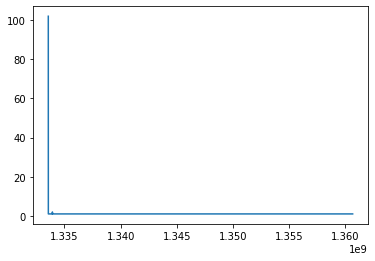

In [95]:
import matplotlib.pyplot as plt

# start from infect_time
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 

fig, ax = plt.subplots()
filtered_df["InfectionTime"].value_counts().sort_index().plot(ax=ax)

# Plot cumulative new infections over time

In [136]:
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 

print(filtered_df.columns)

# Construct dataframe of infectionTime to it's frequency
infectionTime_freq_df = pd.DataFrame({"InfectionTime":filtered_df["InfectionTime"].value_counts().index})

cumulatedFrequencyList = filtered_df["InfectionTime"].value_counts().cumsum().tolist()
infectionTime_freq_df["InfectionTimeFrequency"] = cumulatedFrequencyList
# print(infectionTime_freq_df["InfectionTime"])
# fig, ax = plt.subplots()
infectionTime_freq_df.head()
# filtered_df["InfectionTime"].value_counts().sort_index().plot(ax=ax)

Index(['User ID (anonymized)', 'Venue ID (Foursquare)',
       'Venue category ID (Foursquare)', 'Venue category name (Fousquare)',
       'Latitude', 'Longitude', 'Timezone offset(minutes)', 'UTC time',
       'Status', 'Iteration', 'InfectorId', 'InfectionTime', 'Time',
       'InfectionLongitude', 'InfectionLatitude'],
      dtype='object')
1333559854    102
1333925347      2
1333909503      1
1350392516      1
1335445484      1
             ... 
1336331638      1
1334198888      1
1333910900      1
1338170739      1
1341421568      1
Name: InfectionTime, Length: 863, dtype: int64
------


InfectionTime  InfectionTimeFrequency
0     1333559854                     102
1     1333925347                     104
2     1333909503                     105
3     1350392516                     106
4     1335445484                     107

In [140]:
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 


# Construct dataframe of infectionTime to it's frequency
infectionTime_freq_df = pd.DataFrame({"InfectionTime":filtered_df["InfectionTime"].value_counts().index})

print(filtered_df["InfectionTime"].value_counts().cumsum().sort_index()
cumulatedFrequencyList = filtered_df["InfectionTime"].value_counts().cumsum().sort_index().plot()


SyntaxError: invalid syntax (<ipython-input-140-2fe83f5d2814>, line 9)